# Classify the Size_Categorie using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
forest = pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


# EDA

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forest.duplicated().sum()

8

In [8]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Value Counts For target Variable Y

In [10]:
forest["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

# Observation :
We can see Imbalance in the dataset

# Barplot

<AxesSubplot:xlabel='size_category', ylabel='monthjan'>

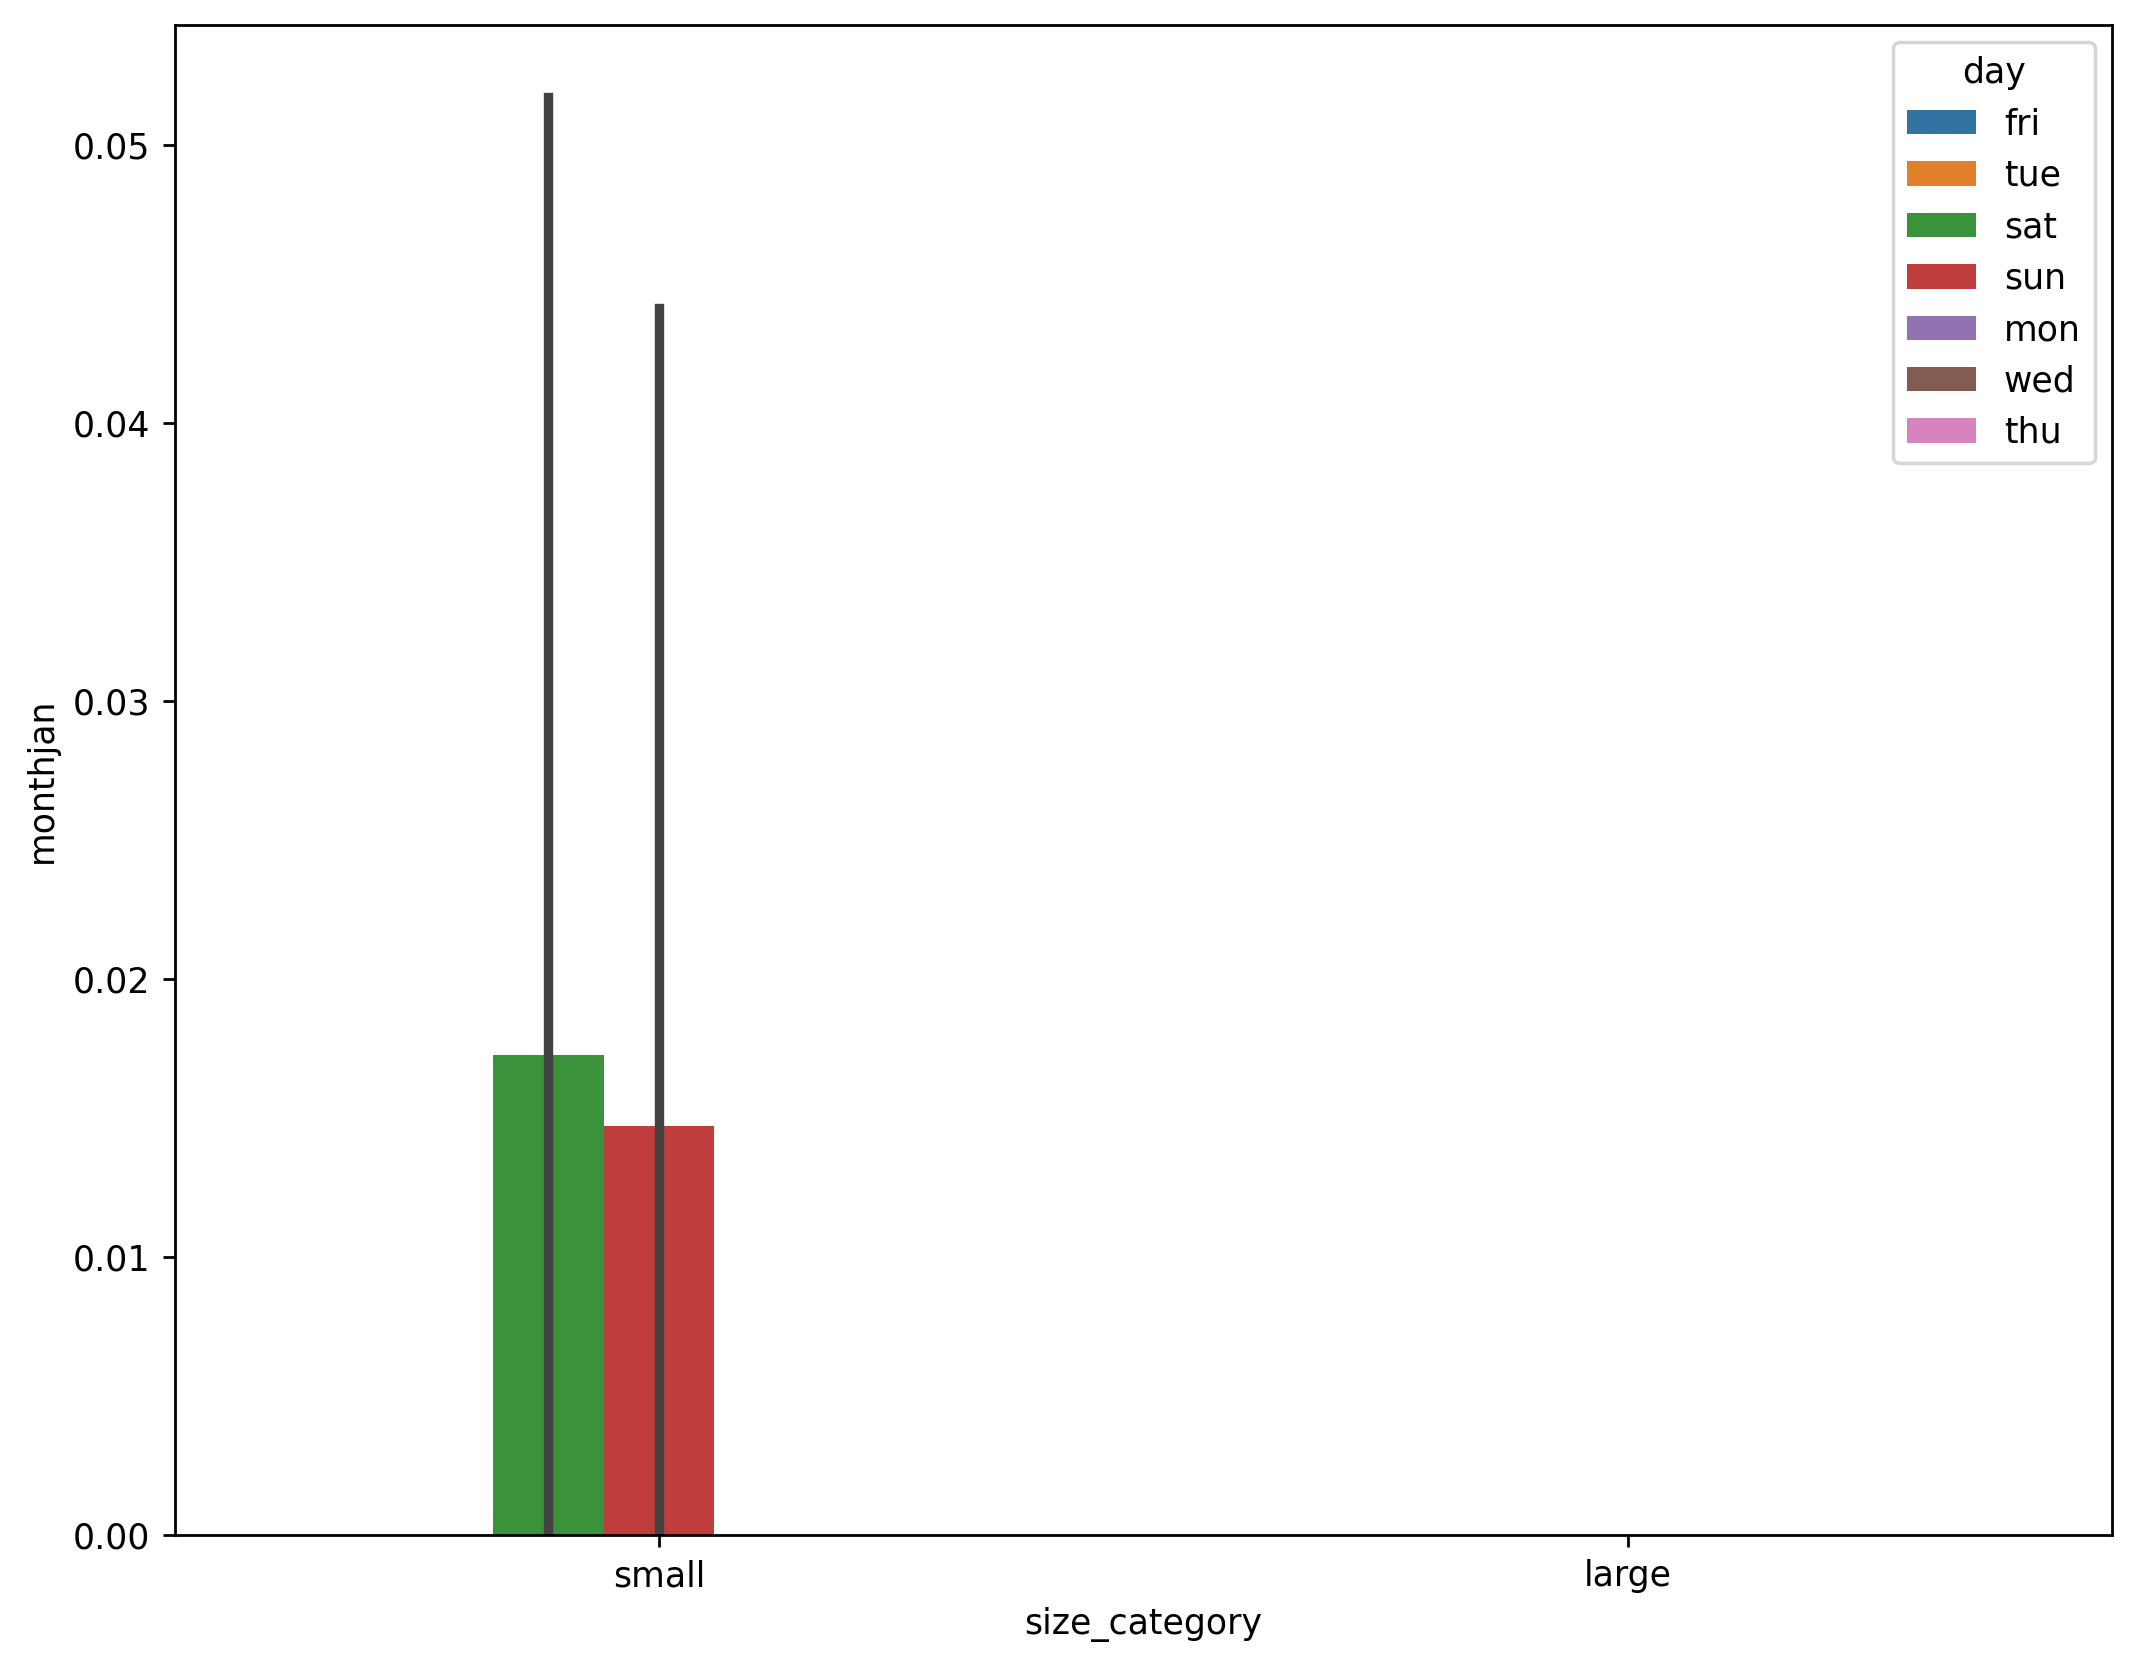

In [11]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot('size_category','monthjan',hue="day",data=forest)

# Observation:
We can see that in the month of jan only small area of the forest burns and only on saturday and sunday

<AxesSubplot:xlabel='size_category', ylabel='monthfeb'>

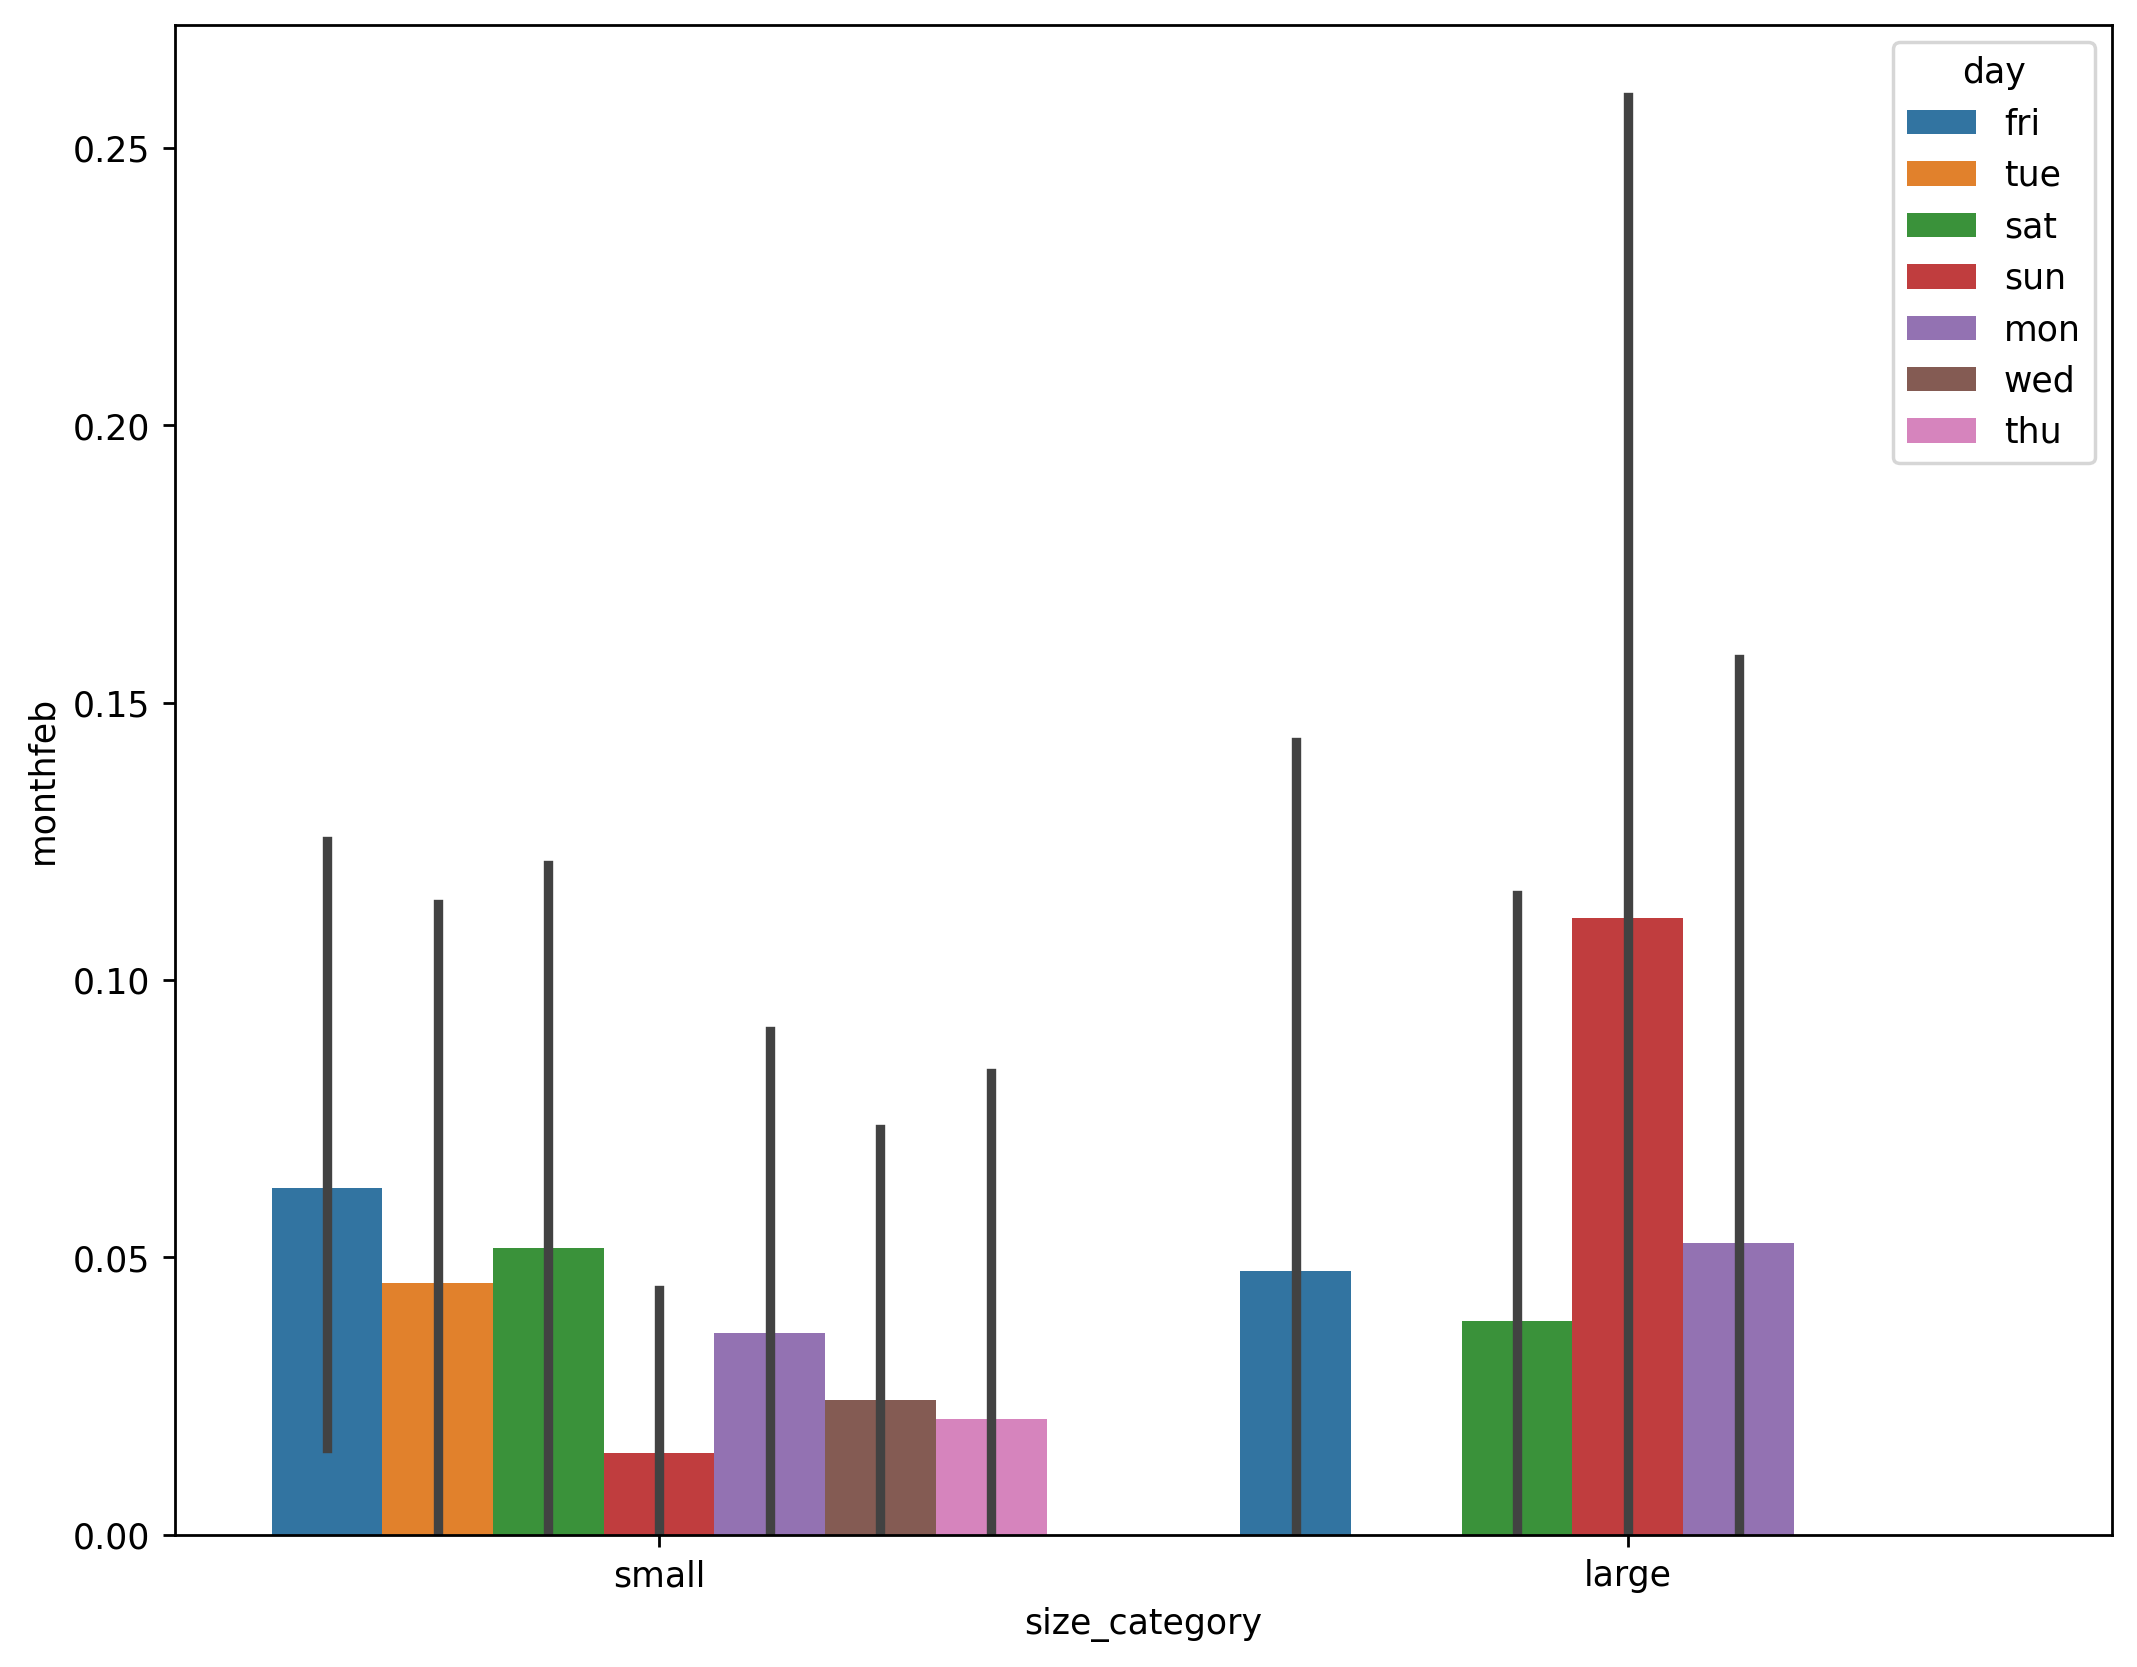

In [12]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthfeb",hue="day",data=forest)

# Observation:
In the month of feb all seven days of week they burn small area of forest and sunday,monday,friday and saturday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthmar'>

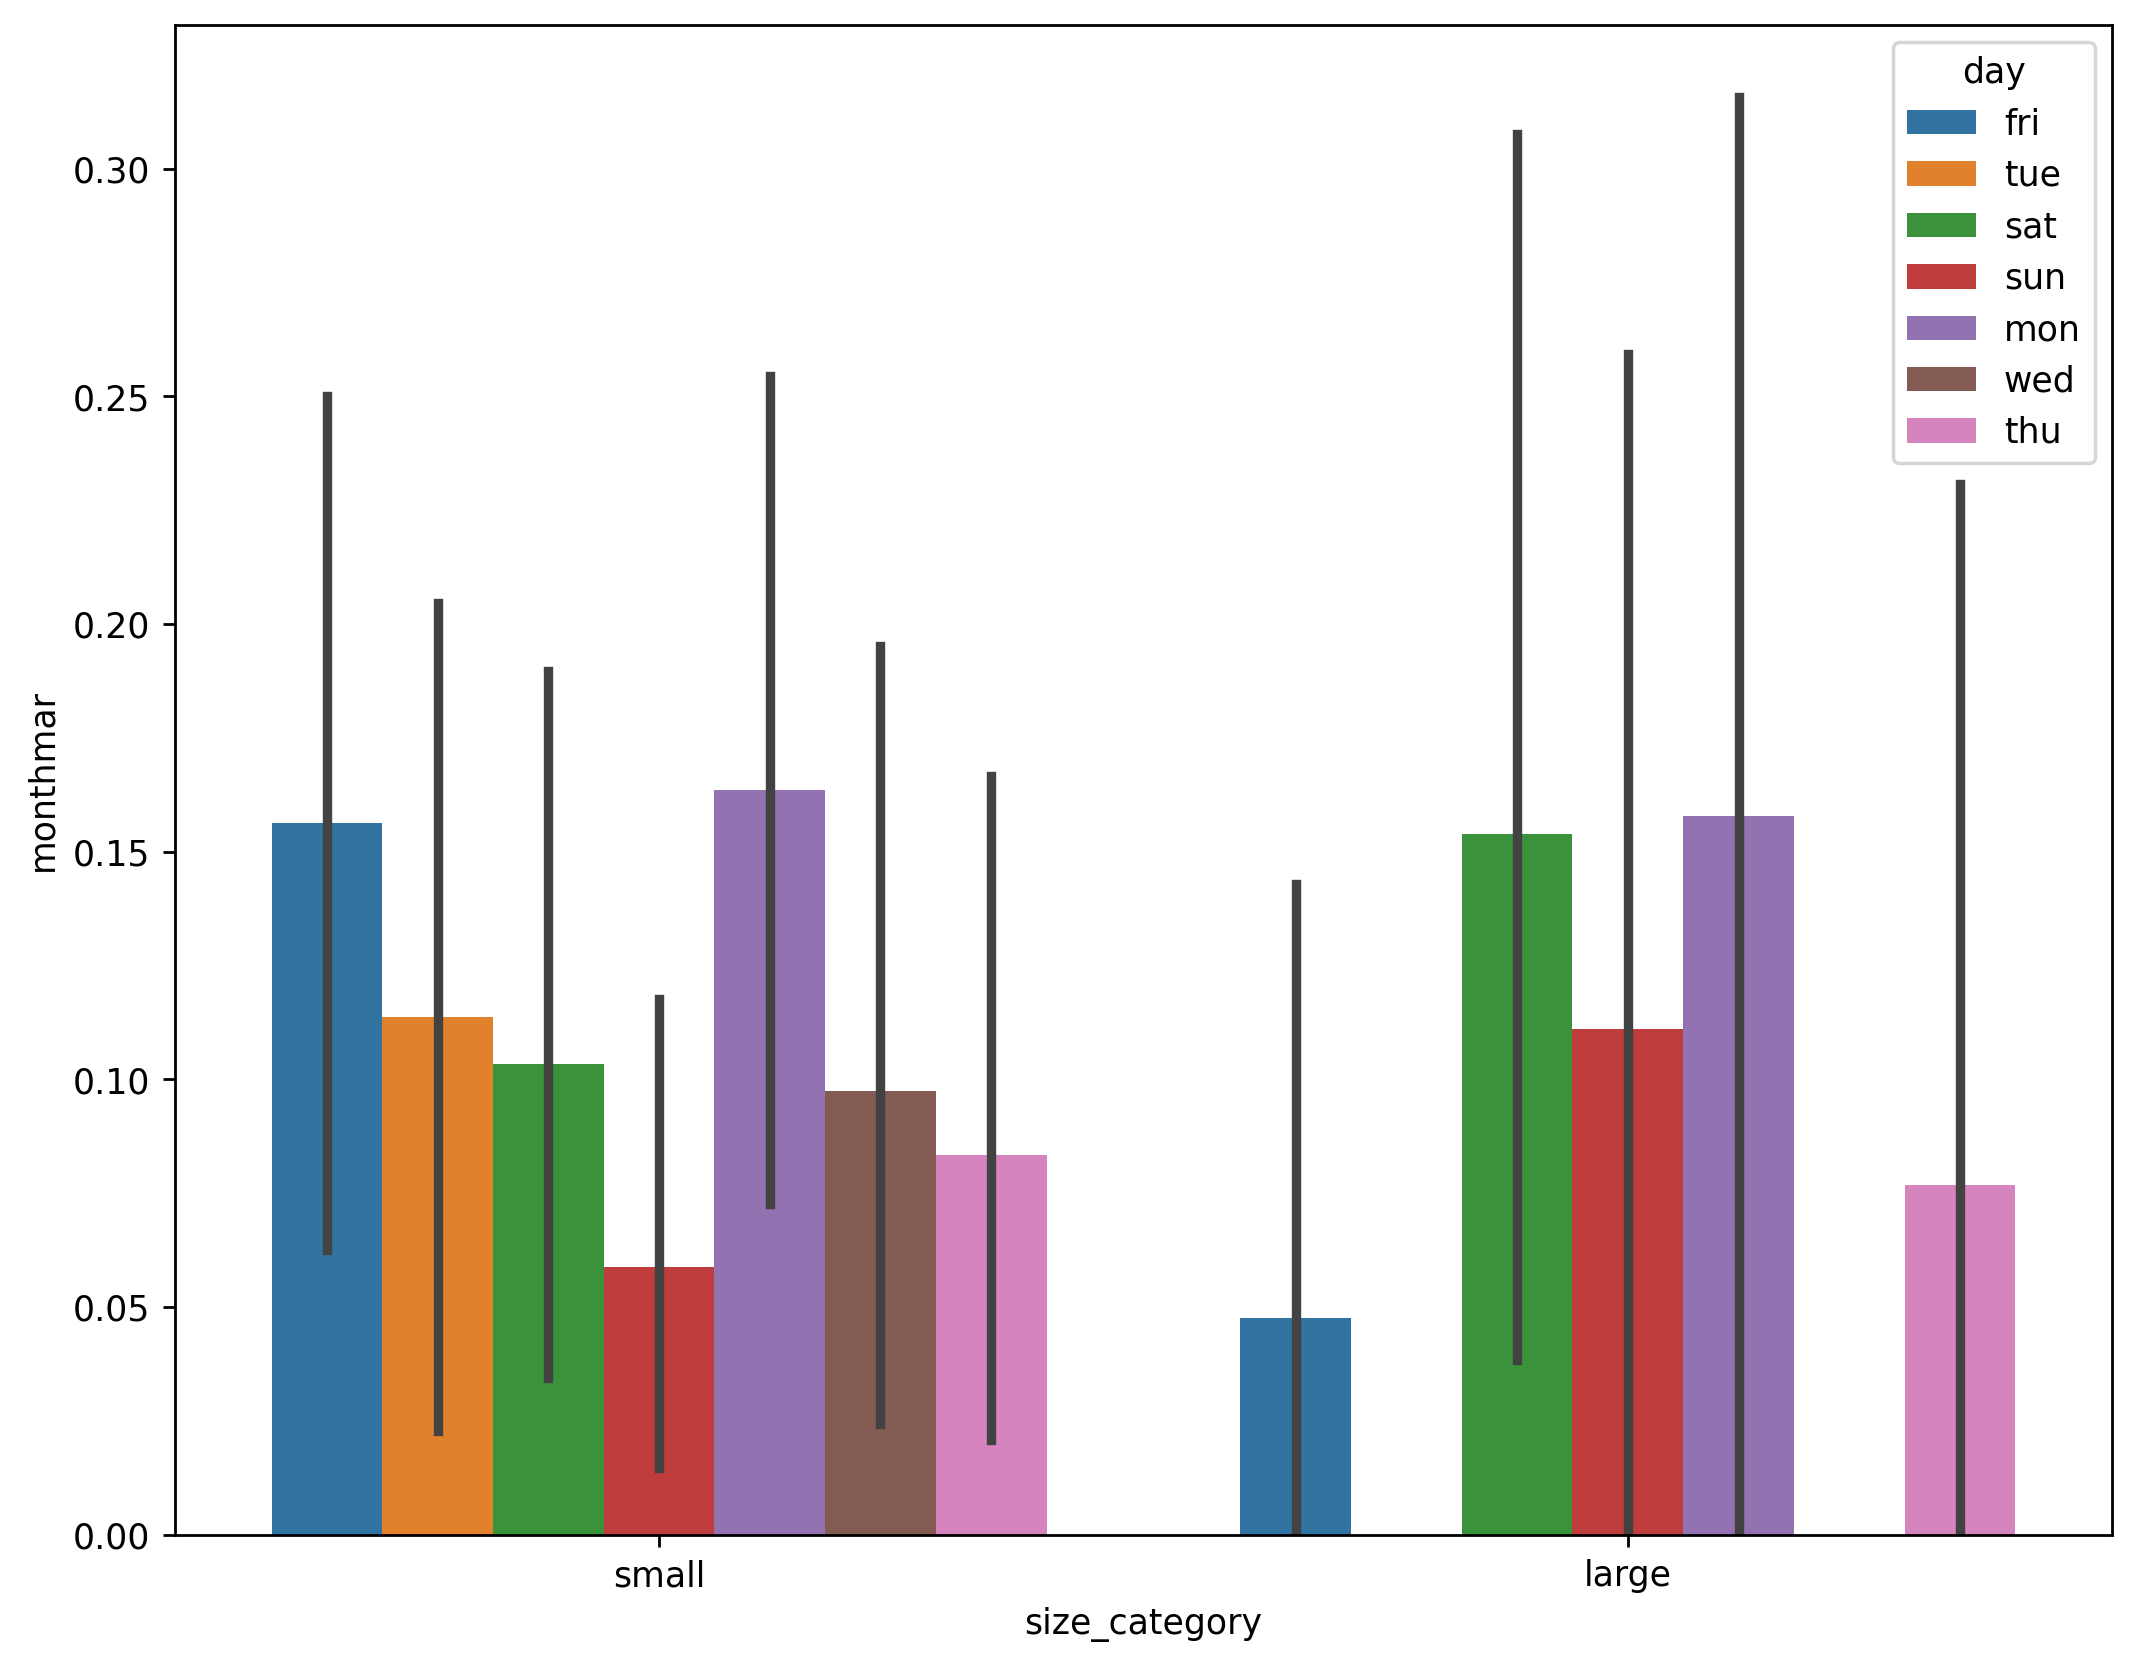

In [13]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthmar",hue="day",data=forest)

# Observation:
In the month of march all seven days they burn small area of the forest and on sunday,monday,thursday,friday and saturday they burn large area of forest

<AxesSubplot:xlabel='size_category', ylabel='monthapr'>

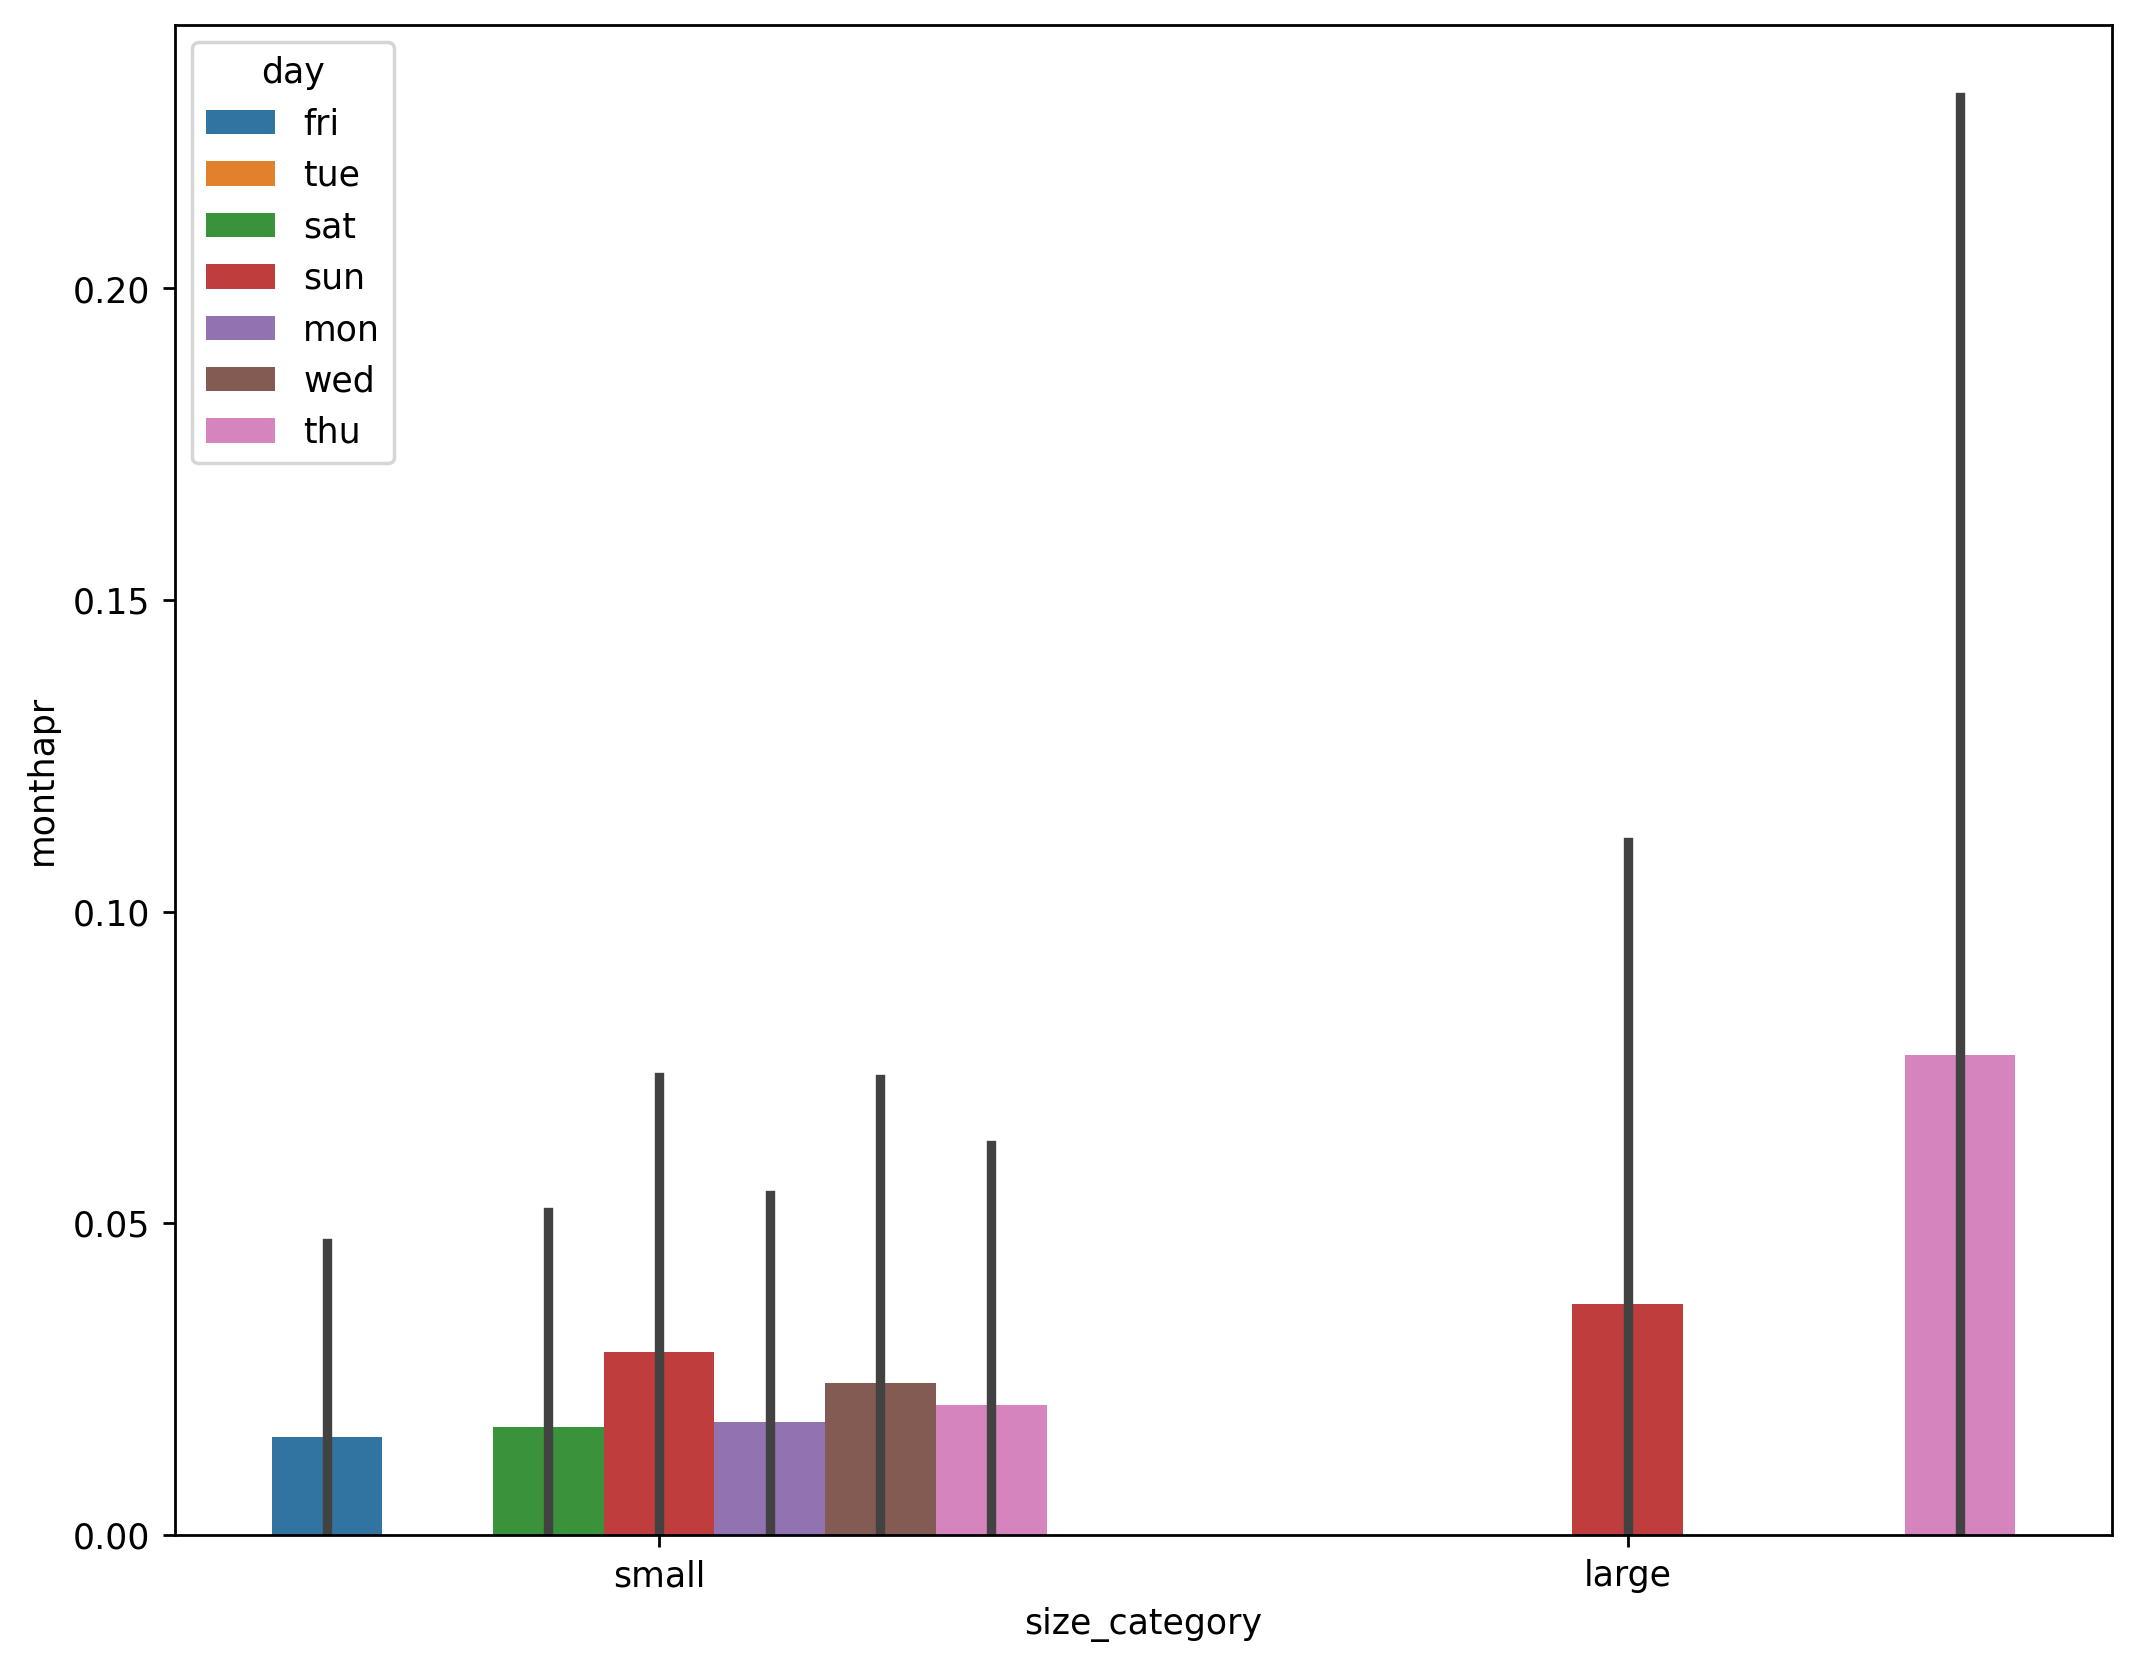

In [14]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthapr",hue="day",data=forest)

# Observation:
In the month of april expect tuesday they burn small area of forest and on sunday and thursday mostly they burn large area of forest

<AxesSubplot:xlabel='size_category', ylabel='monthmay'>

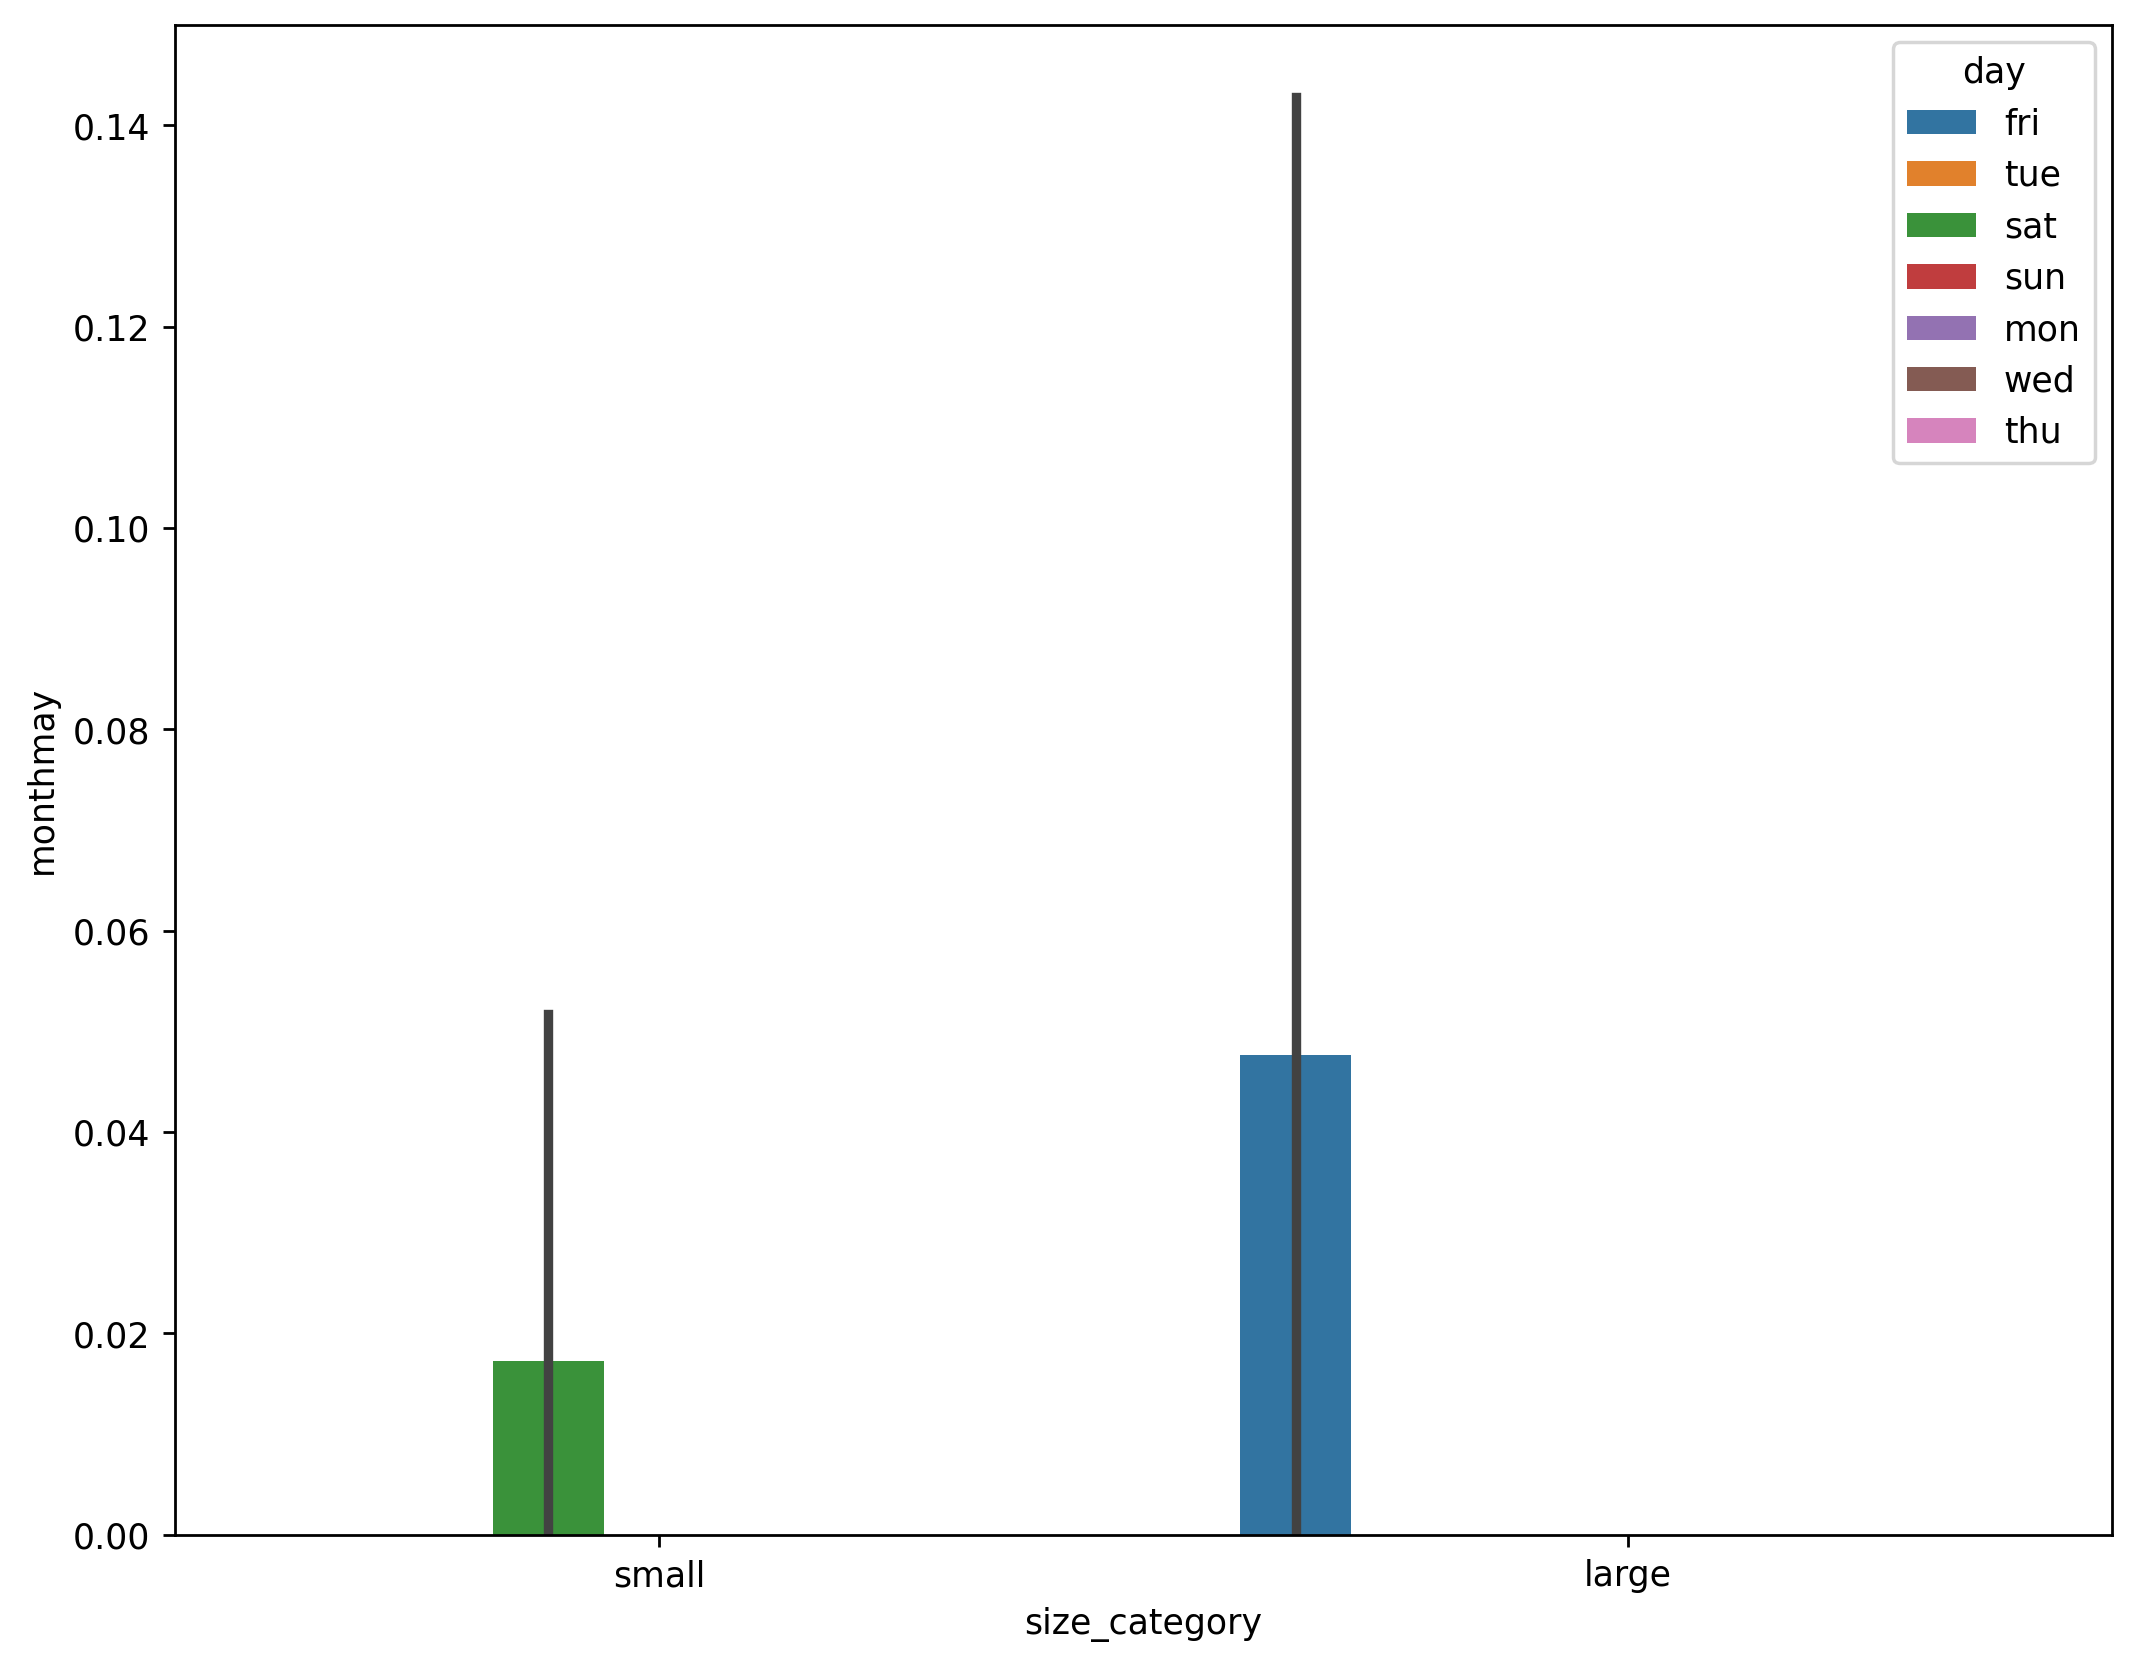

In [15]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthmay",hue="day",data=forest)

# Obervation:
In the month of may they burn on saturday small area of forest and on friday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthjun'>

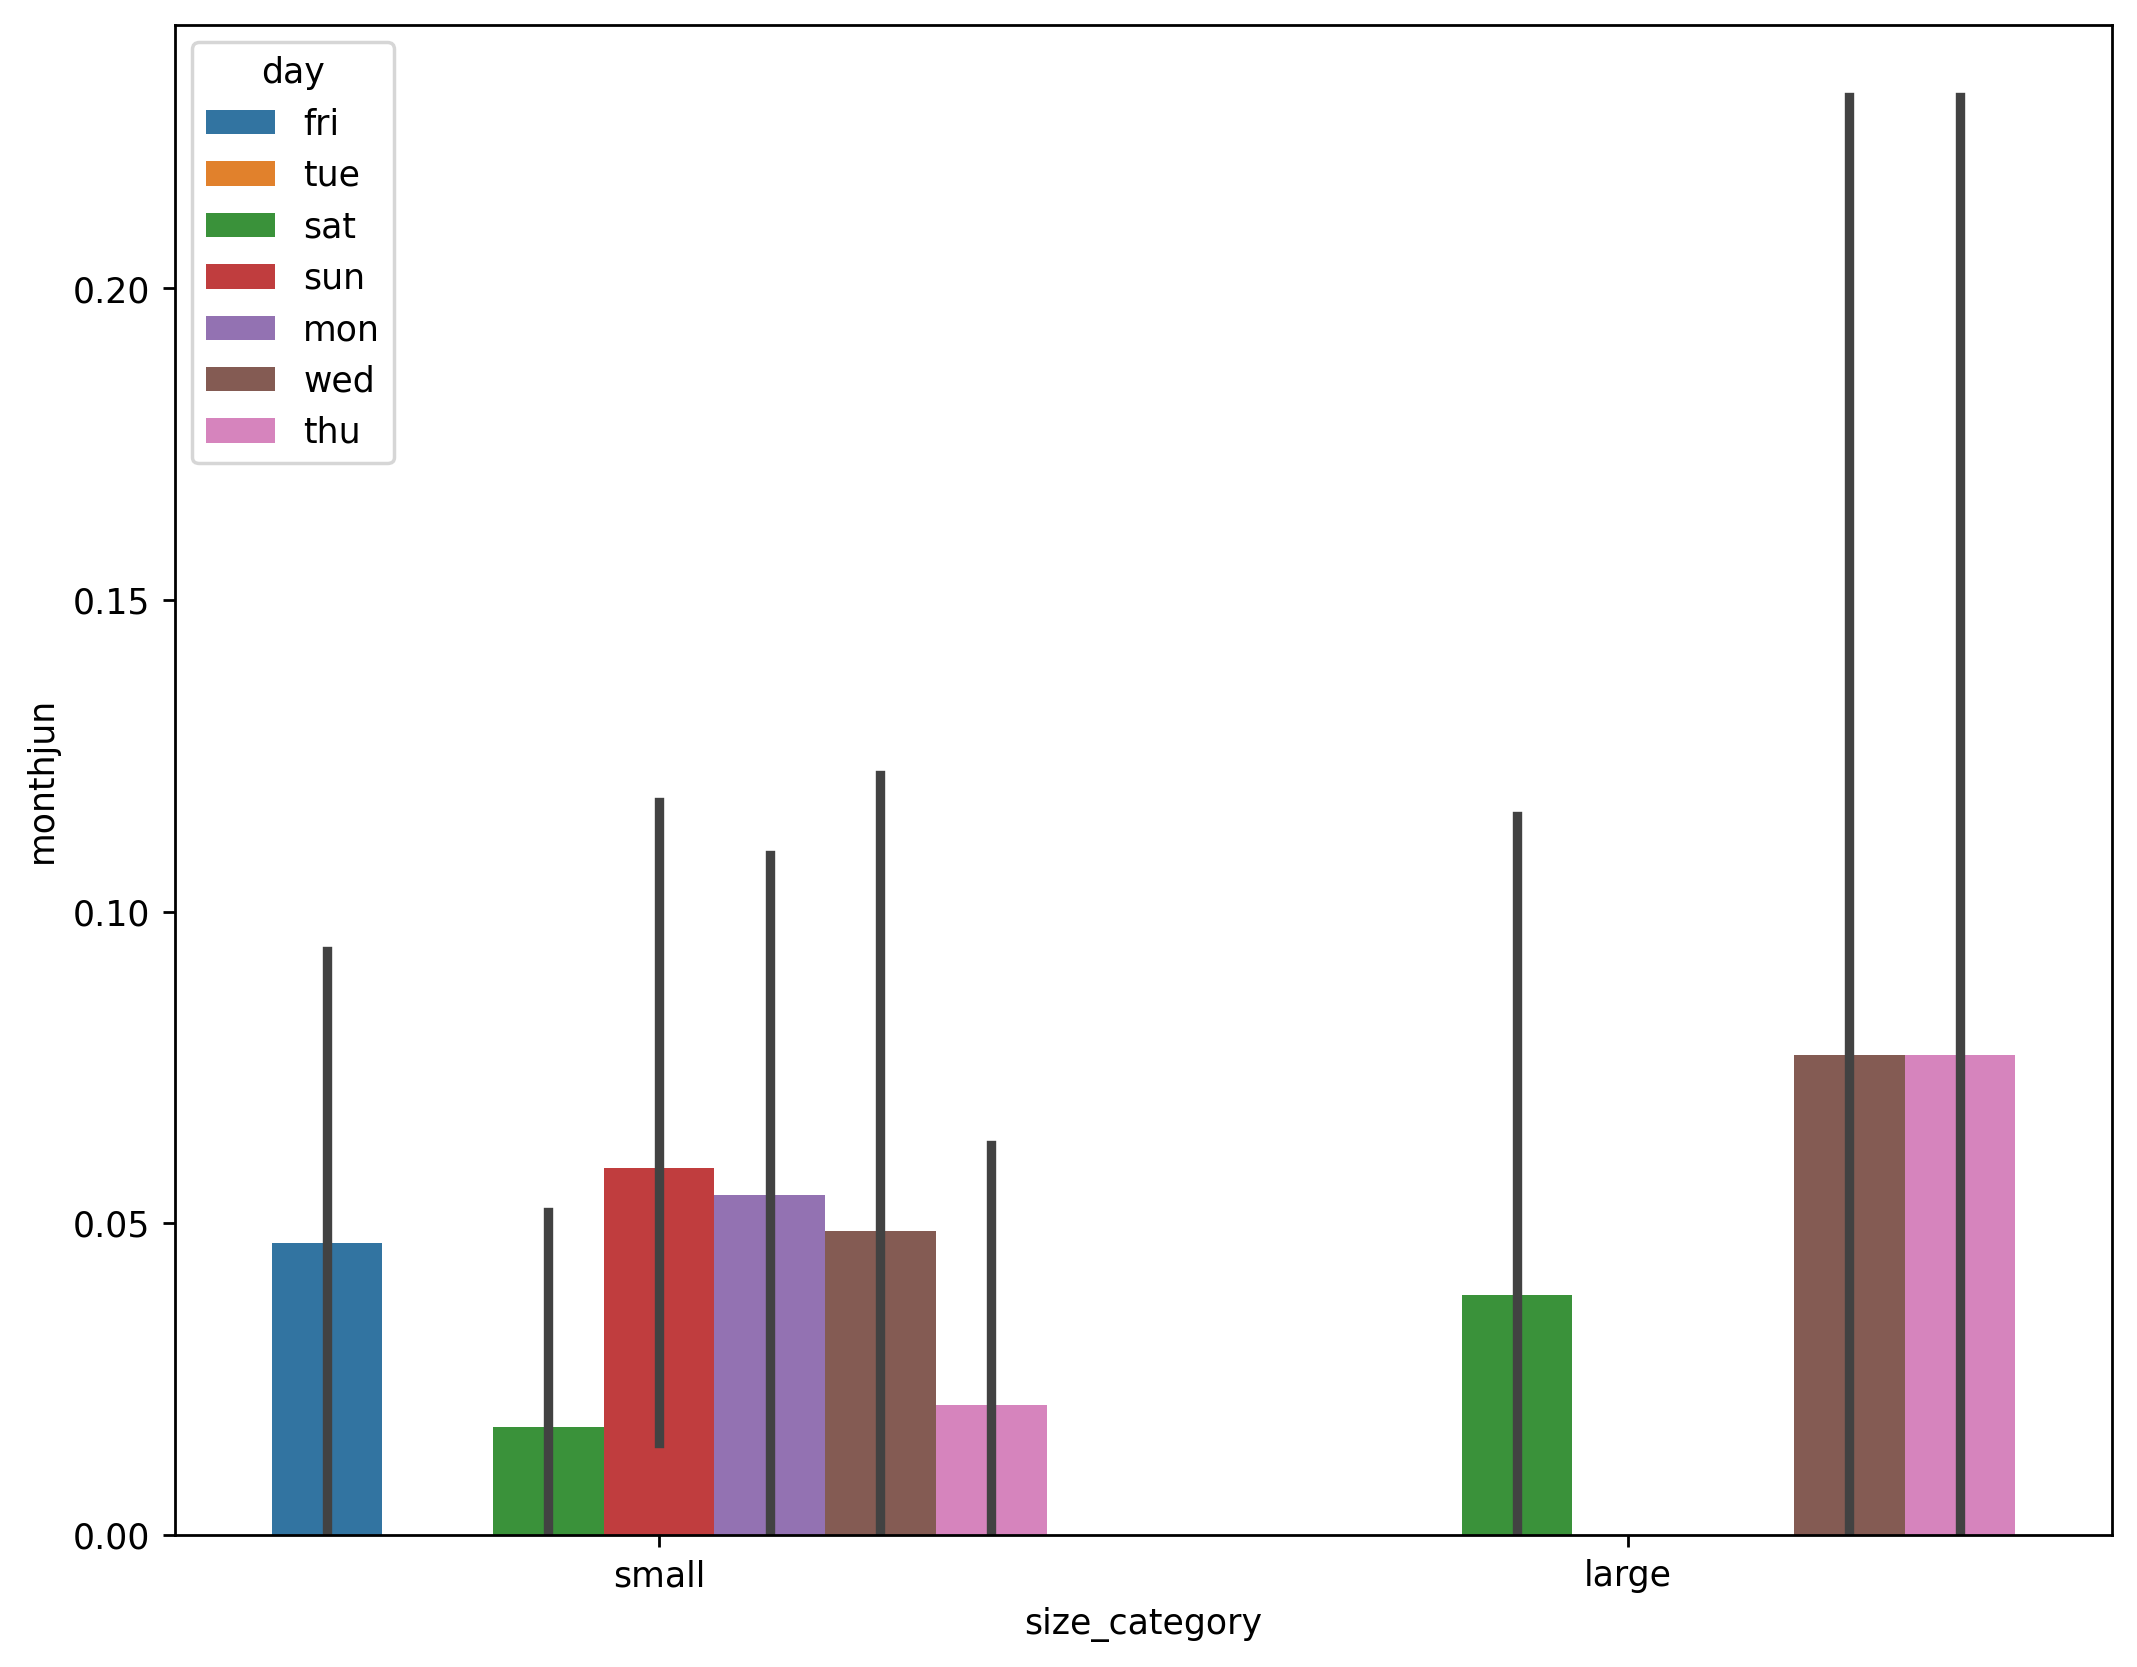

In [16]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot('size_category',"monthjun",hue="day",data=forest)

# Observation:
In the month of june expect tuesday they burn small area of forest and on saturday,wednessday and thursday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthjul'>

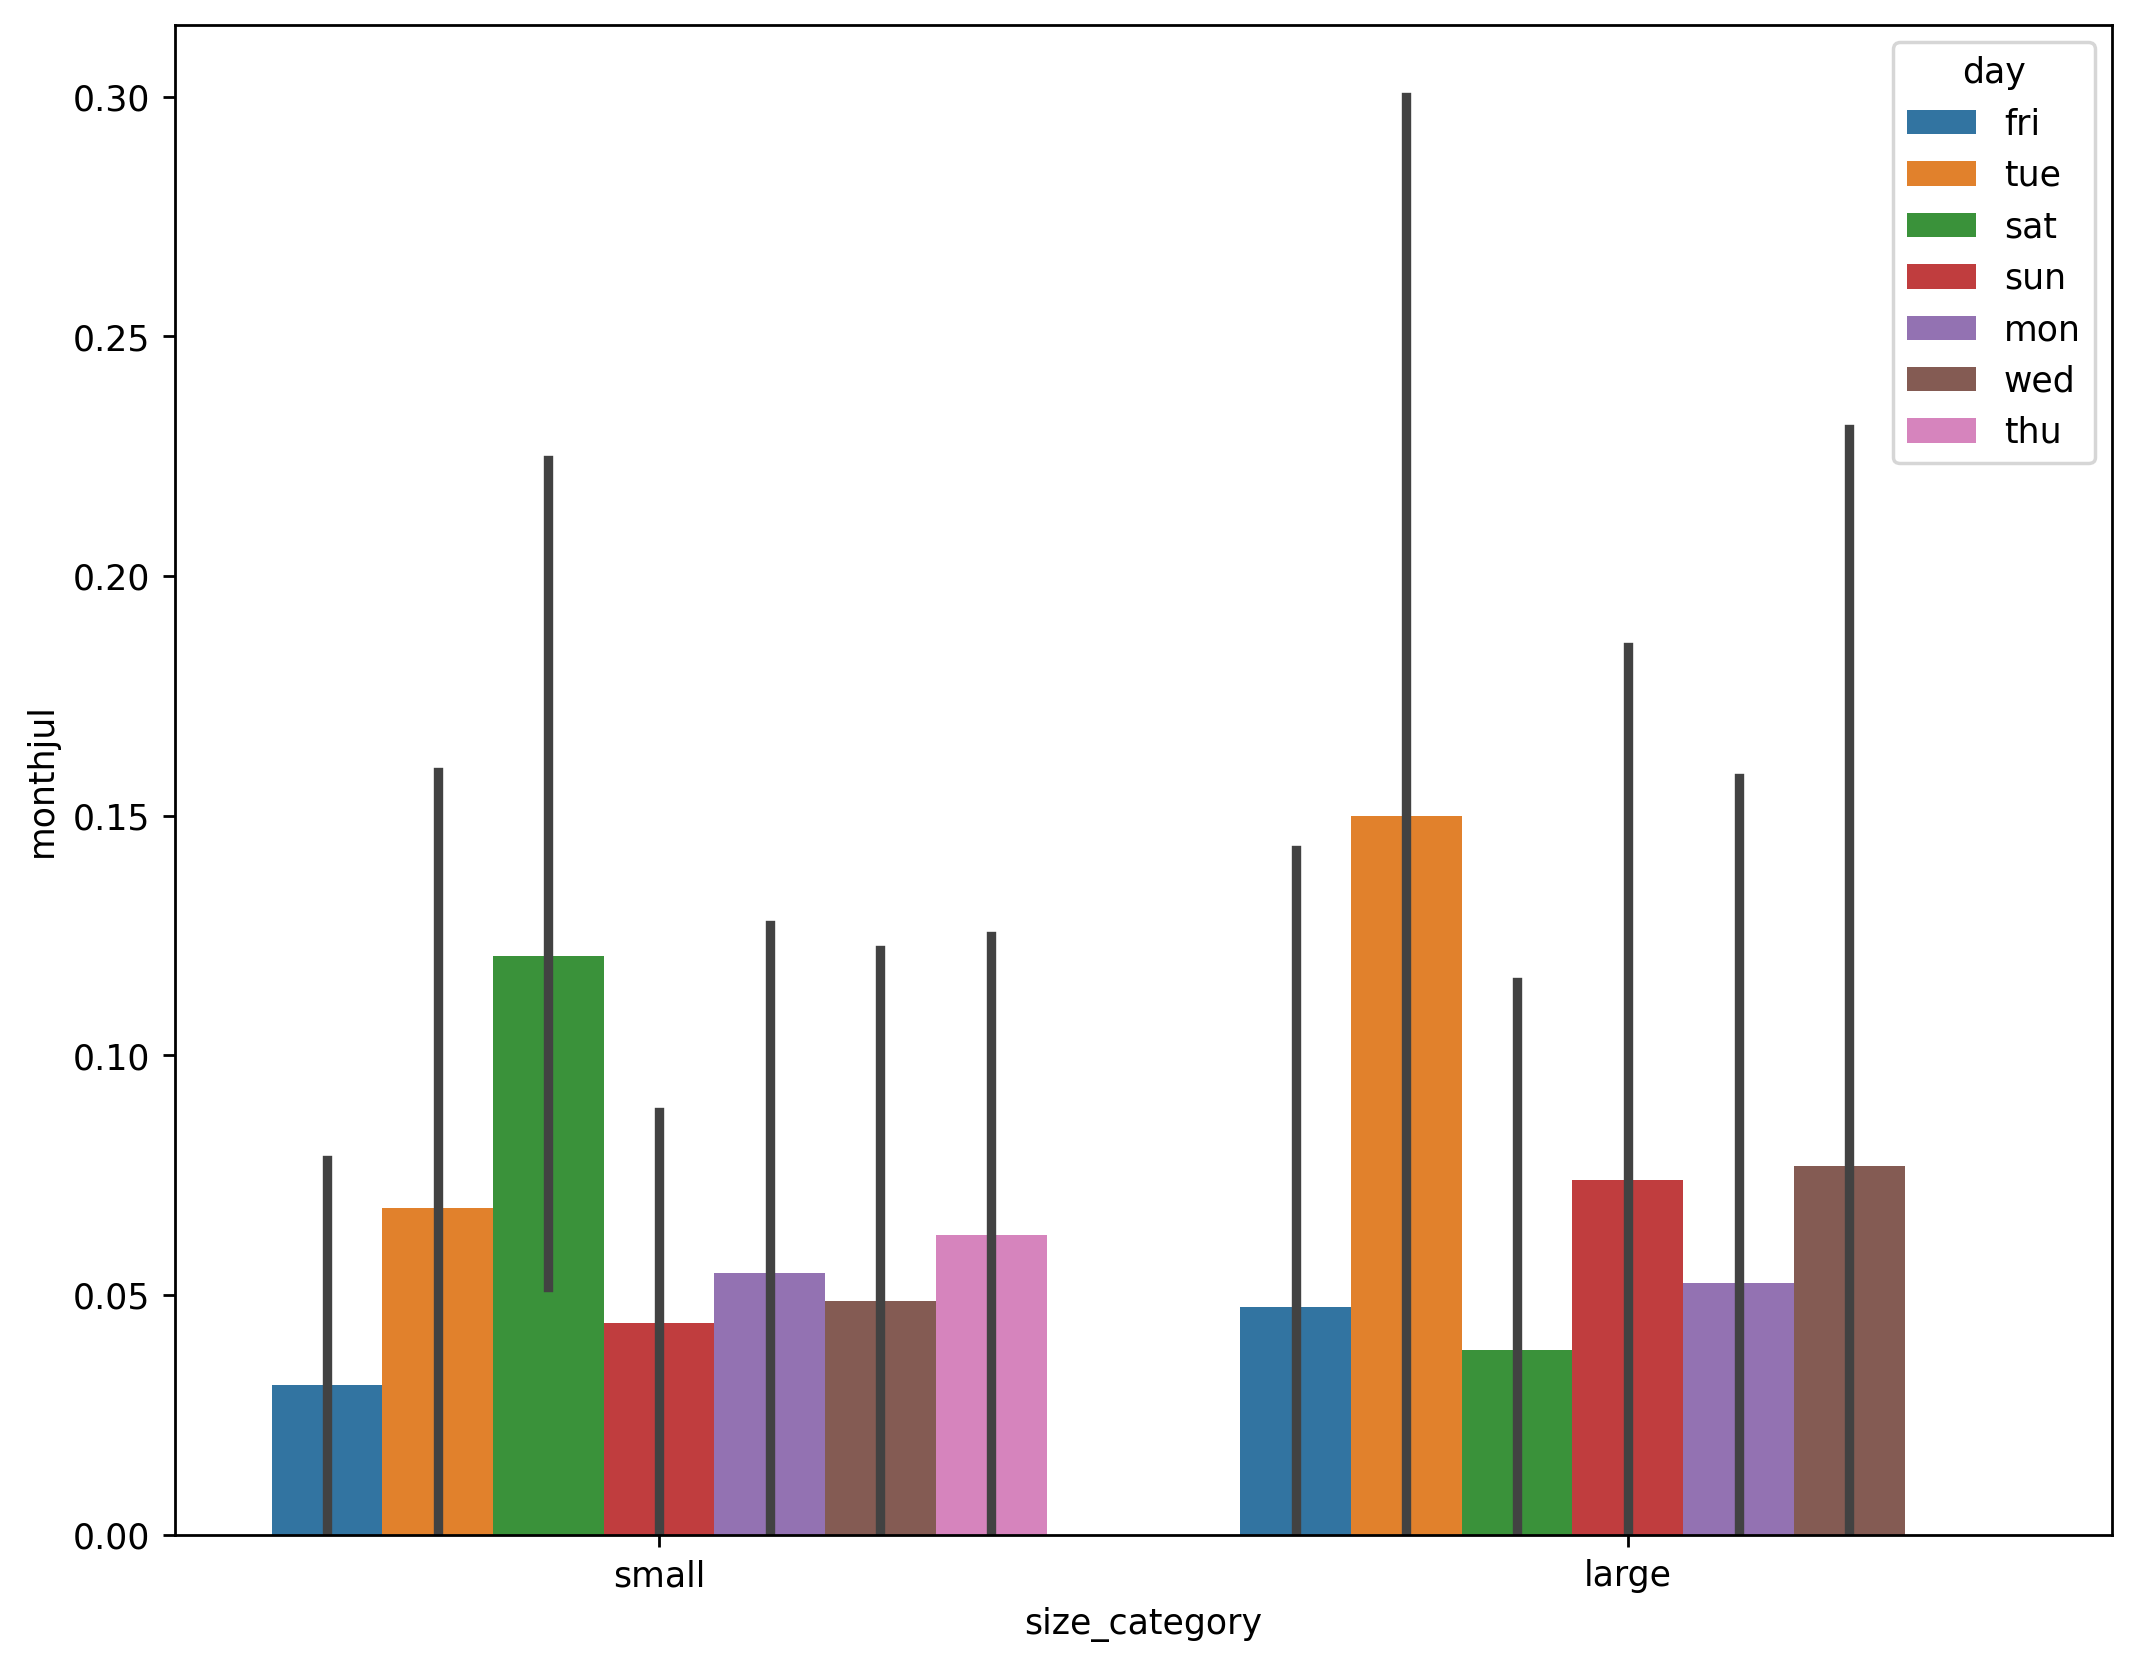

In [17]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthjul",hue="day",data=forest)

# Observation:
In the mont of july all seven days they burn small area of the forest and expect thursday they burn large area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthaug'>

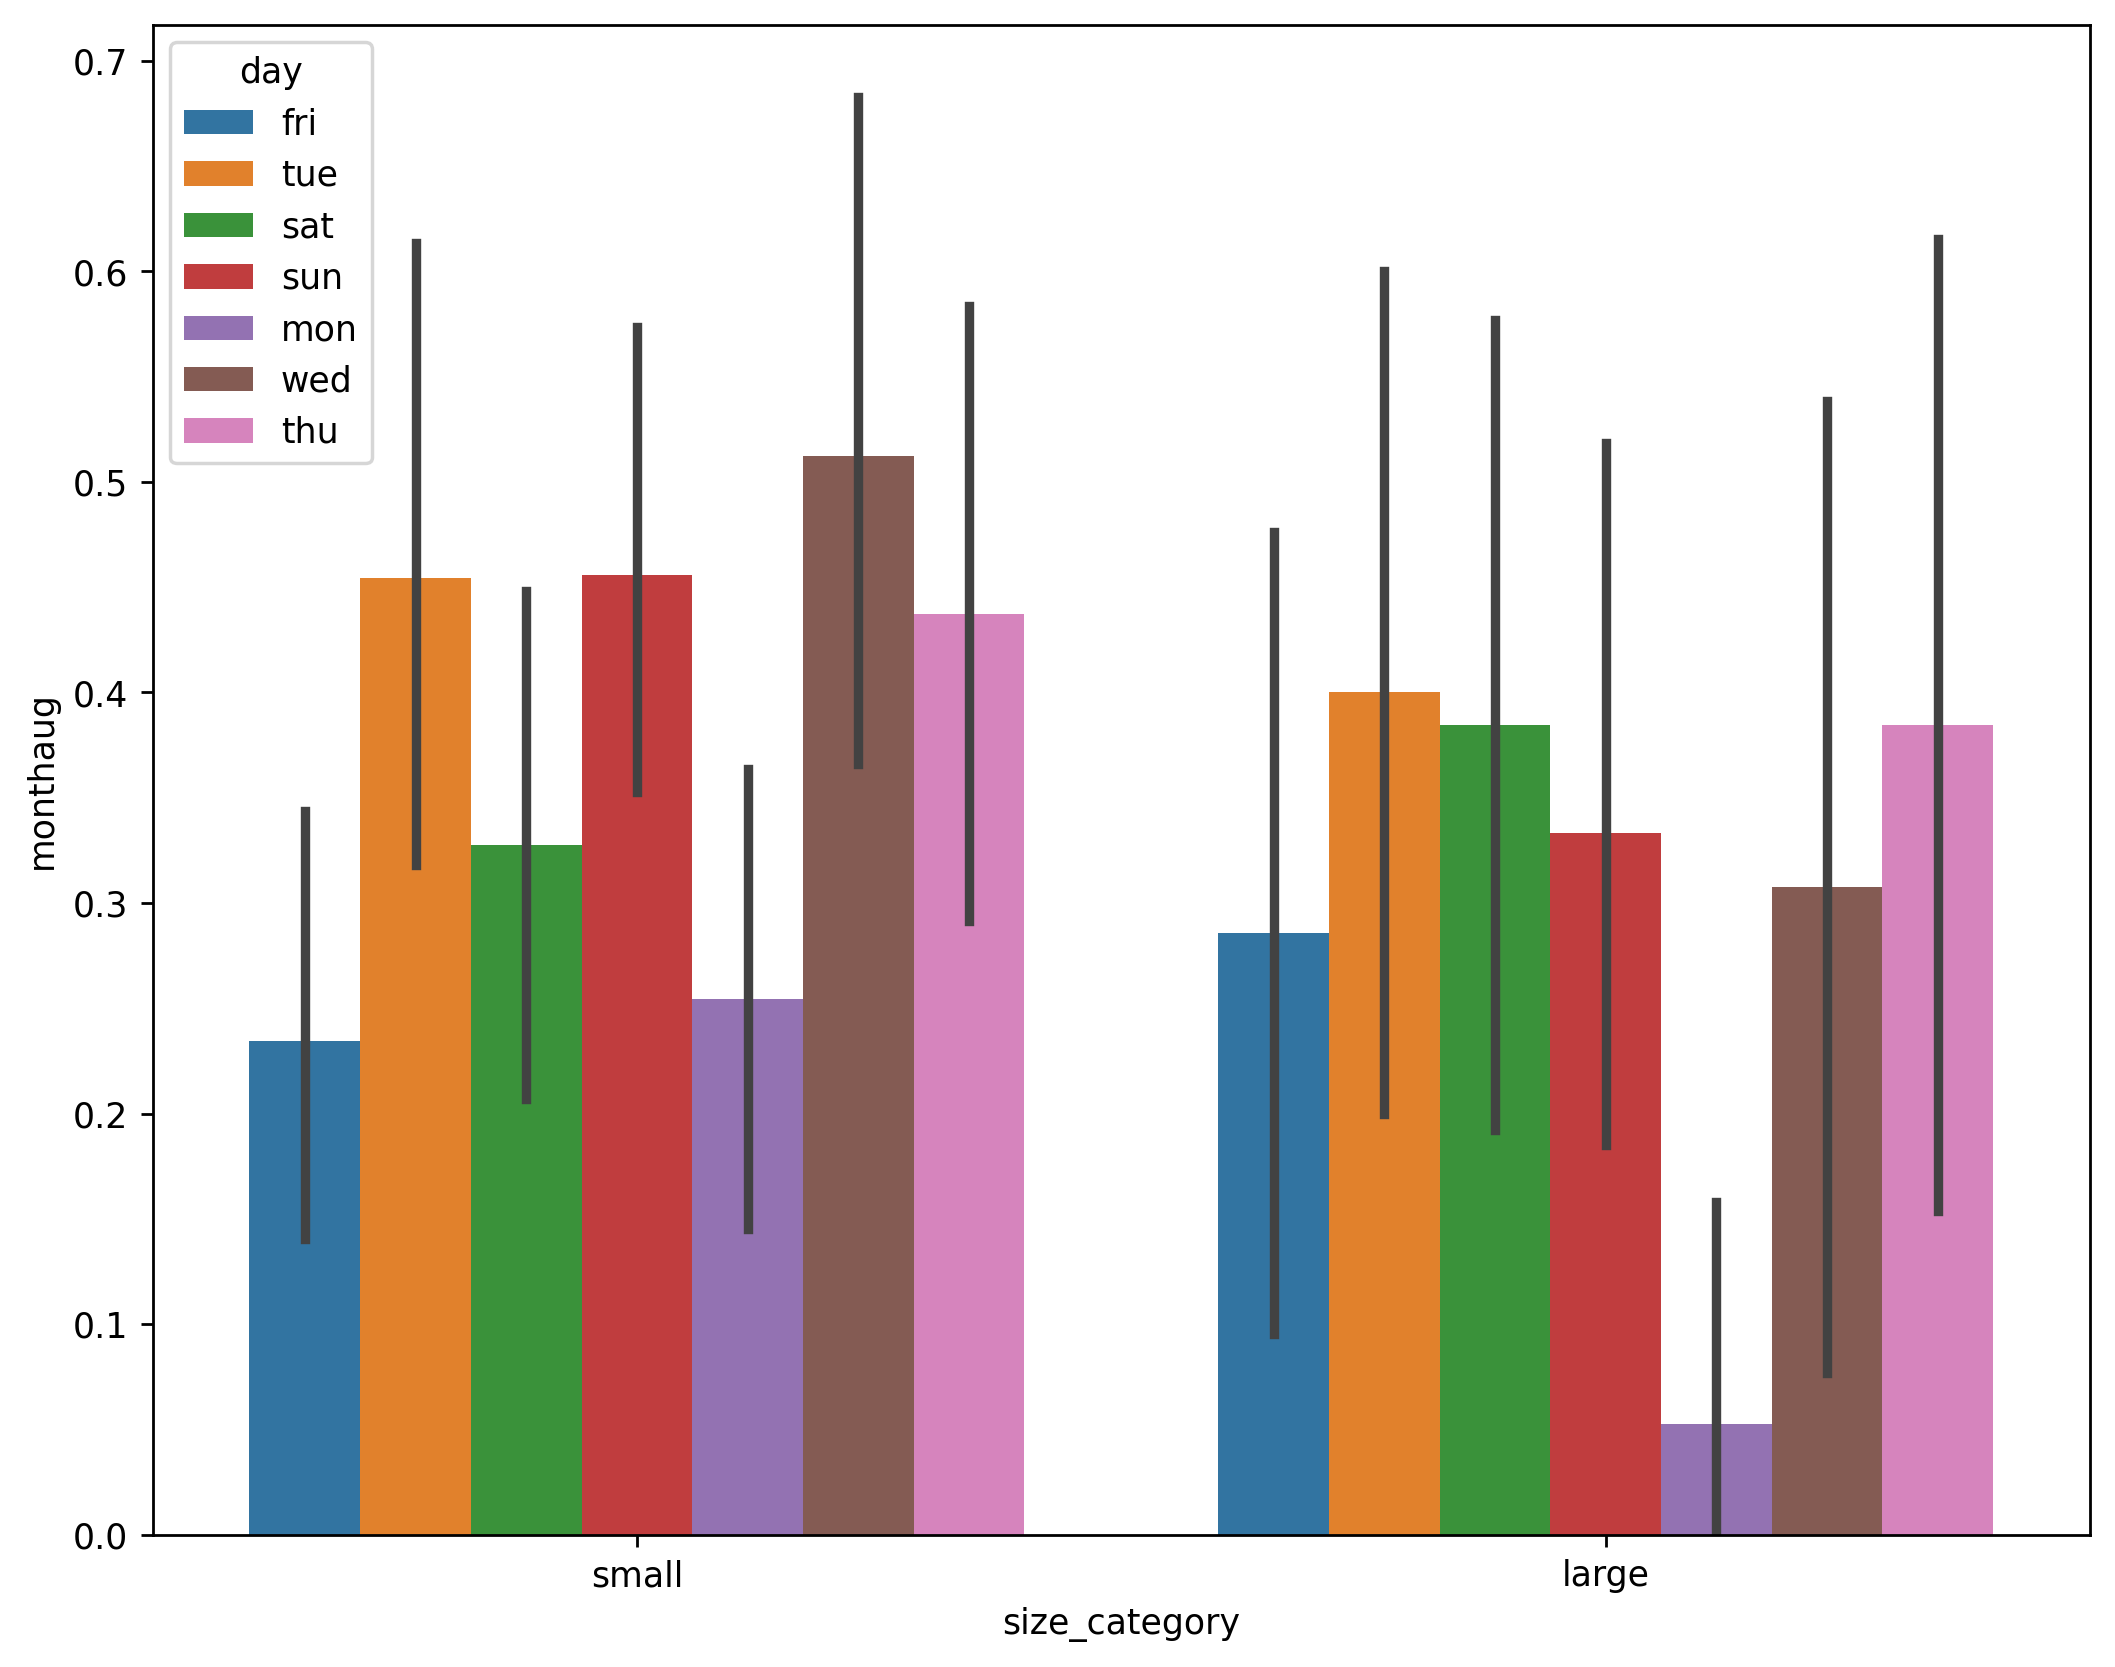

In [18]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthaug",hue="day",data=forest)

# Observation :
In the month of august all seven days a week they burn large area of the forest as well as small area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthsep'>

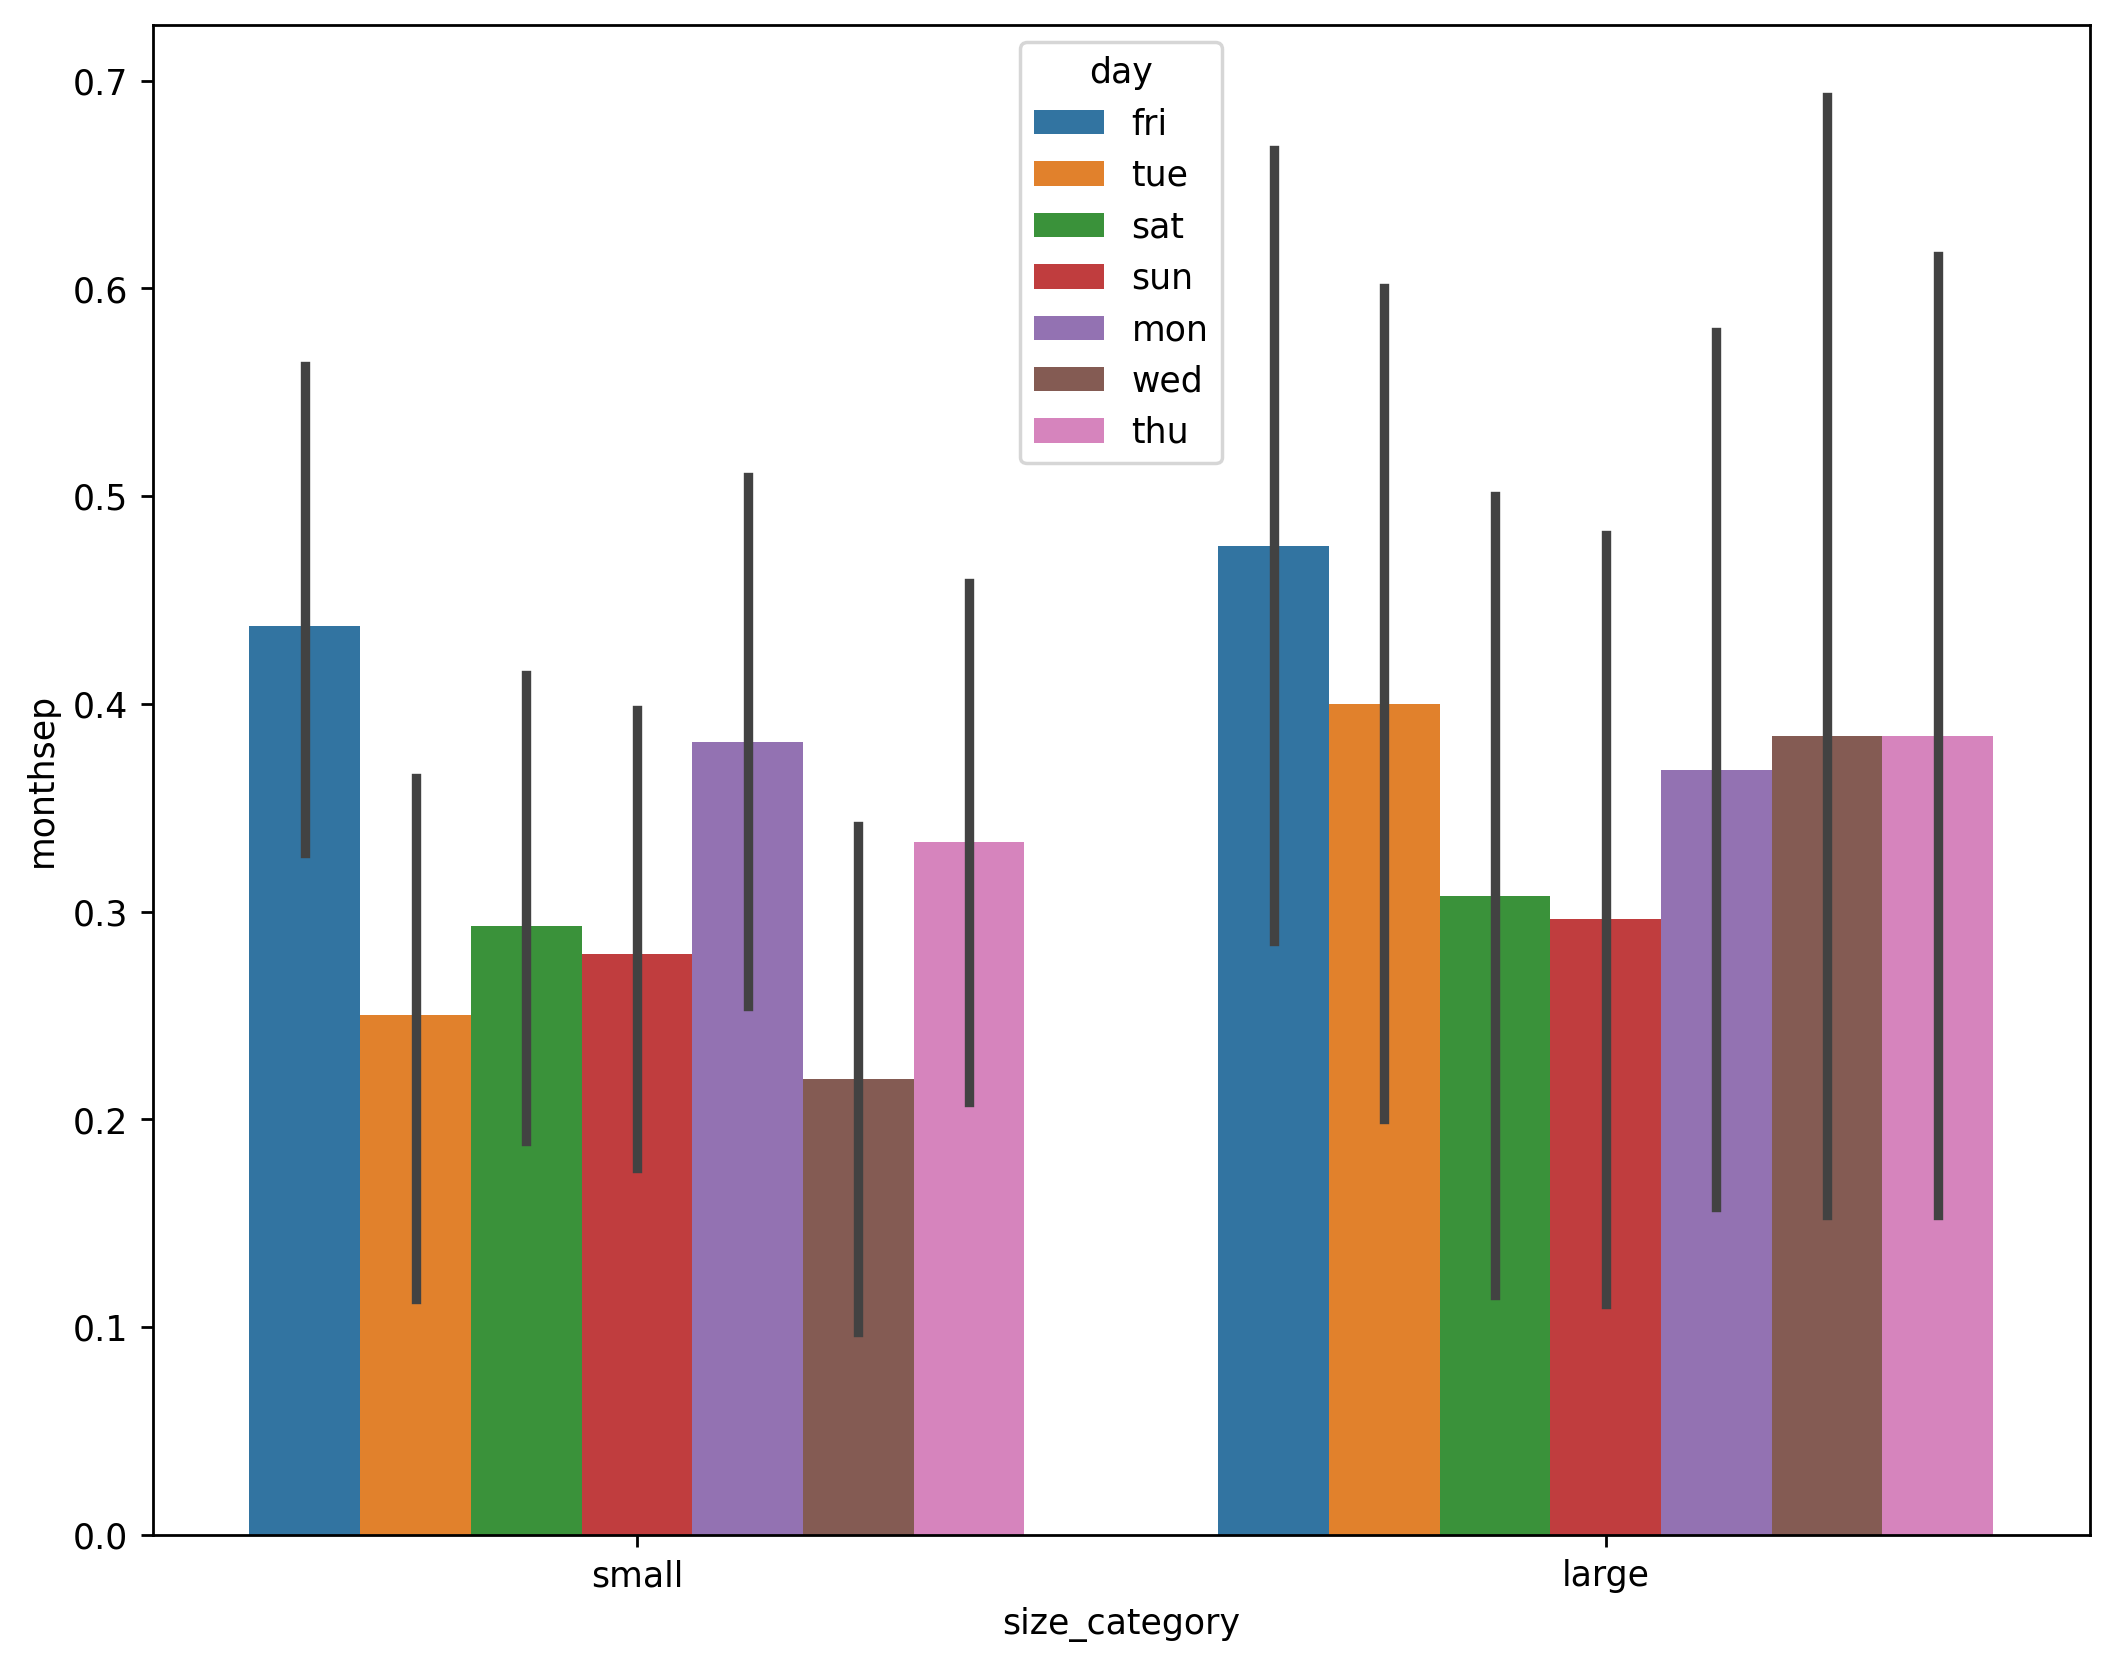

In [19]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthsep",hue="day",data=forest)

# Observation:
In the month of september seven days a week they burn large area of the forest as well as small area of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthoct'>

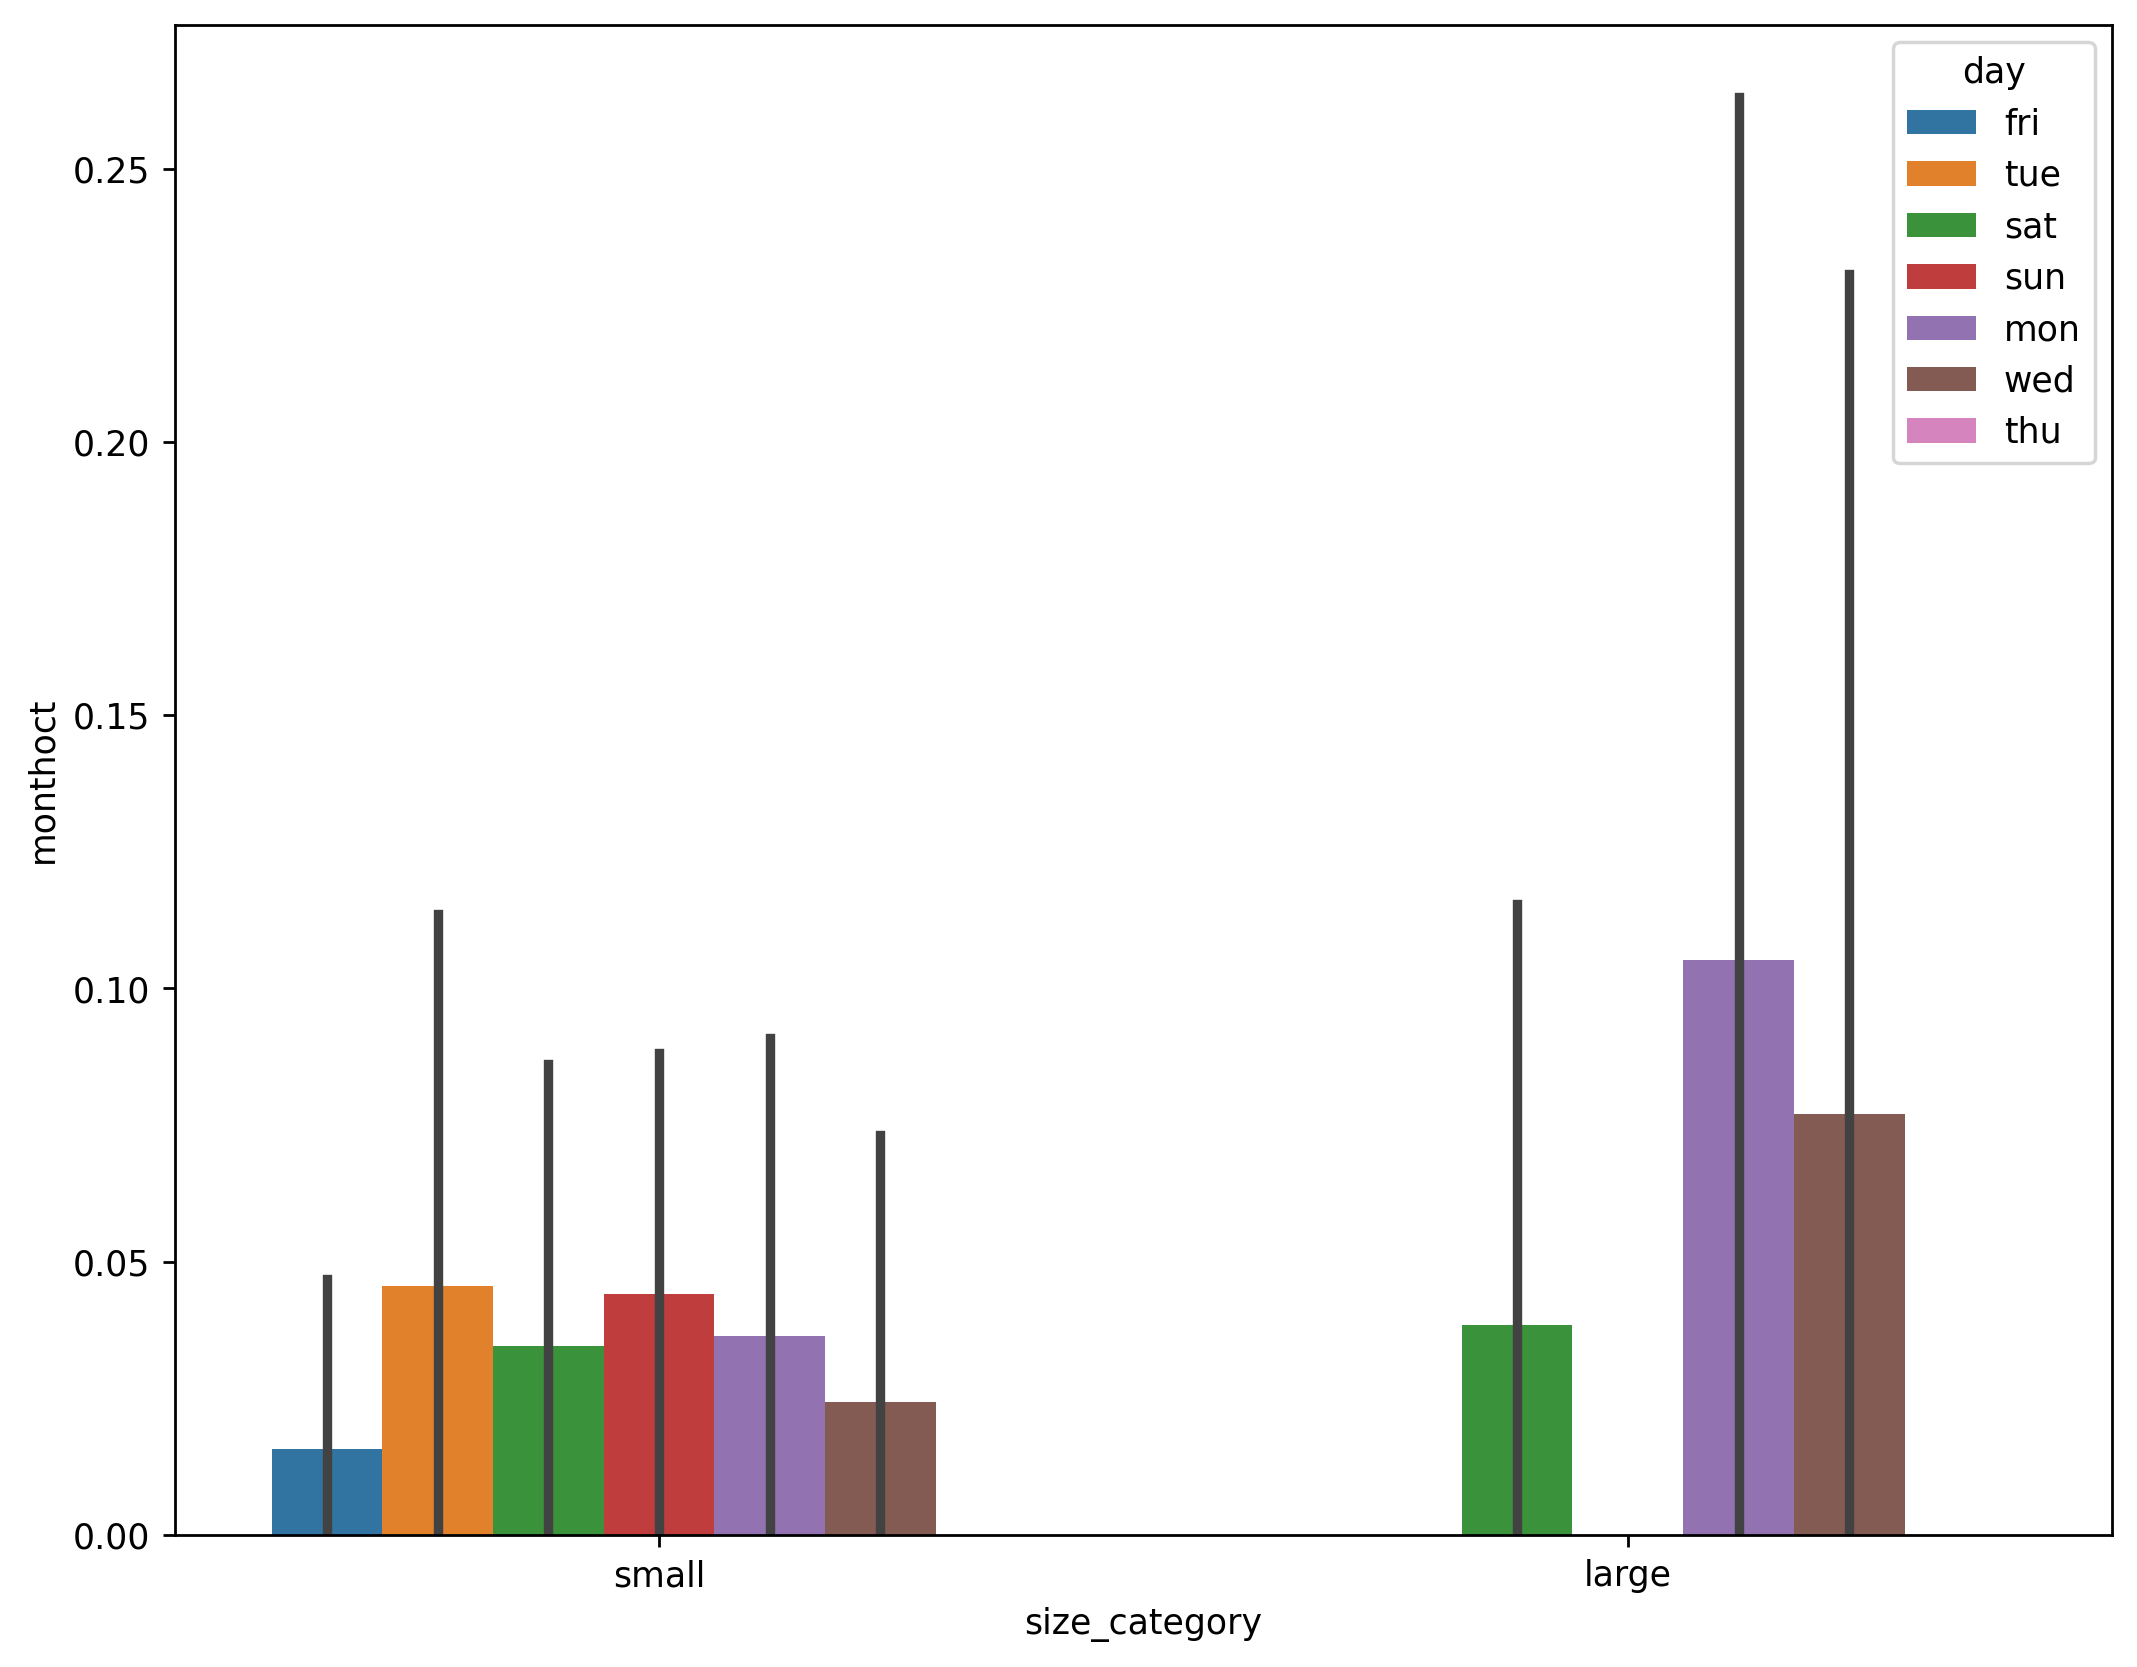

In [20]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthoct",hue="day",data=forest)

# Observation:
In the month of october they burn small area of forest except on thursday and on monday,wednessday and saturday they burn large of the forest

<AxesSubplot:xlabel='size_category', ylabel='monthnov'>

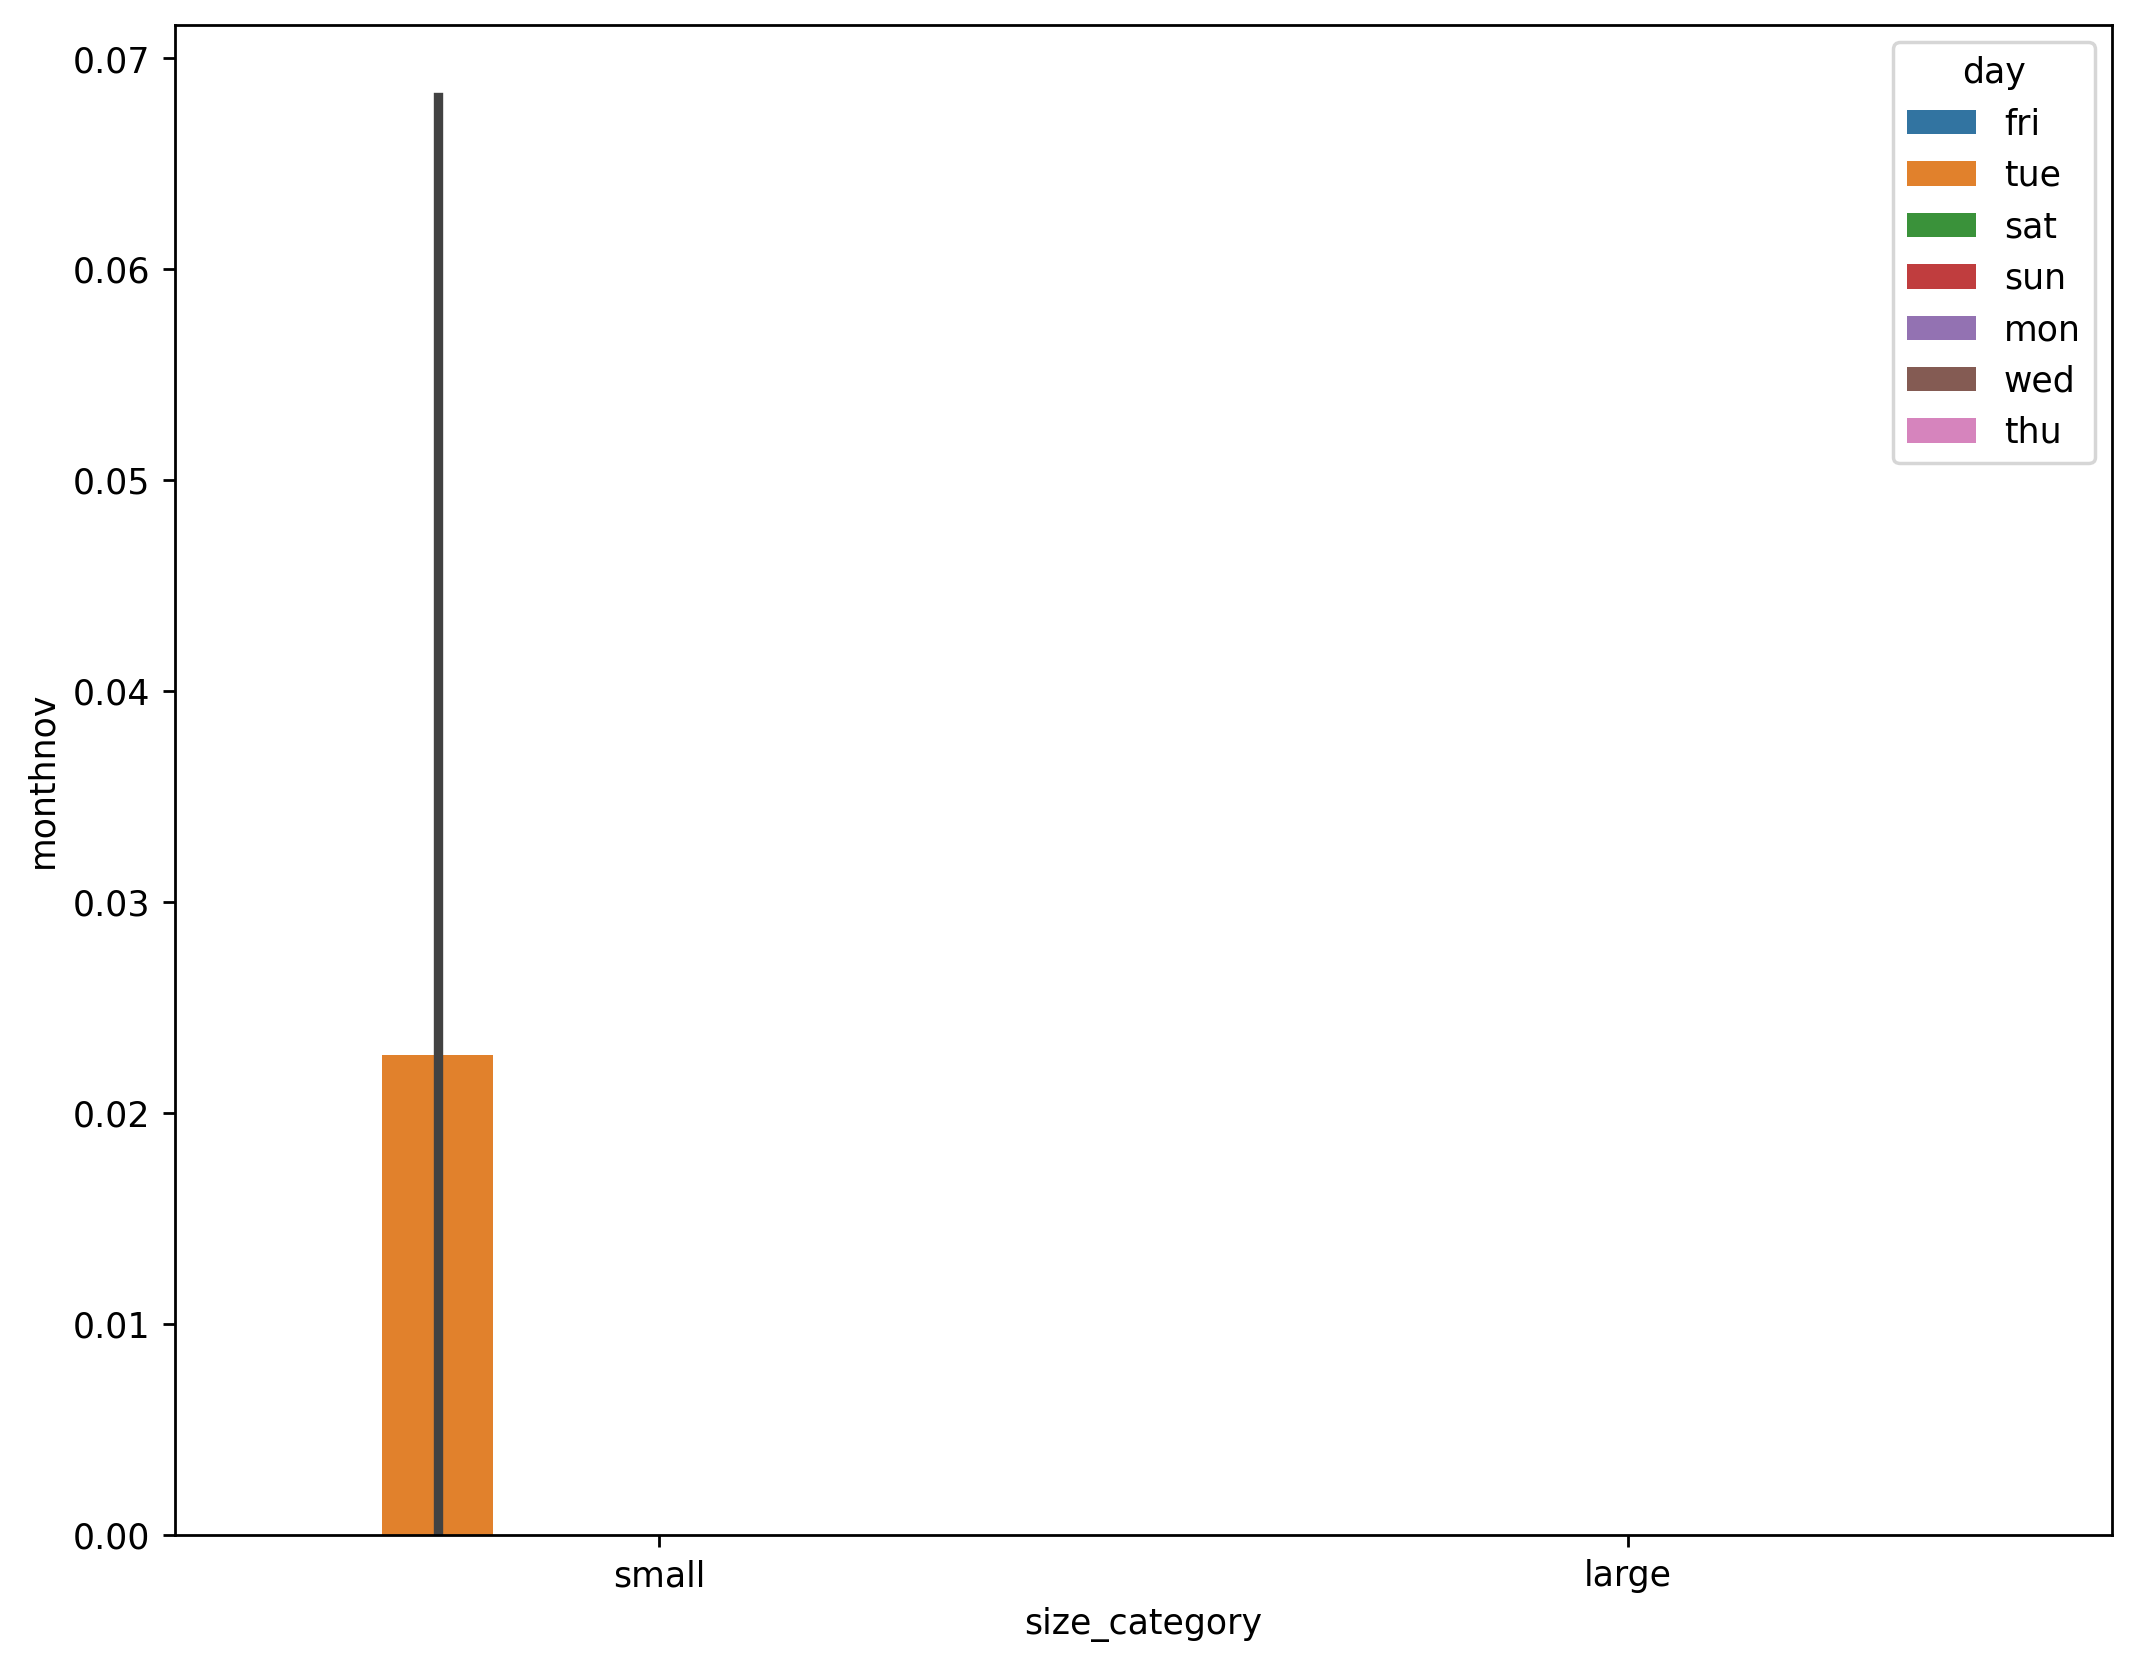

In [21]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthnov",hue="day",data=forest)

# Observation:
In the month of november they only burn small area of the forest on tuesday

<AxesSubplot:xlabel='size_category', ylabel='monthdec'>

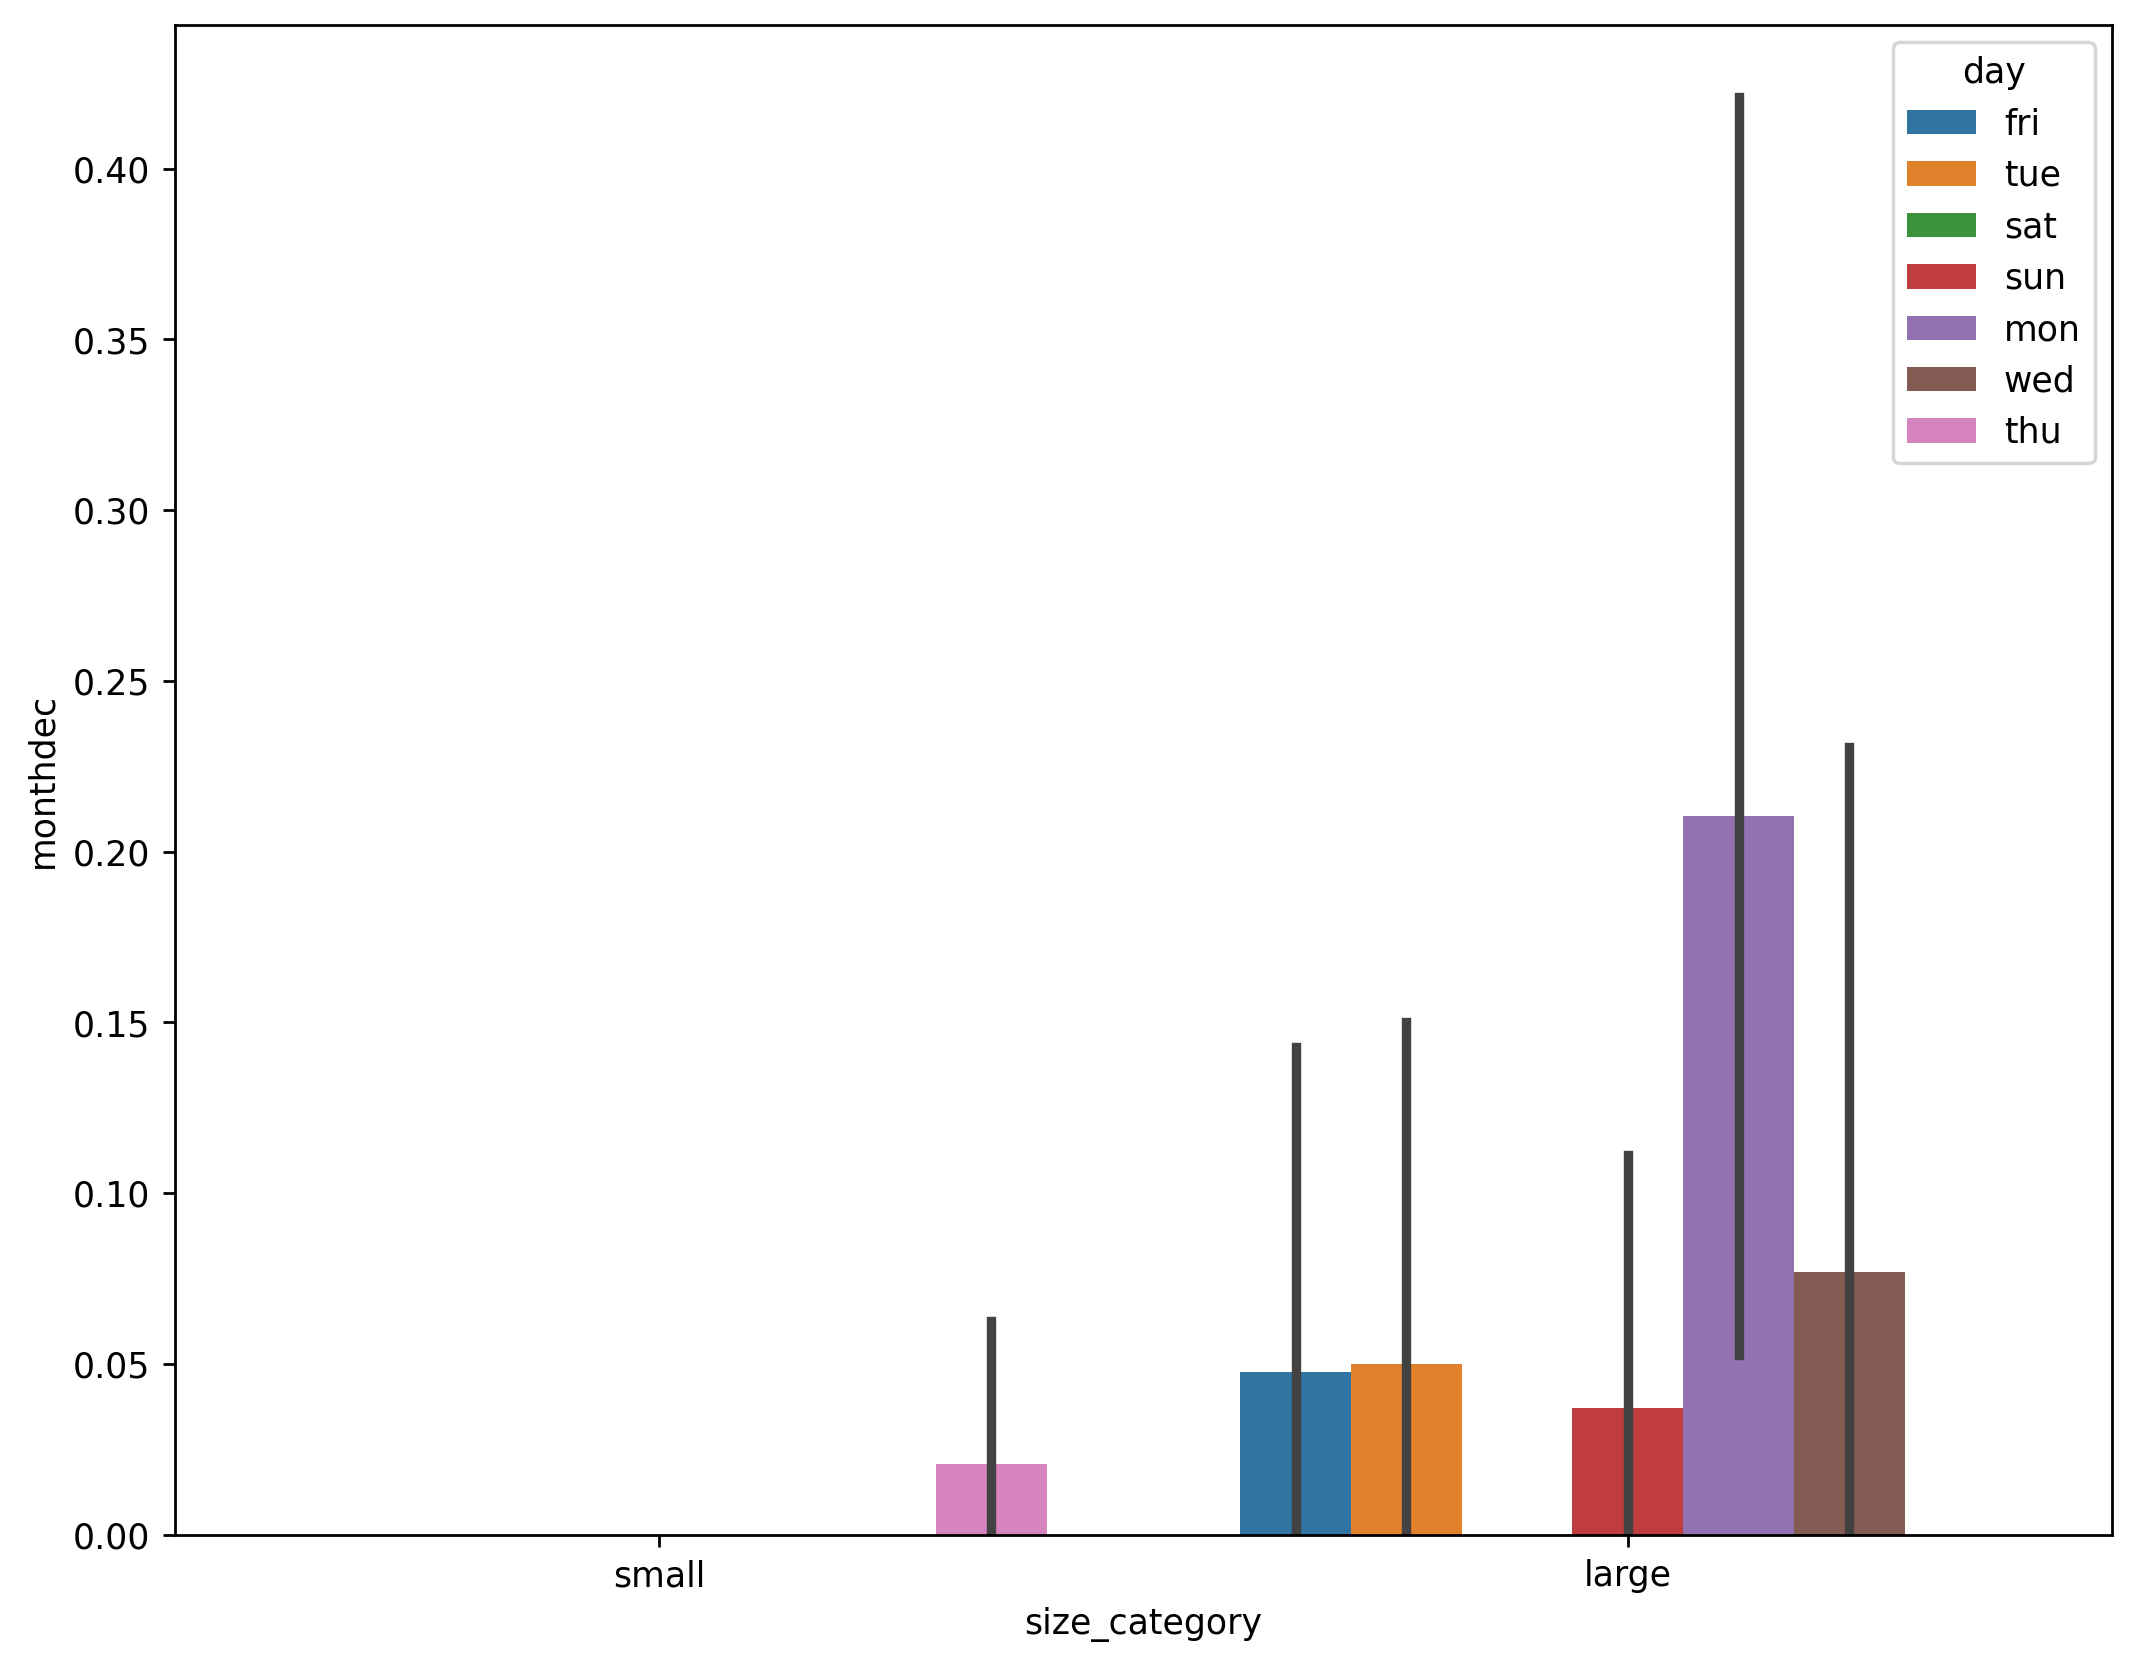

In [22]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("size_category","monthdec",hue="day",data=forest)

# Observation:
In the month of december they burn small area of forest on thurday and except thursday and saturday they burn large area of the forest

<AxesSubplot:xlabel='month', ylabel='FFMC'>

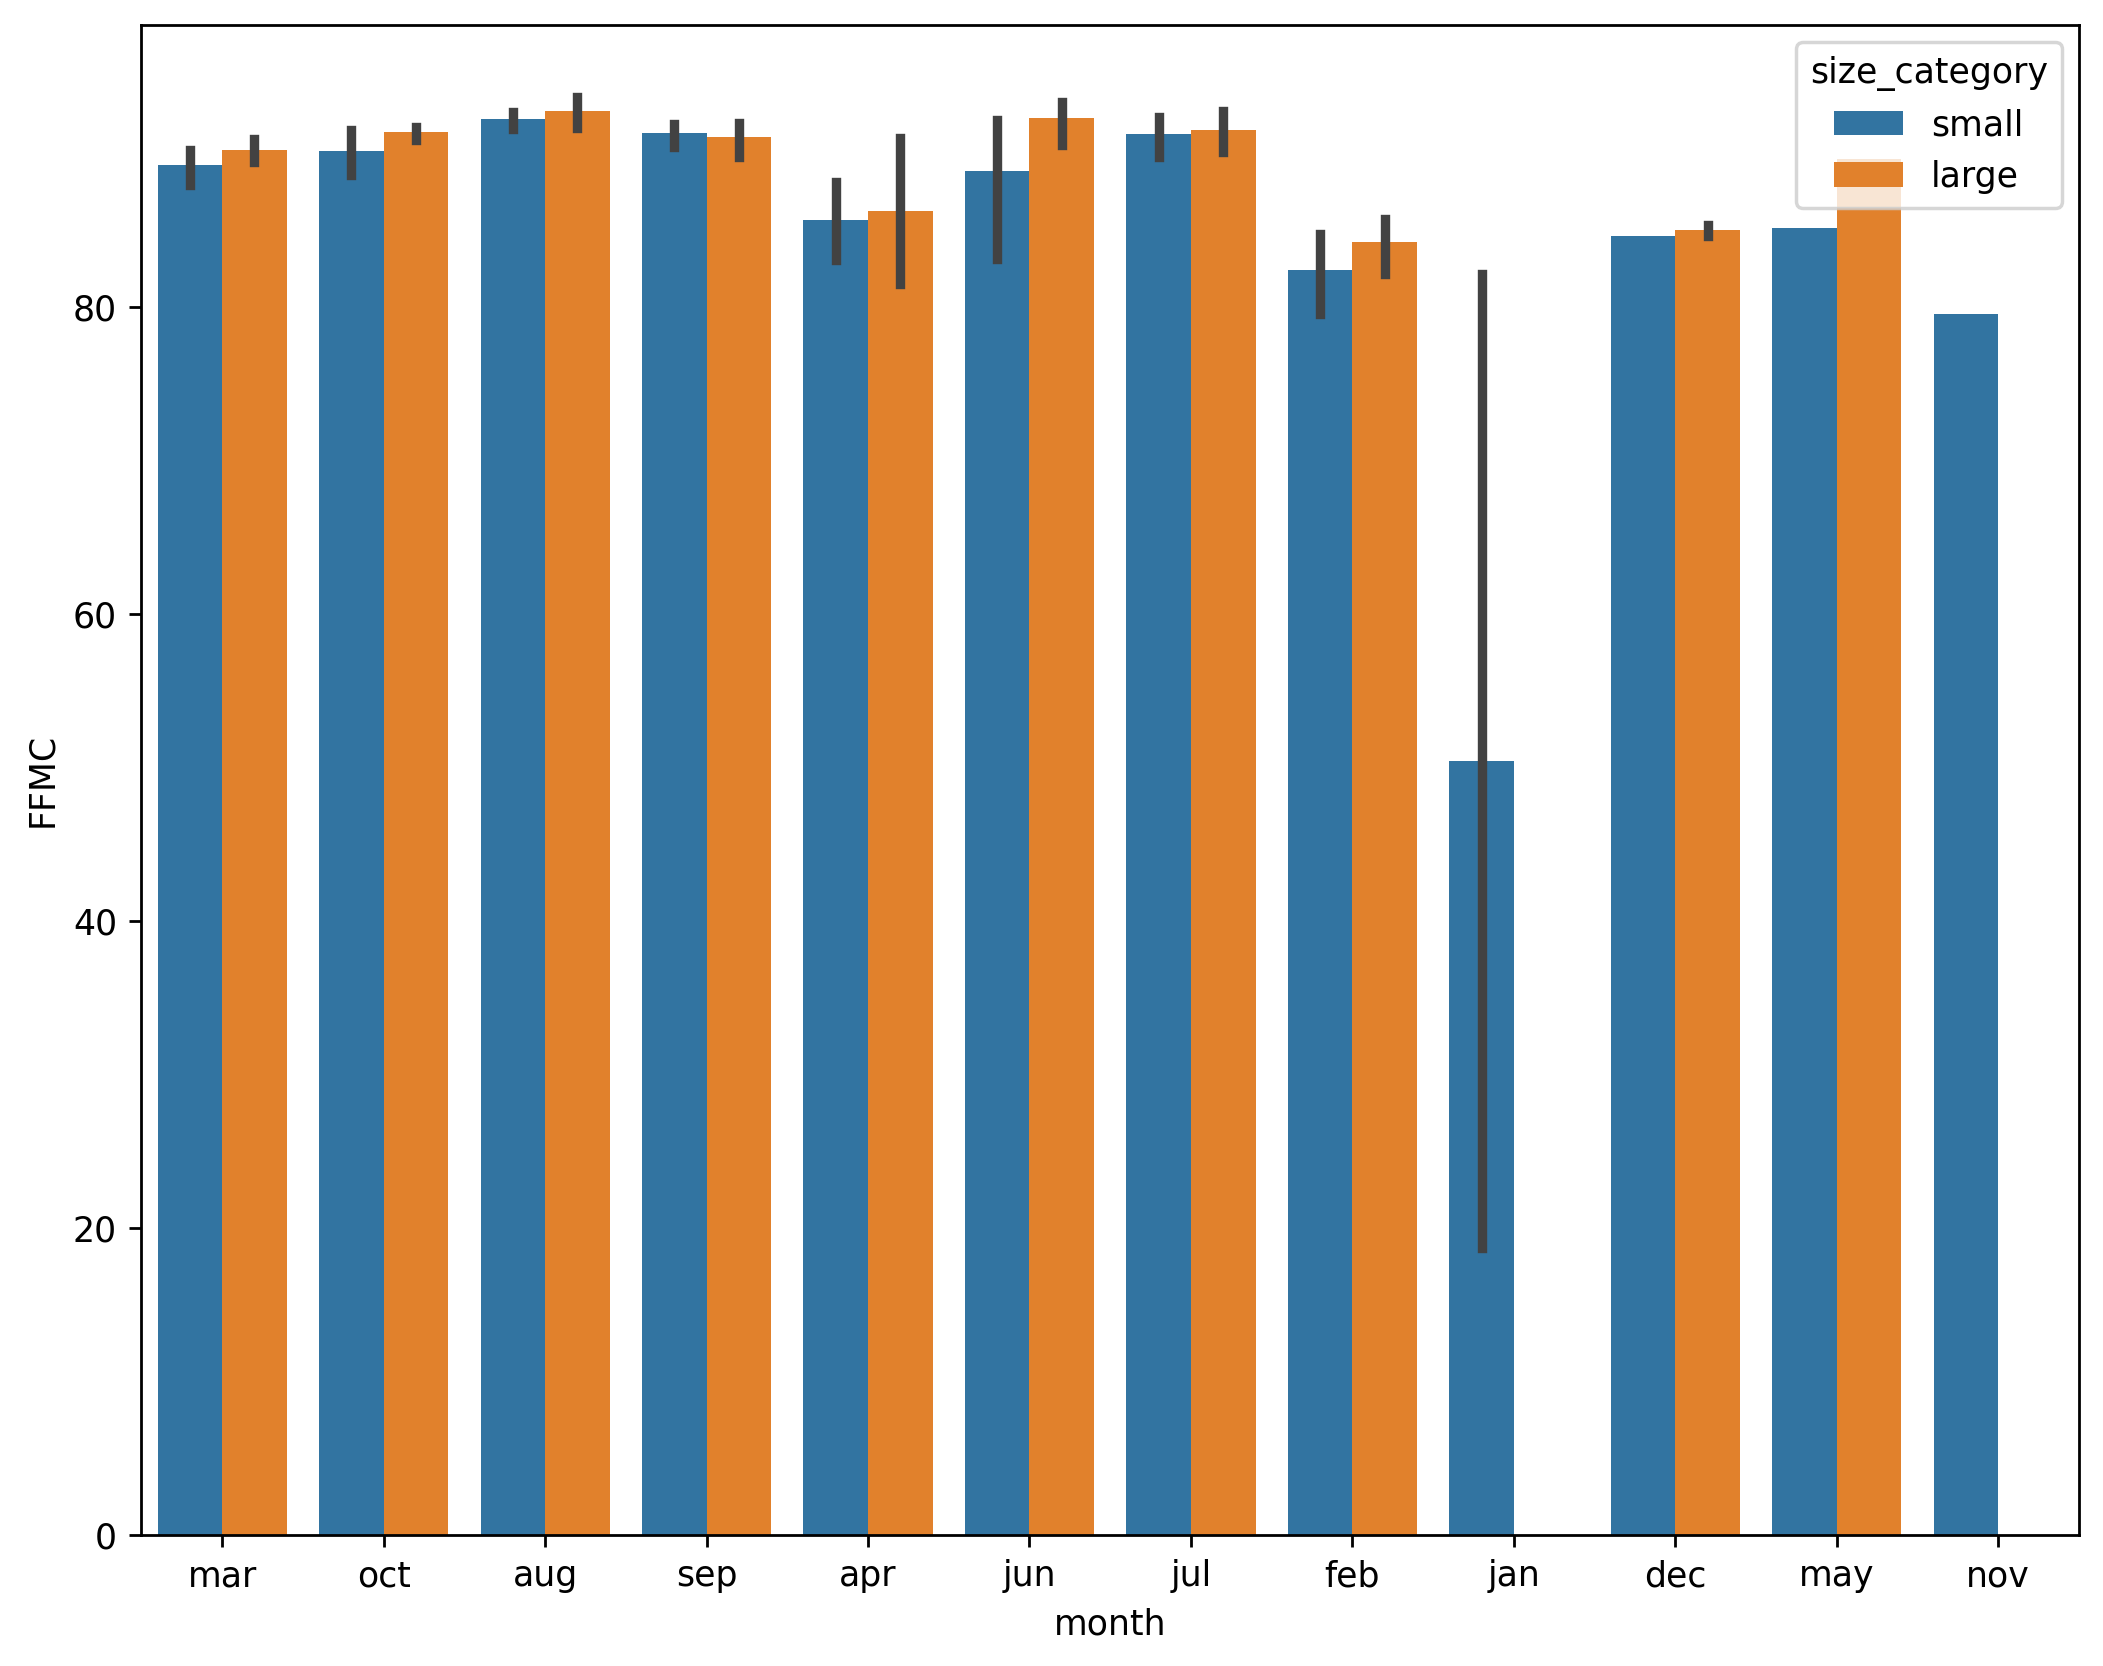

In [23]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","FFMC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='DMC'>

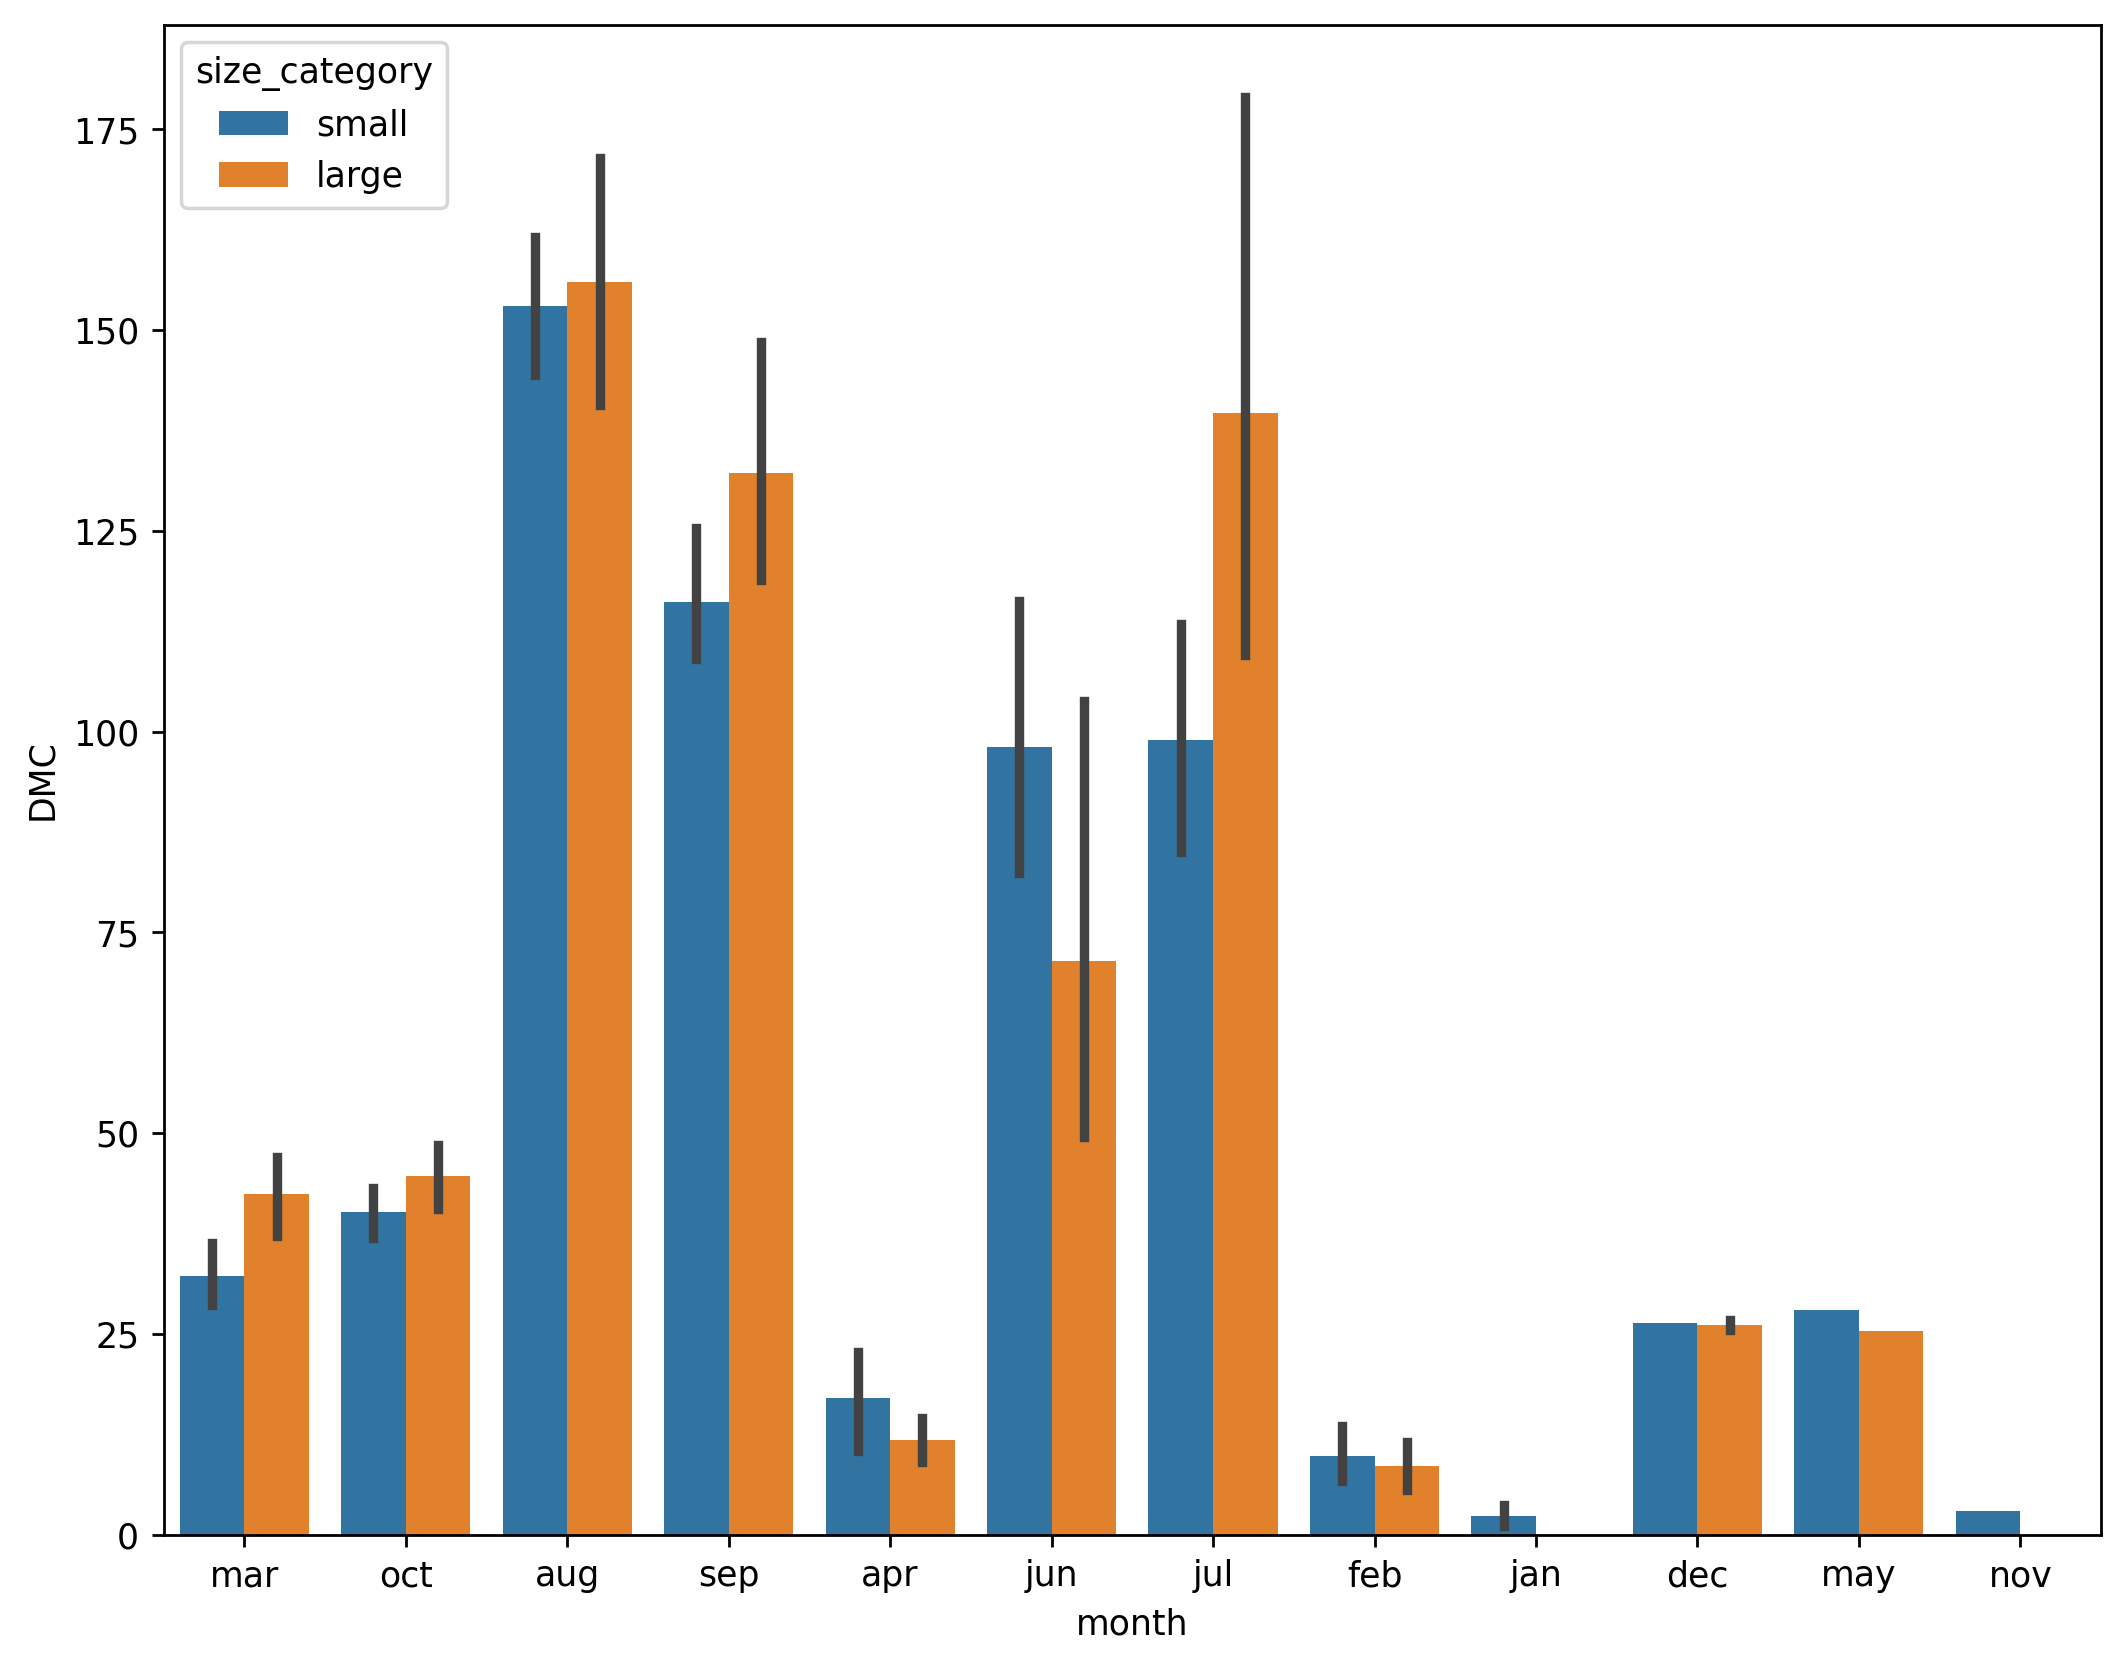

In [24]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","DMC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='DC'>

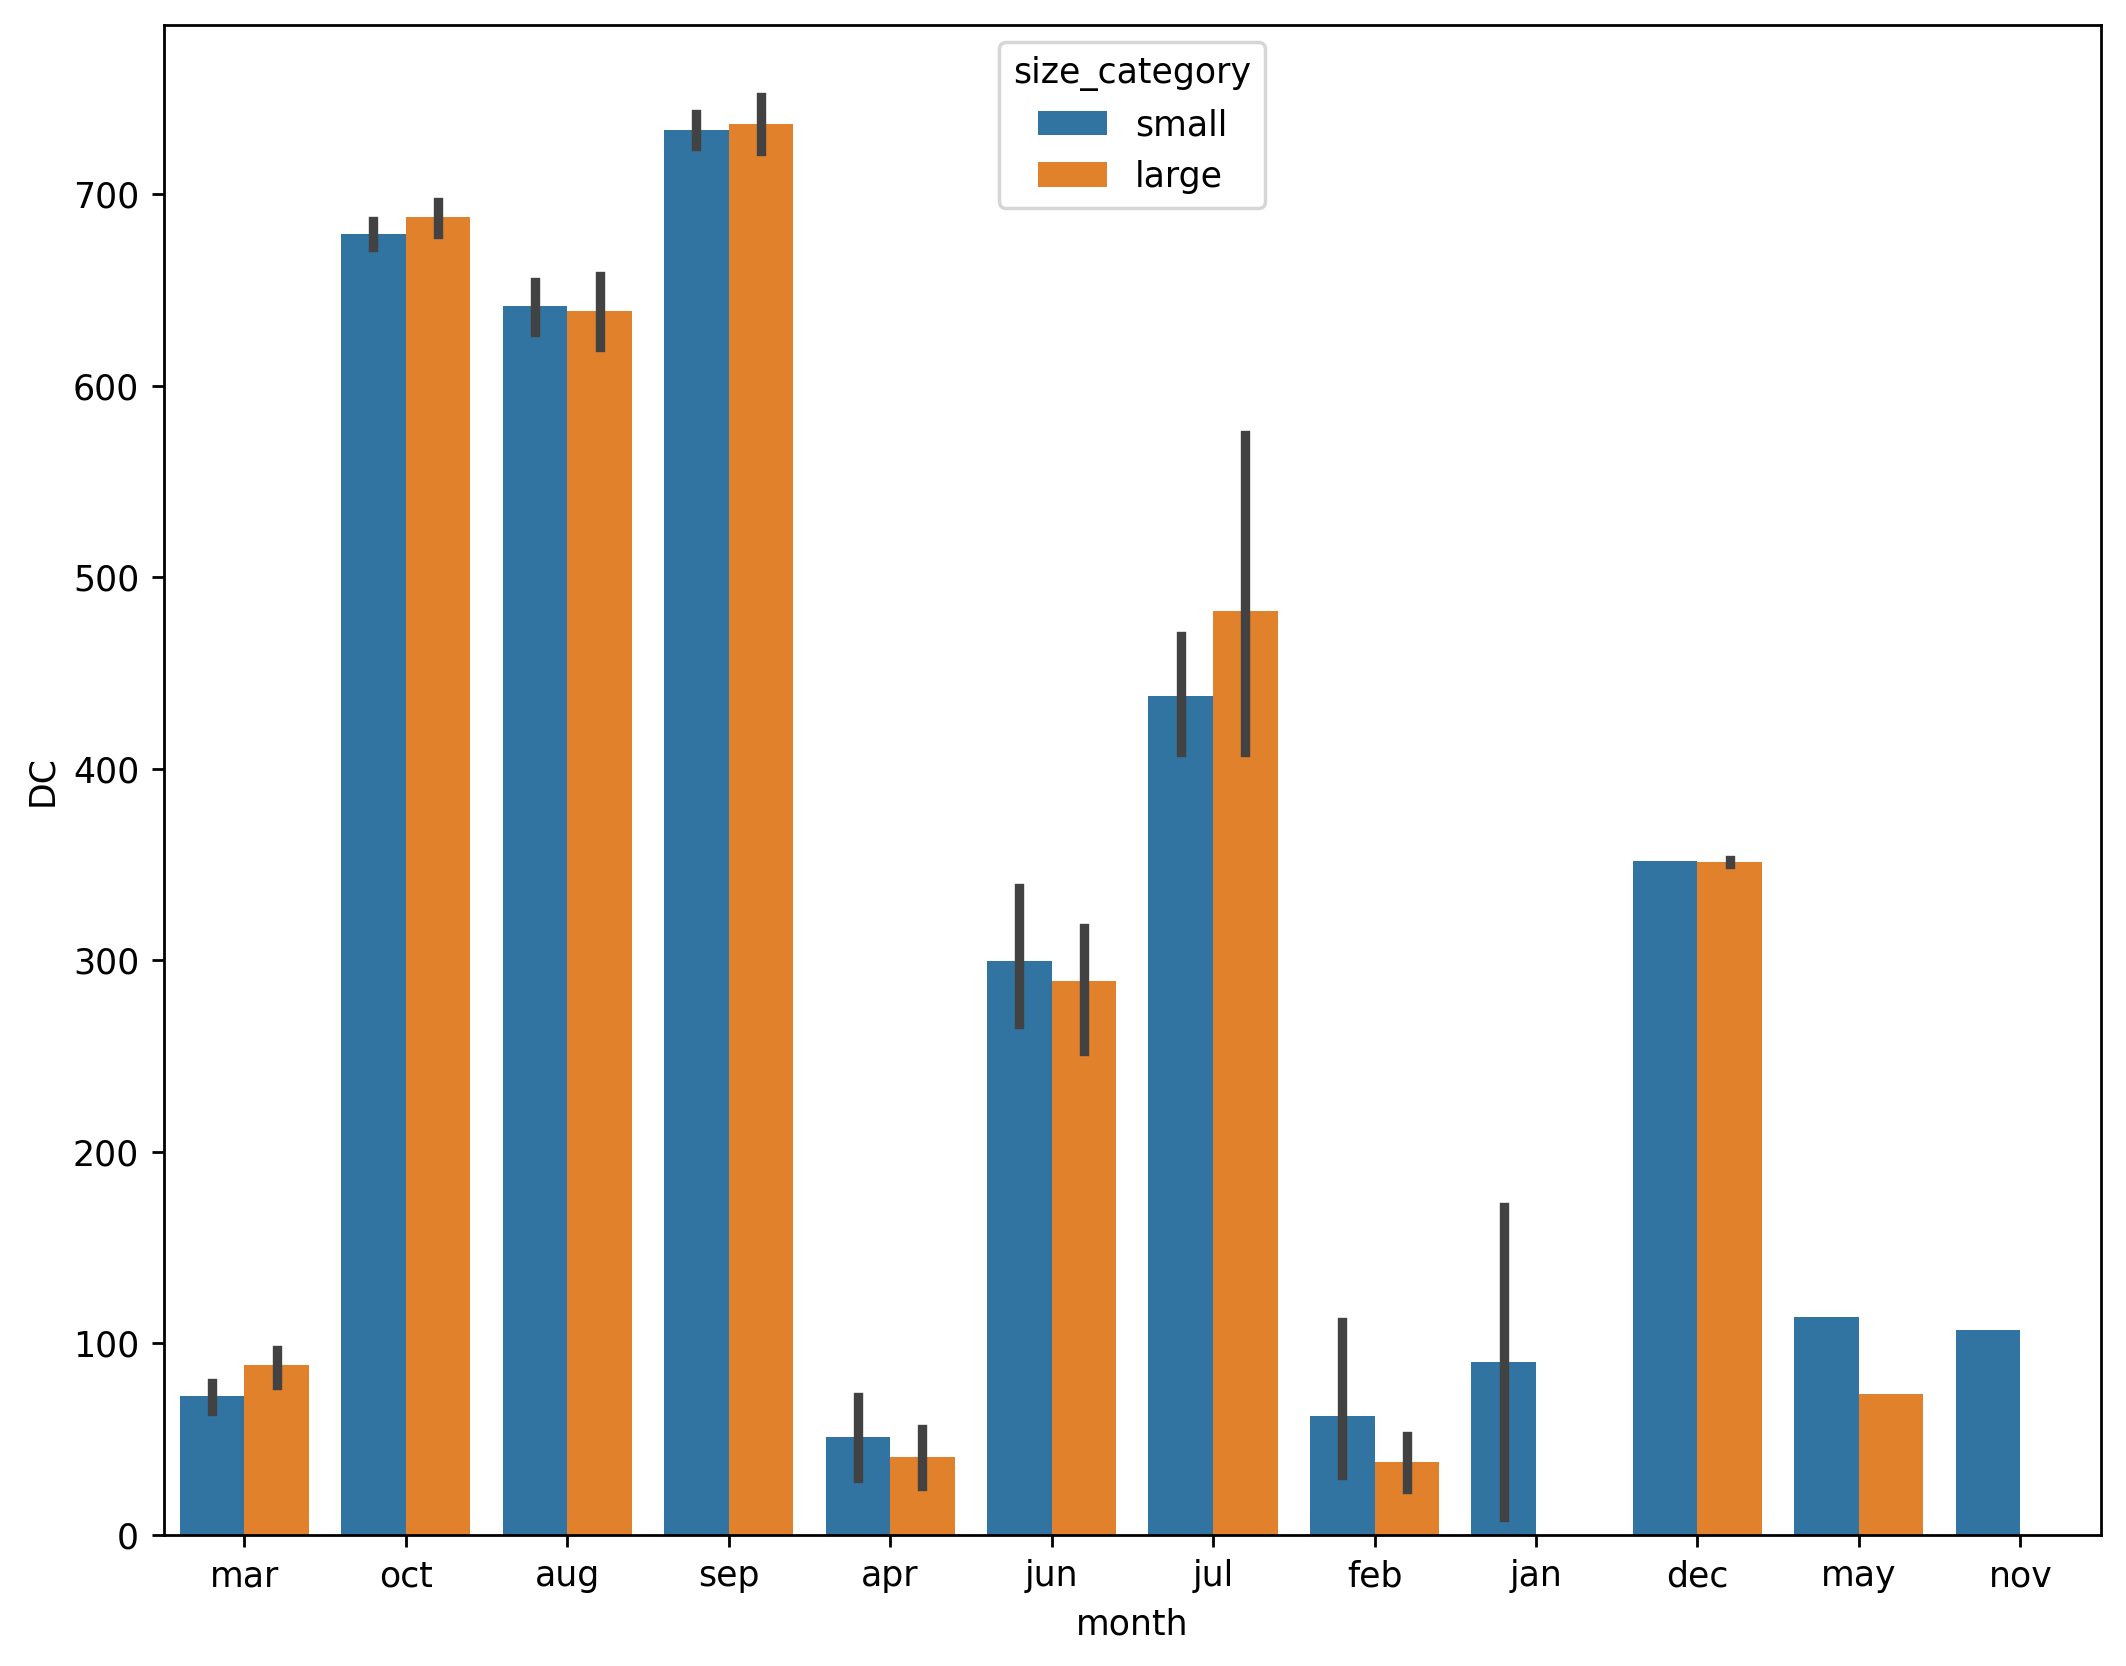

In [25]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","DC",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='ISI'>

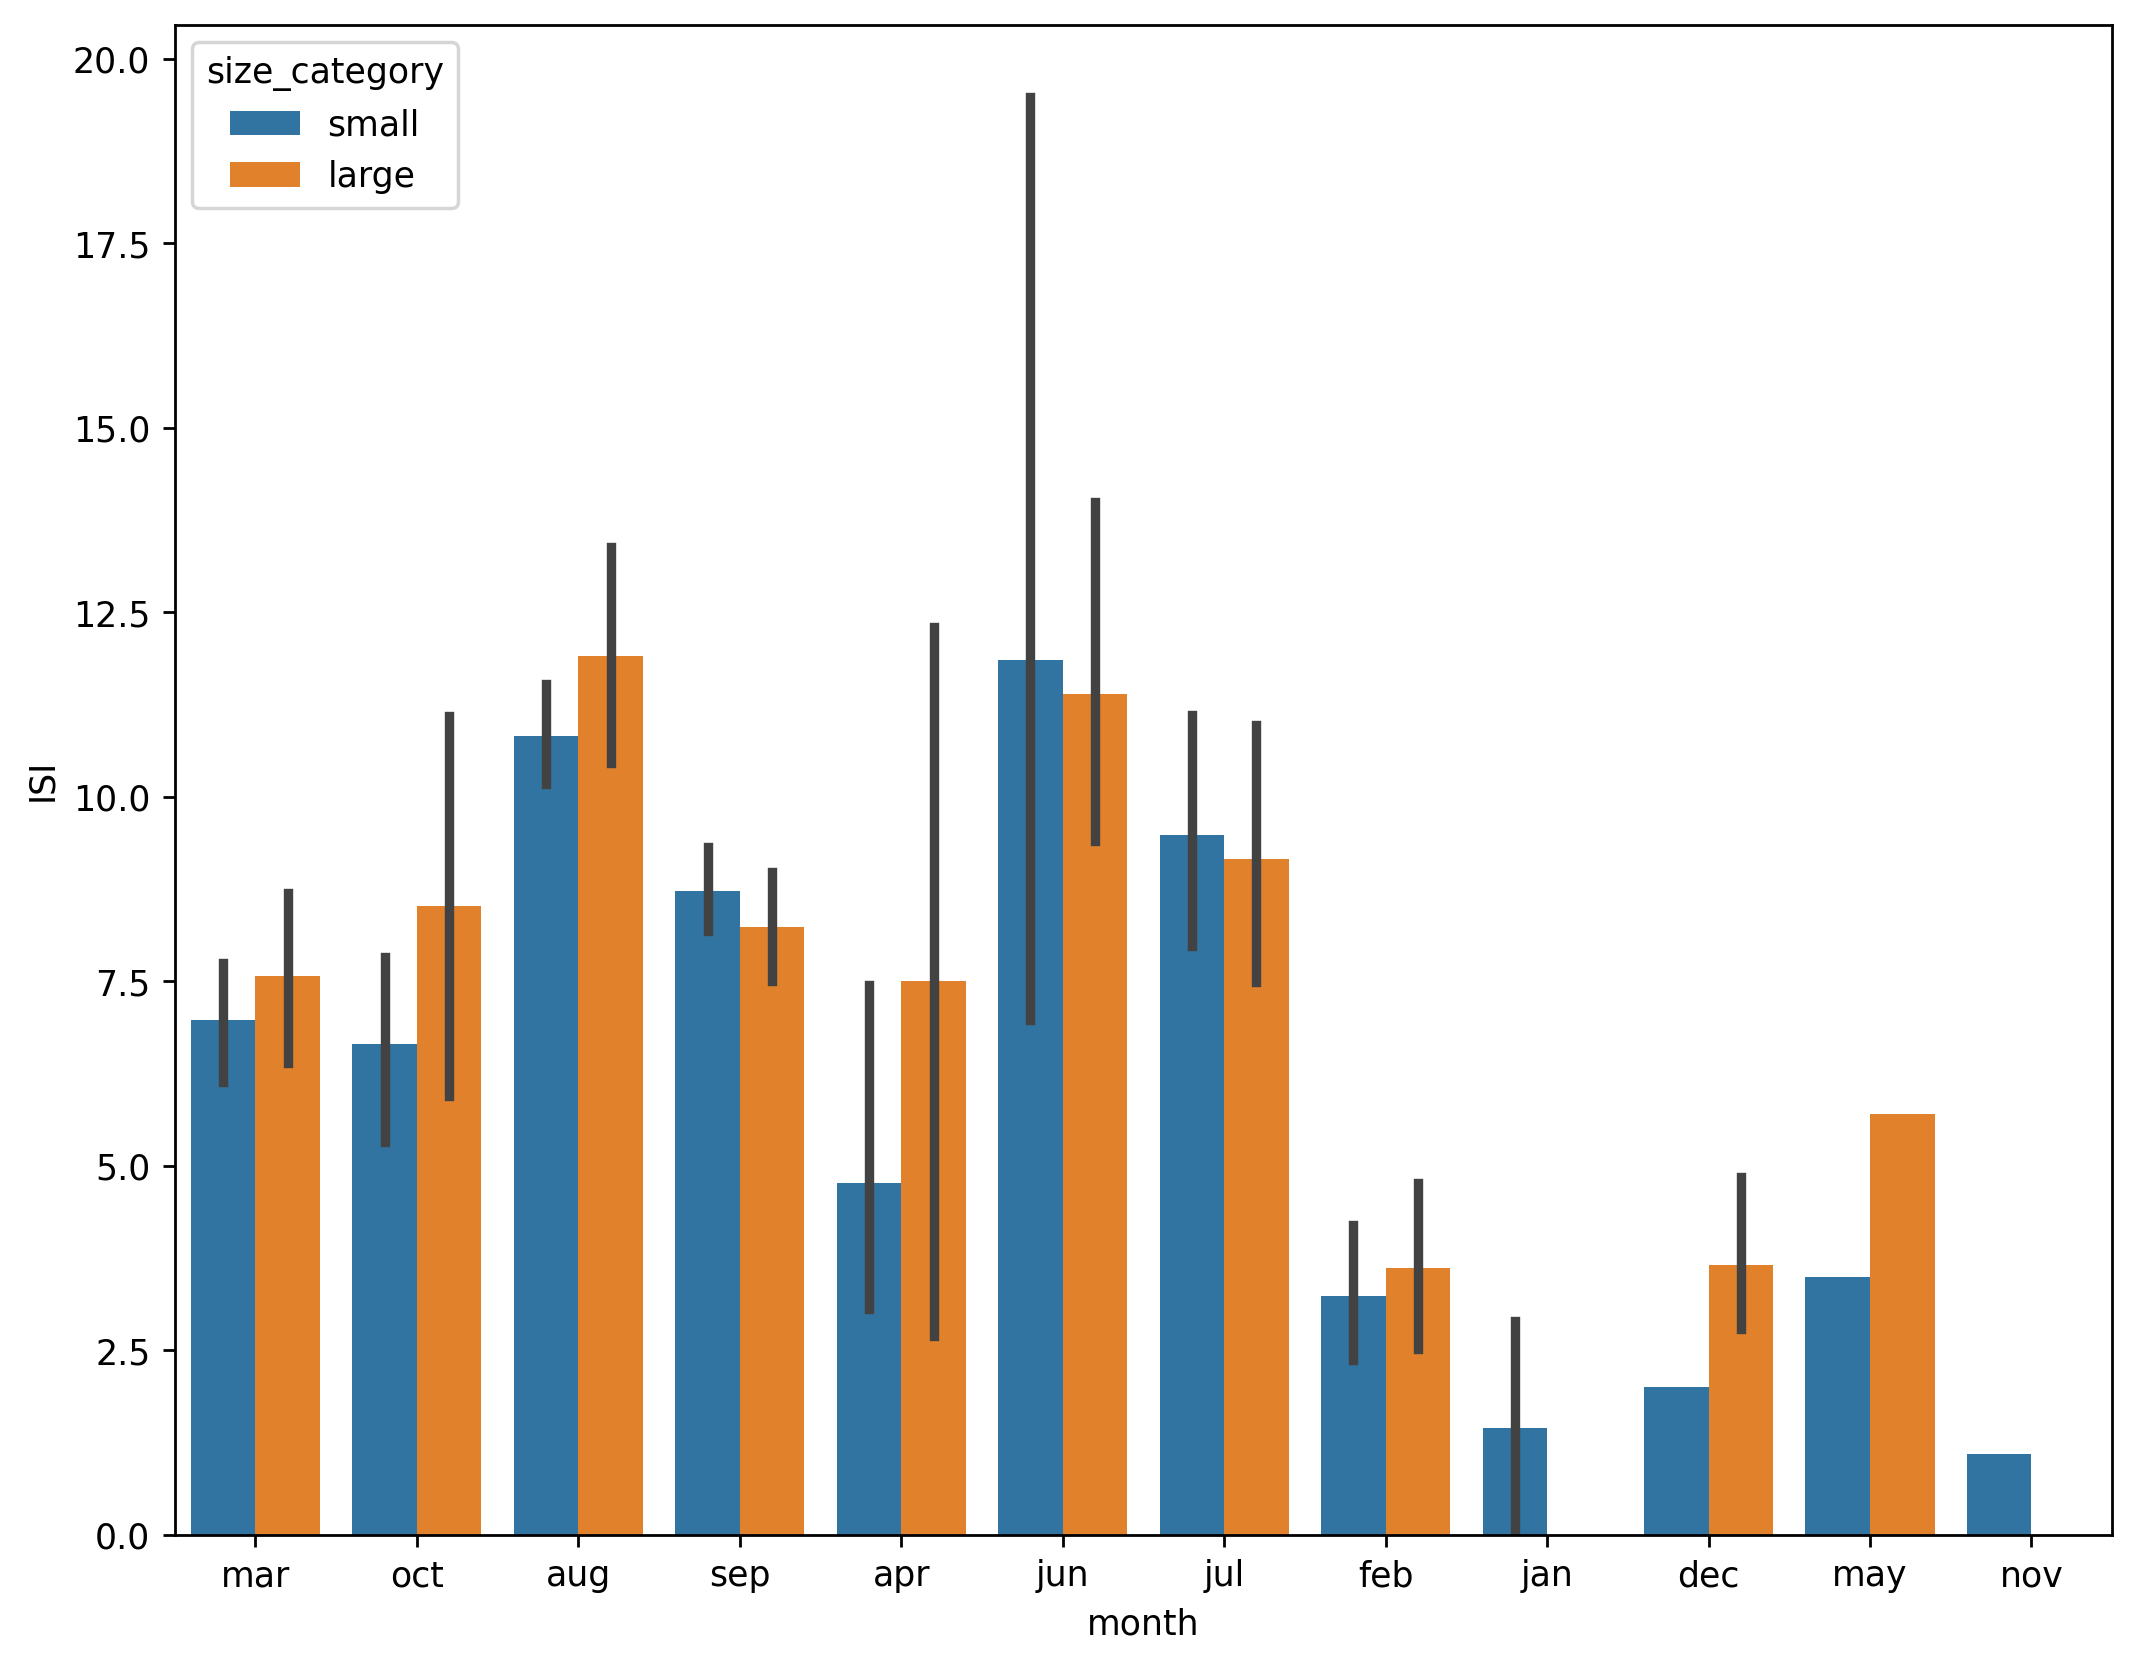

In [26]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","ISI",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='RH'>

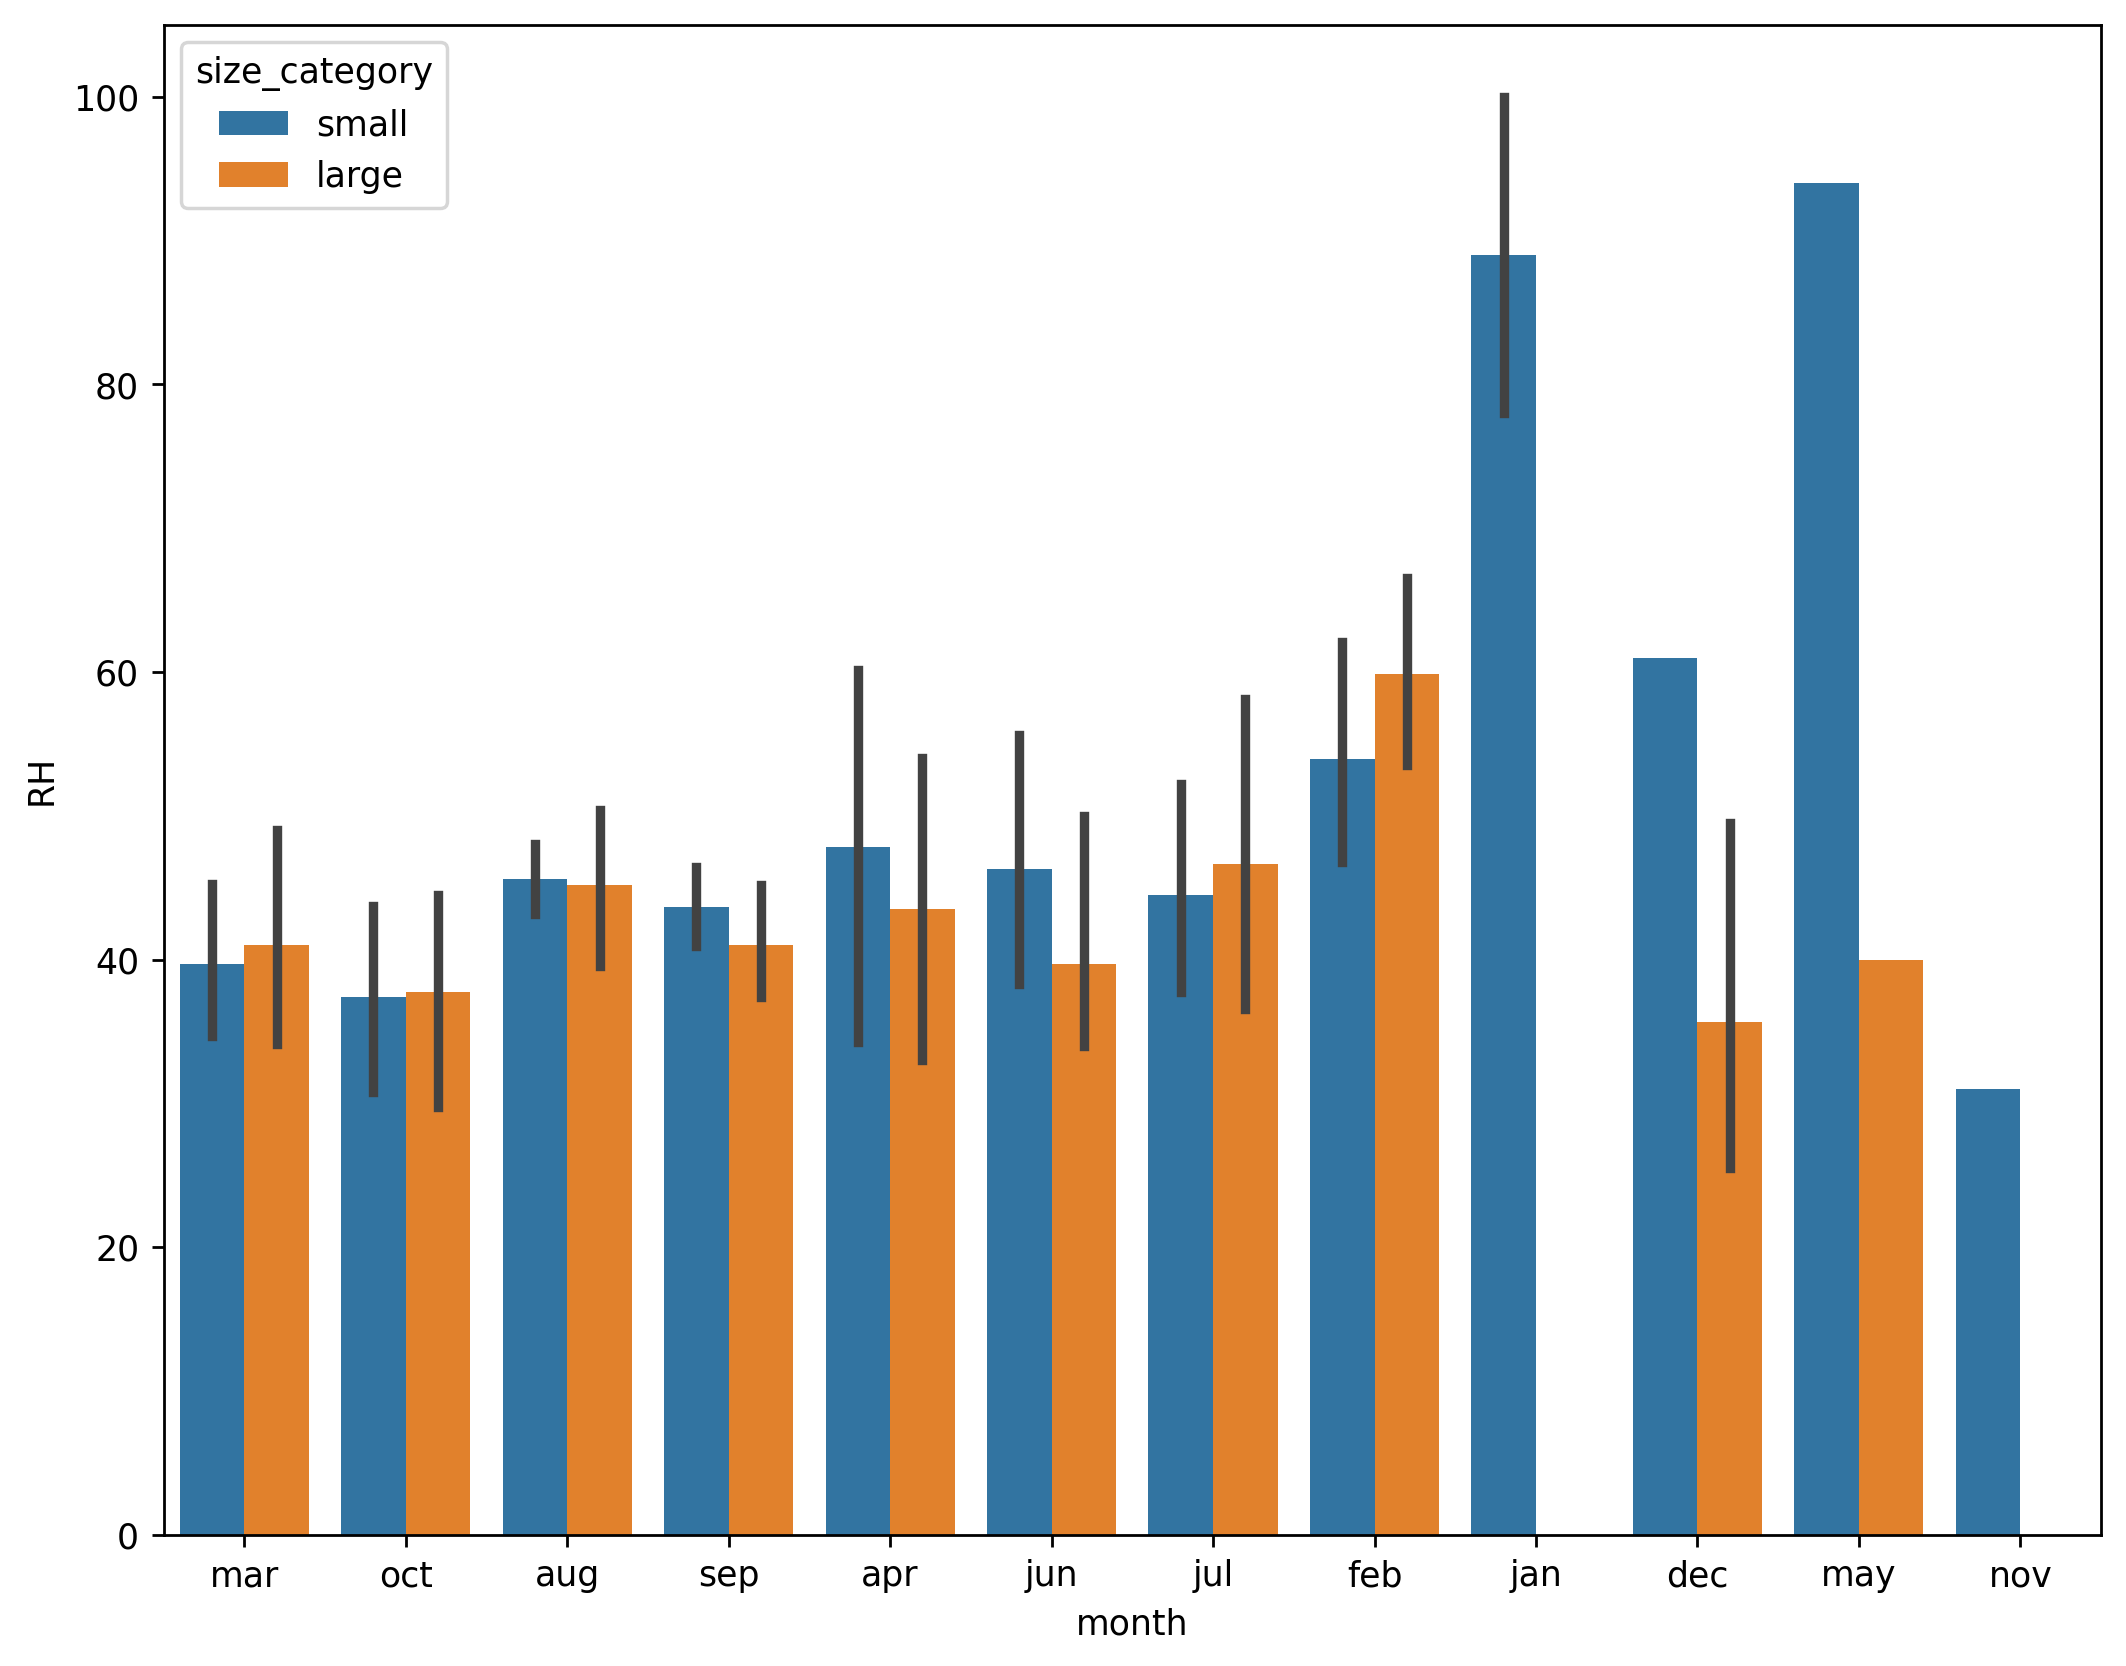

In [27]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","RH",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='wind'>

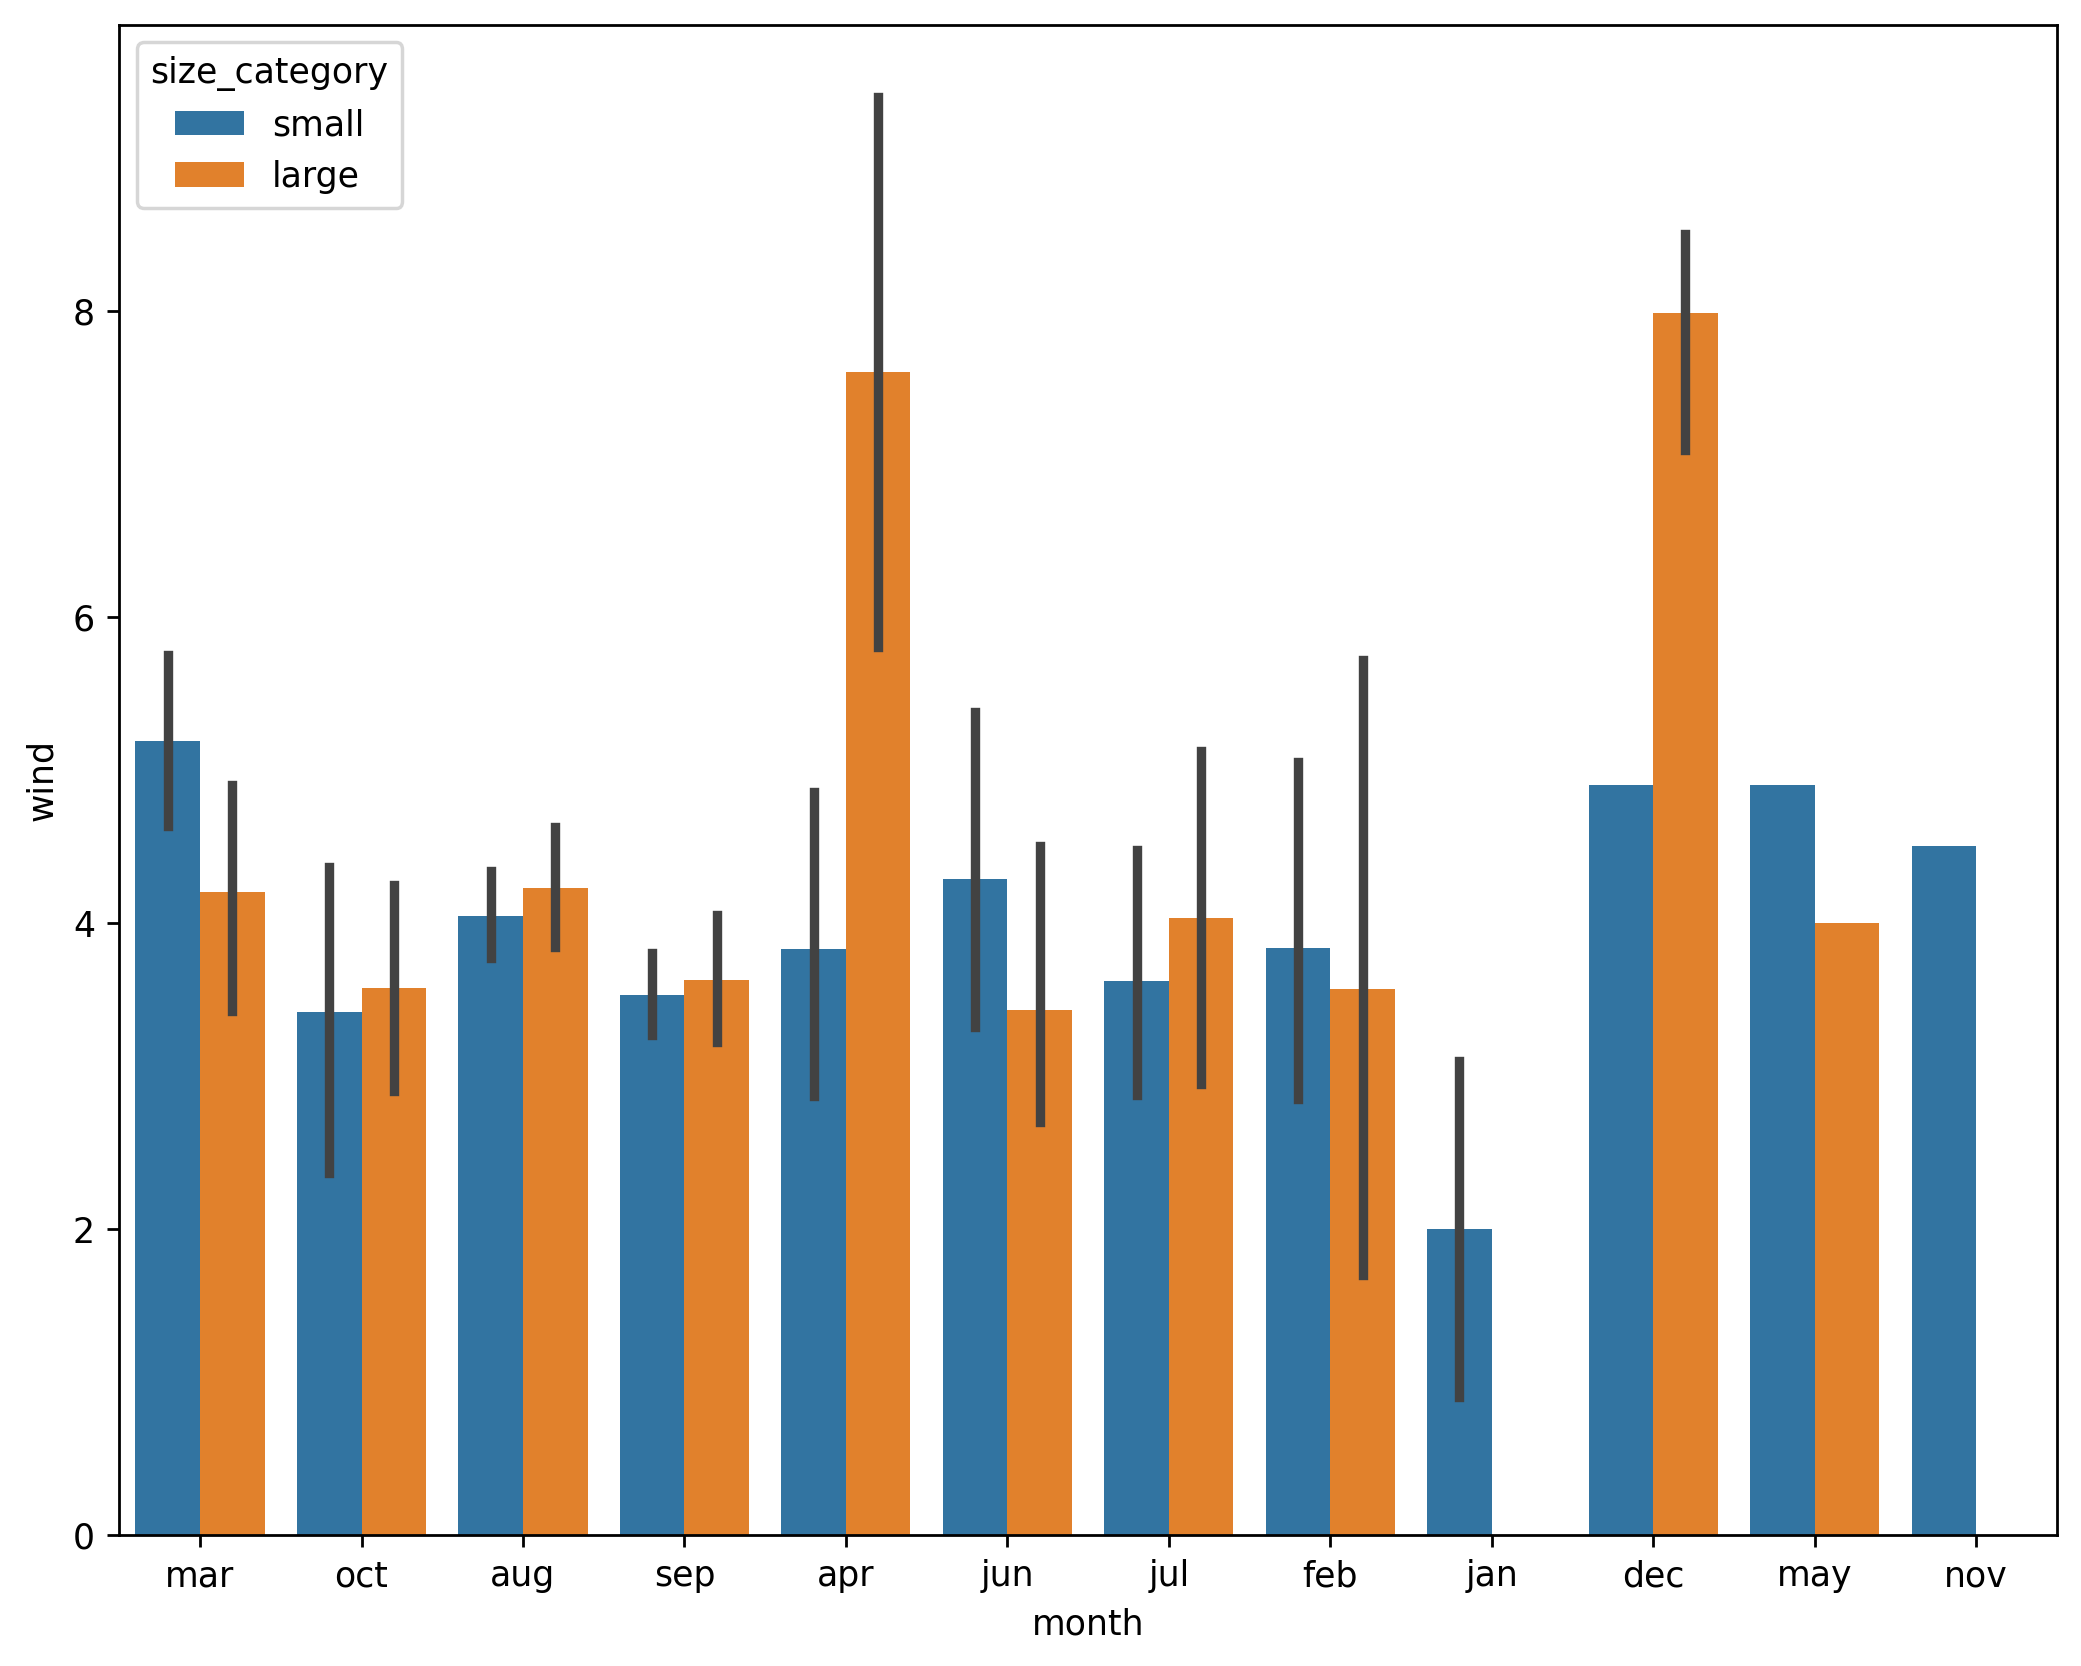

In [28]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","wind",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='temp'>

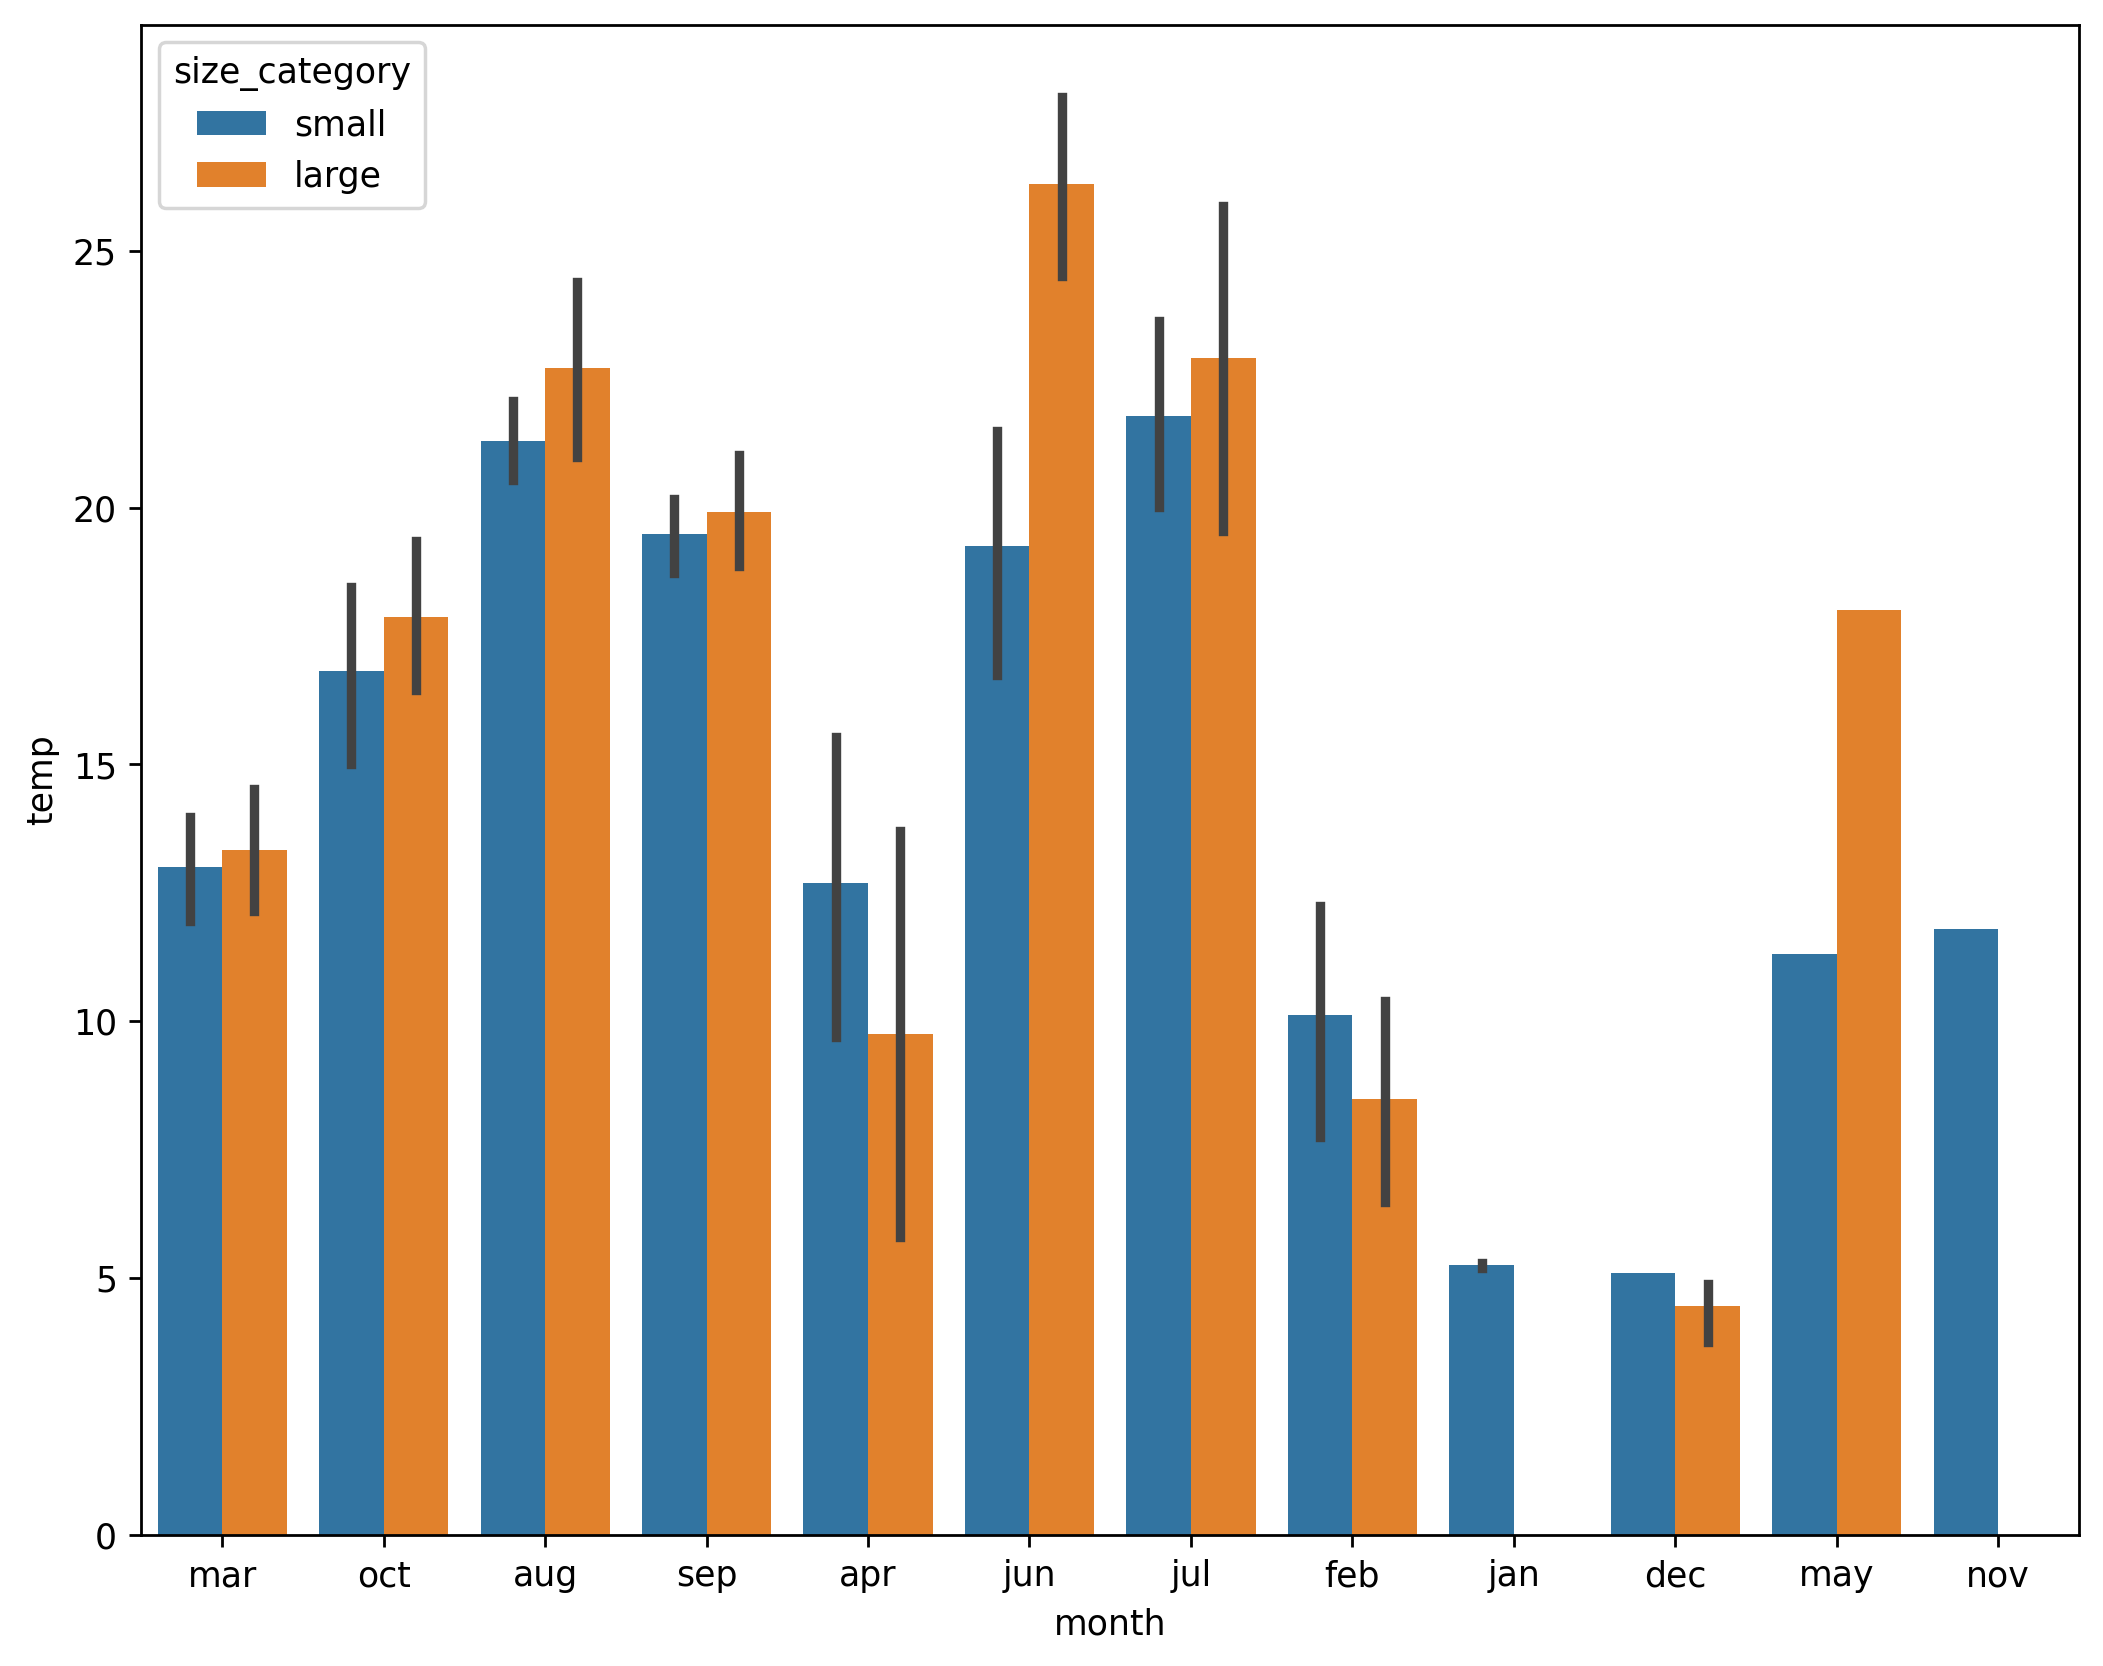

In [29]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","temp",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='rain'>

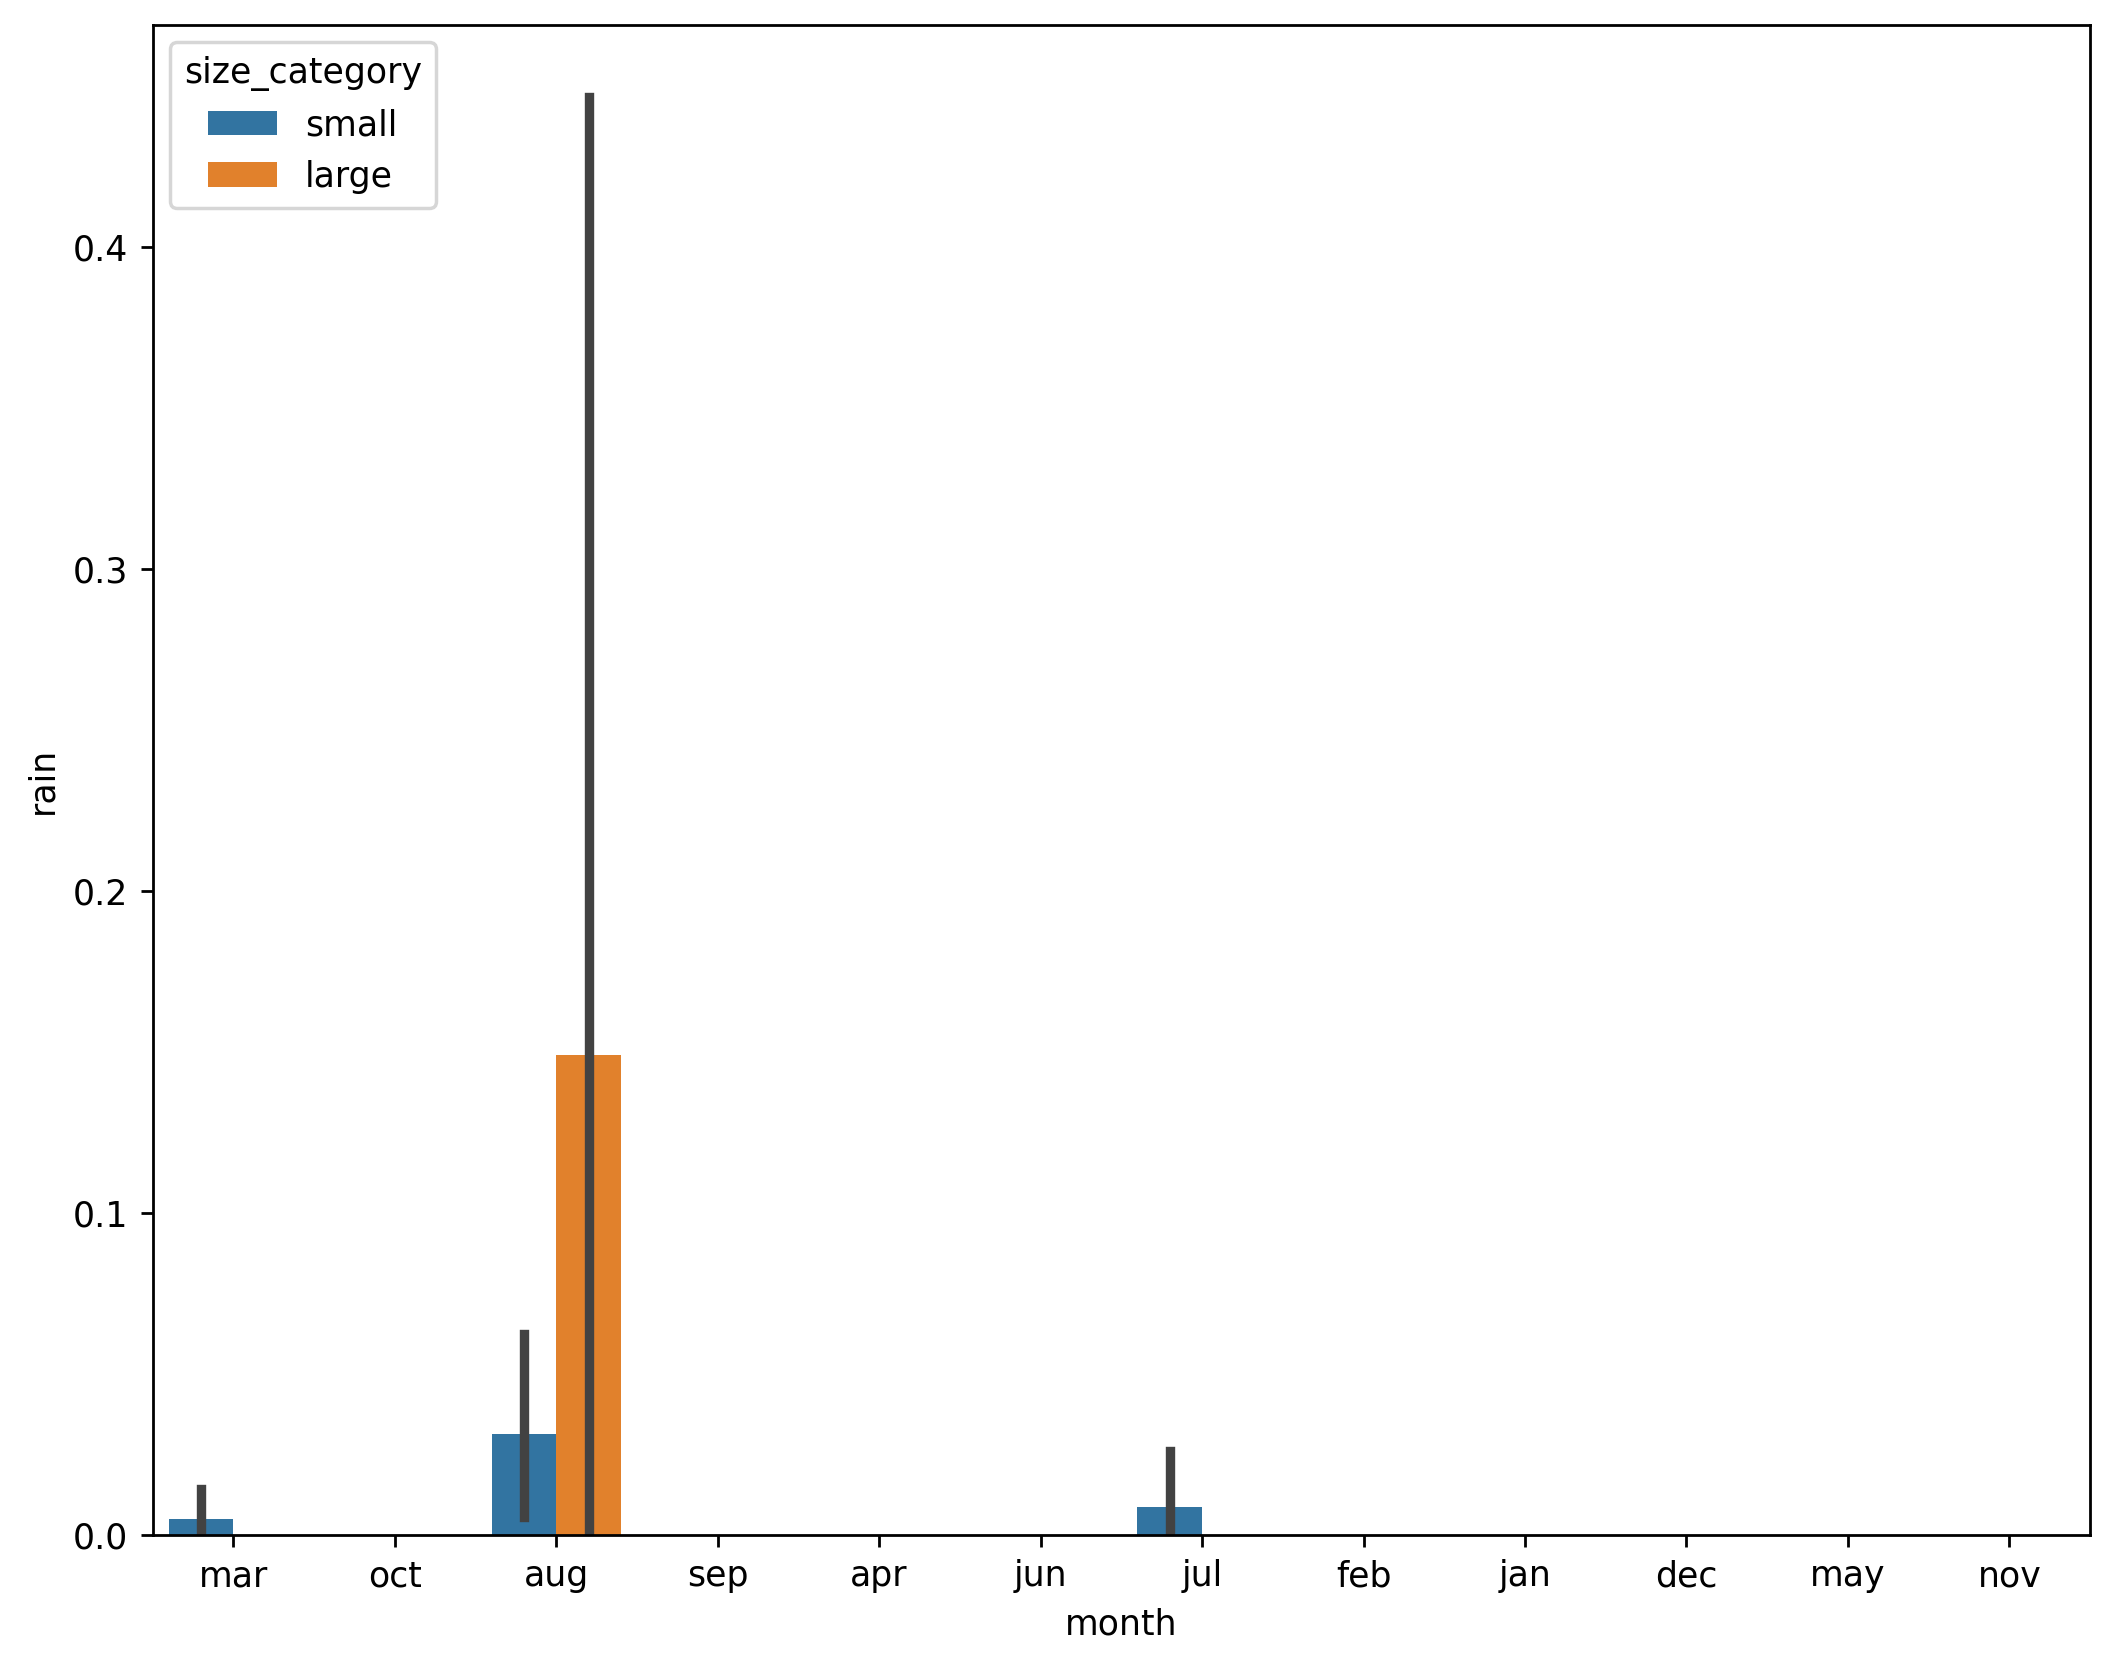

In [30]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","rain",hue="size_category",data=forest)

<AxesSubplot:xlabel='month', ylabel='area'>

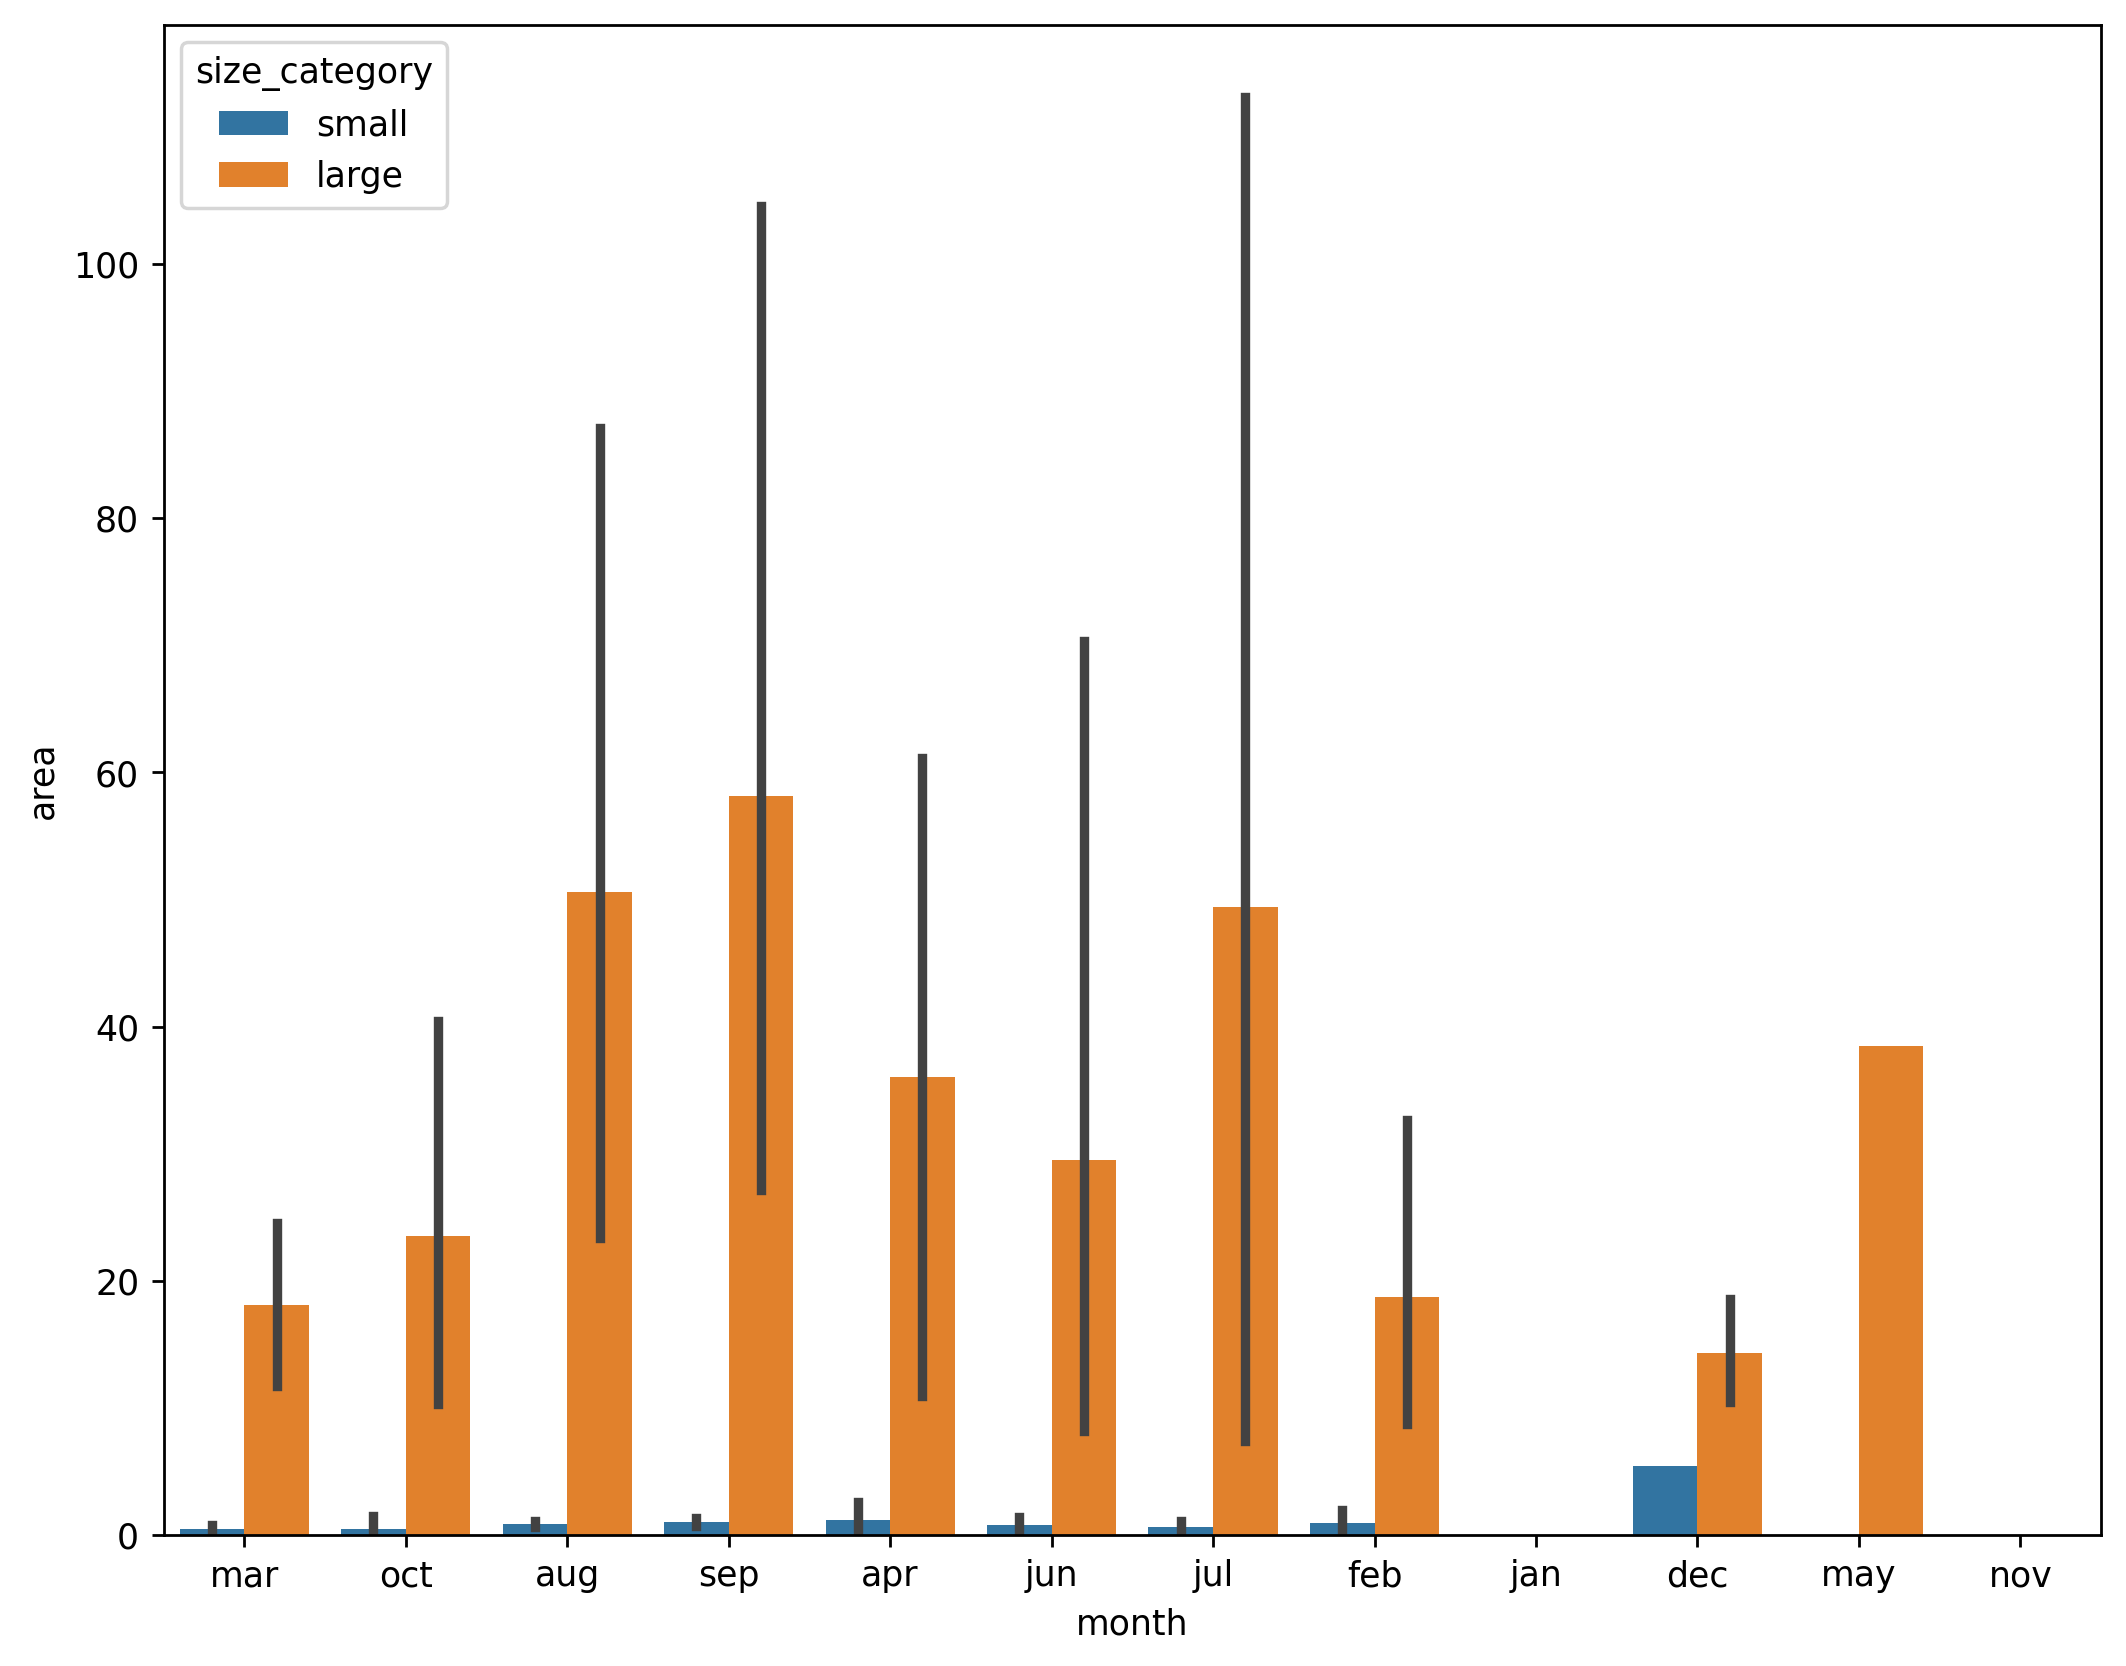

In [31]:
plt.figure(figsize=(10,8),dpi=250)
sns.barplot("month","area",hue="size_category",data=forest)

# PiePlot

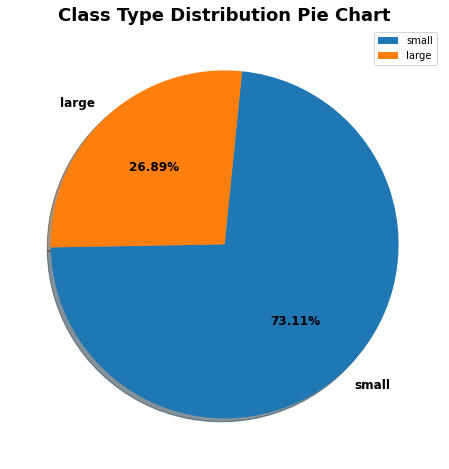

In [32]:
plt.figure(figsize = (12,8))
plt.pie(forest['size_category'].value_counts(),
       labels=forest.size_category.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Observation:
We can see in pie chart that there is an imbalance in the dataset

# Coverting Categorical value into Numeric value

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
forest["size_category"]=encoder.fit_transform(forest["size_category"])

In [35]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Dropping columns:Month and day

In [36]:
forest.drop(['month','day'],axis=1,inplace=True)

In [37]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


# Correration in the data

Text(0.5, 1.0, 'Correlation with size_category \n')

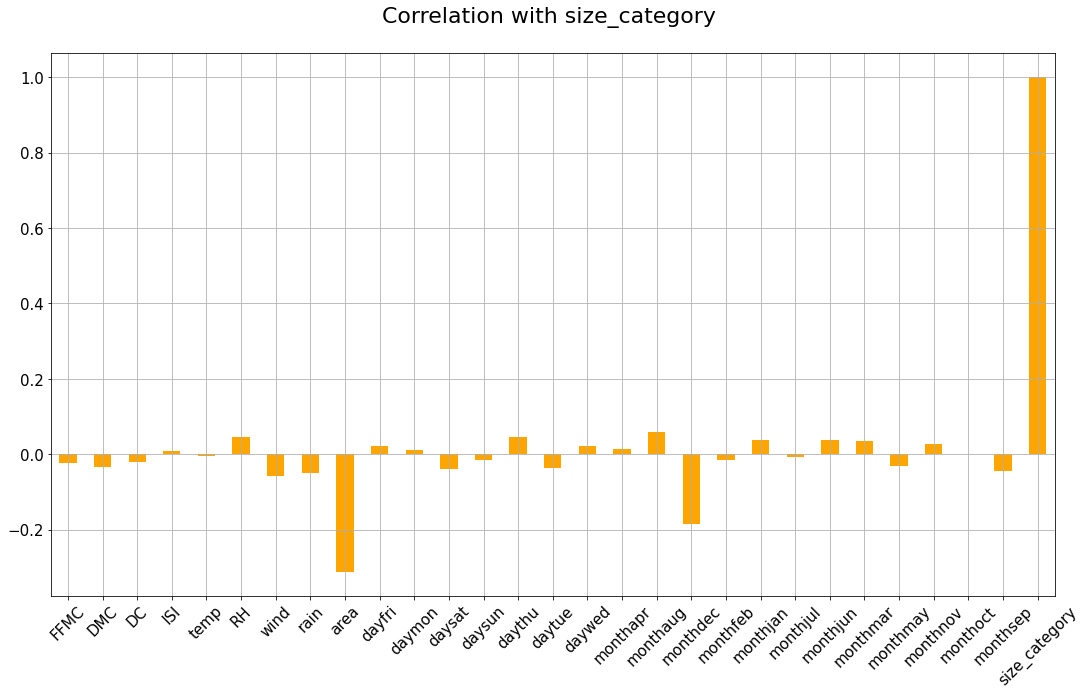

In [38]:
data = forest.copy()

correlations = data.corrwith(forest.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with size_category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Importing some SKlearn Libraries

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Spliting the data into X and Y

In [40]:
X = forest.iloc[:,0:27]
Y = forest[["size_category"]]

In [41]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,1,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,1,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,1,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


# Spliting the data into training and testing

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [44]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
79,91.0,121.2,561.6,7.0,21.6,19,6.7,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
285,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
226,91.7,48.5,696.1,11.1,16.1,44,4.0,0.0,49.37,0,...,0,0,0,0,0,0,0,0,0,1
69,91.7,33.3,77.5,9.0,17.2,26,4.5,0.0,0.00,1,...,0,0,0,0,0,0,1,0,0,0
73,88.8,147.3,614.5,9.0,17.3,43,4.5,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,93.7,231.1,715.1,8.4,25.9,32,3.1,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
15,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
377,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,0,...,1,0,0,0,0,0,0,0,0,0
163,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
432,94.8,222.4,698.6,13.9,23.9,38,6.7,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
243,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
61,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
408,90.3,290.0,855.3,7.4,19.9,44,3.1,0.0,7.80,1,...,0,0,0,0,0,0,0,0,0,0
405,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,90.9,126.5,686.5,7.0,15.6,66,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
102,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
212,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13,1,...,0,0,0,0,0,0,0,0,0,0
216,92.4,124.1,680.7,8.5,16.9,60,1.3,0.0,29.48,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y_train

,size_category
79,1
285,1
226,0
69,1
73,1
...,...
398,1
15,1
377,0
163,1


In [47]:
Y_test

,size_category
432,1
243,1
61,1
408,0
405,1
...,...
137,1
102,1
212,0
216,0


# For Balancing Data we use oversampling technique

In [48]:
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN
oversample = SMOTE()
oversample2 = ADASYN()
oversample3 = SMOTETomek()
oversample4 = SMOTEENN()

# Applying SMOTEENN Technique on Train and Test data for better accuracy

In [49]:
X_res_train,Y_res_train = oversample4.fit_resample(X_train,Y_train)
X_res_test,Y_res_test = oversample4.fit_resample(X_test,Y_test)

In [50]:
X_res_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,91.7,48.5,696.1,11.1,16.1,44,4.0,0.0,49.37,0,...,0,0,0,0,0,0,0,0,0,1
1,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23,0,...,0,0,0,0,0,0,0,0,0,1
2,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,0,...,0,0,1,0,0,0,0,0,0,0
3,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23,1,...,0,0,0,0,0,0,0,0,0,0
4,88.6,91.8,709.9,7.1,12.4,73,6.3,0.0,30.32,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,91.6,248.4,753.8,6.3,16.6,59,2.7,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
423,93.7,231.1,715.1,8.4,25.9,32,3.1,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
424,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
425,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_res_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,7.40,0,...,0,0,0,0,0,0,1,0,0,0
1,93.9,135.7,586.7,15.1,20.8,34,4.9,0.0,6.96,1,...,1,0,0,0,0,0,0,0,0,0
2,93.5,149.3,728.6,8.1,22.9,39,4.9,0.0,48.55,0,...,0,0,0,0,0,0,0,0,0,0
3,89.6,25.4,73.7,5.7,18.0,40,4.0,0.0,38.48,1,...,0,0,0,0,0,0,0,1,0,0
4,93.5,149.3,728.6,8.1,28.3,26,3.1,0.0,64.10,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,92.0,203.2,664.5,8.1,10.4,75,0.9,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
83,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
84,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
85,84.7,8.2,55.0,2.9,14.2,46,4.0,0.0,0.00,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
Y_res_train

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
422,1
423,1
424,1
425,1


In [53]:
Y_res_test

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
82,1
83,1
84,1
85,1


# SVM model using Linear Kernel

In [54]:
clf1 = SVC(kernel='linear')

In [55]:
clf1.fit(X_res_train,Y_res_train)

SVC(kernel='linear')

In [56]:
predict1 = clf1.predict(X_res_test)
pd.Series(predict1).value_counts()

0    46
1    41
dtype: int64

# Accuracy Score

In [57]:
accuracy_score(Y_res_test,predict1)

0.9885057471264368

# Confusion Marix 

In [58]:
cm = confusion_matrix(Y_res_test,predict1)
cm

array([[45,  0],
       [ 1, 41]], dtype=int64)

Text(33.0, 0.5, 'True value')

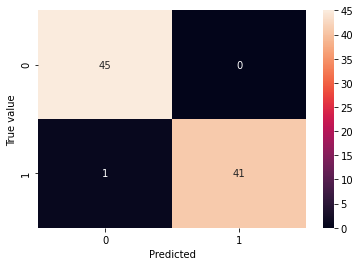

In [59]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")

# Classification Report

In [60]:
print(classification_report(Y_res_test,predict1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        42

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



# ROC-Curve

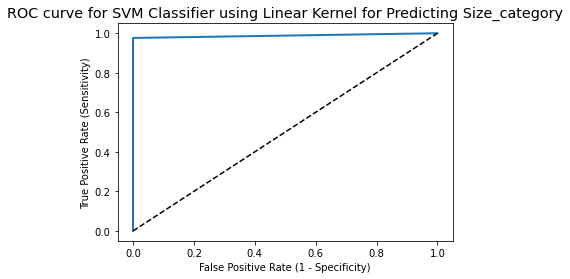

In [61]:
fpr, tpr, thresholds = roc_curve(Y_res_test, predict1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# ROC-AUC Score

In [62]:
ROC_AUC = roc_auc_score(Y_res_test, predict1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9881


# SVM using Polynomial Kernel

In [63]:
clf2 = SVC(kernel="poly")

In [64]:
clf2.fit(X_res_train,Y_res_train)

SVC(kernel='poly')

In [65]:
predict2 = clf2.predict(X_res_test)
pd.Series(predict2).value_counts()

0    54
1    33
dtype: int64

# Accuracy Score

In [66]:
accuracy_score(Y_res_test,predict2)

0.7816091954022989

# Confusion Matrix

In [67]:
cm2 = confusion_matrix(Y_res_test,predict2)
cm2

array([[40,  5],
       [14, 28]], dtype=int64)

Text(30.0, 0.5, 'True value')

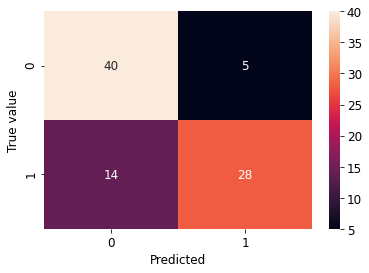

In [68]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")

# Classification Report

In [69]:
print(classification_report(Y_res_test,predict2))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        45
           1       0.85      0.67      0.75        42

    accuracy                           0.78        87
   macro avg       0.79      0.78      0.78        87
weighted avg       0.79      0.78      0.78        87



# ROC-Curve

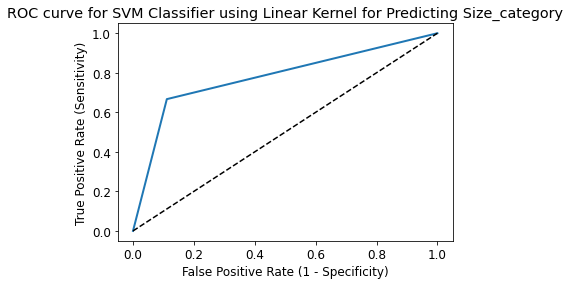

In [70]:
fpr, tpr, thresholds = roc_curve(Y_res_test, predict2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# ROC-AUC Score

In [71]:
ROC_AUC = roc_auc_score(Y_res_test, predict2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7778


# SVM using RBF Kernel

In [72]:
clf3 = SVC(kernel="rbf")

In [73]:
clf3.fit(X_res_train,Y_res_train)

SVC()

In [74]:
predict3 = clf3.predict(X_res_test)
pd.Series(predict3).value_counts()

1    57
0    30
dtype: int64

# Accuracy Score

In [75]:
accuracy_score(Y_res_test,predict3)

0.5057471264367817

# Confusion Matrix

In [76]:
cm3 = confusion_matrix(Y_res_test,predict3)
cm3

array([[16, 29],
       [14, 28]], dtype=int64)

Text(30.0, 0.5, 'True value')

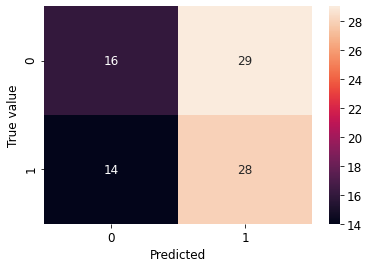

In [77]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")

# Classification Report

In [78]:
print(classification_report(Y_res_test,predict3))

              precision    recall  f1-score   support

           0       0.53      0.36      0.43        45
           1       0.49      0.67      0.57        42

    accuracy                           0.51        87
   macro avg       0.51      0.51      0.50        87
weighted avg       0.51      0.51      0.49        87



# ROC-Curve

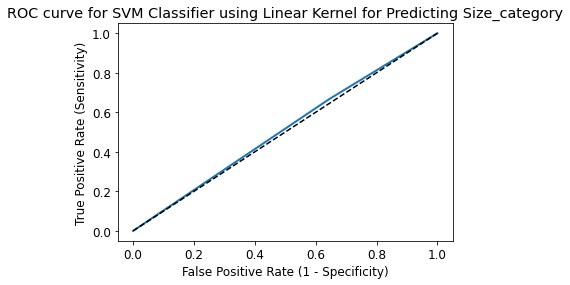

In [79]:
fpr, tpr, thresholds = roc_curve(Y_res_test, predict3)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# ROC-AUC-Score 

In [80]:
ROC_AUC = roc_auc_score(Y_res_test, predict2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7778
